![Gambar NYC TLC](https://www.nyc.gov/assets/tlc/images/content/hero/tlc_advisory_11_9_23.jpg)

## **LATAR BELAKANG**

NYC TLC (New York City Taxi and Limousine Commision) adalah badan yang bertanggung jawab atas perizinan, regulasi dan pengawasan industri taksi di kota New York. untuk dapat bersaing dengan kompetitor dan meningkatkan pelayanan dari taxi, NYC TLC ingin mengetahui pola perilaku penumpang sehingga dapat meningkatkan mutu pelayanan serta mengefisienkan armada. Keberhasilan perusahaan dalam mengembangkan serta mempertahankan bisnis di dasari oleh pemahaman yang baik terkait perilaku konsumen(penumpang taxi) sehingga perusahaan dapat merencanakan dan merancang apa yang di butuhkan konsumen.

**Pernyataan Masalah**

oleh karena itu kita ingin mengetahui **Bagaimana Pola Perilaku Konsumen dalam menggunakan layanan NYC TAXI sehingga NYC Taxi dapat merancang strategi untuk meningkatkan pelayanan** 

**Analisis yang akan di lakukan adalah :** 
- Bagaimana Pola Perjalanan Konsumen Taxi Berdasarkan Waktu?
- Bagaimana Pola Perjalanan Konsumen Taxi Berdasarkan Lokasi penjemputan dan Lokasi Tujuan?
- Bagaimana Preferensi Dan Behavior Penumpang?
- Apakah Benar Konsumen yang melakukan Perjalanan dengan jarak dan durasi yang lama memberikan tips yang lebih besar?

**Tujuan Dari Analisis ini adalah :** 
1. Memahami Pola Perjalanan Berdsarkan Waktu. Dengan Mencakup pemahaman terhadap pola perjalanan konsumen berdasarkan waktu akan membantu NYC Taxi untuk mengalokasikan sumber daya dengan lebih efektif, seperti menempatkan lebih banyak taxi pada jam padat penumpang.
2. Memahami Pola Perjalanan Berdasarkan Lokasi. Dengan Melibatkan pemetaan pola perjalanan konsumen berdasarkan lokasi akan membantu NYC Taxi untuk menyesuaikan strategi operasional, seperti menempatkan lebih banyak armada taxi di area-area yang ramai.  
3. Memahami Preferensi Dan Behavior Penumpang. Dengan analisis ini NYC Taxi dapat mengidentifikasi kelompok konsumen berdasarkan karakteristik perjalanan seperti jarak dan durasi perjalanan. Dengan mengetahui kelompok konsumen NYC Taxi bisa menawarkan promosi menarik kepada konsumen.   

 

### **INFORMASI DATASET NYC TLC**

**Informasi Terkait NYC Taxi & Limousine Commission** [***NYC TLC***](https://www.nyc.gov/site/tlc/about/about-tlc.page)

**Informasi Lebih Detail Terkait Penjelasan Kolom Dataset NYC Taxi & Limousine Commission** [***NYC TLC COL***](https://drive.google.com/file/d/1o7qzxoTfpL3IIJmv9OvXg_LkXwEmwEyp/view?usp=sharing)

**informasi ringkasan kolom dataset NYC Taxi**
| Column  | Desc  |
|:--|:--|
|VendorID               |  Vendor Penyedia LPEP|
|  lpep_pickup_datetime |   Waktu *pickup* penumpang ketika agrometer di jalankan    |
|  lpep_dropoff_datetime|   Waktu *dropoff* penumpang ketika agrometer di matikan     |
|  store_and_fwd_flag   |    Metode penyimpanan catatan perjalanan   |
|  RatecodeID           |    Kode Tarif Akhir Perjalanan   |
|  PULocation           |    kode zona *pickup* penumpang   |
|  DOLocationID         |    kode zona *dropoff* penumpang  |
|  passenger_count      |    Jumlah Penumpang   |
|  trip_distance        |    Jarak Perjalanan   |
|  fare_amount          |      Tarif waktu dan jarak dihitung oleh meter. |
|  mta_tax              |    Biaya Tambahan/pajak saat menggunakan layanan sebesar 0.5$    |
|  tip_amount           |    total tip yang di bayar melalui kartu kredit   |
|  tolls_amount         |    Biaya jika perjalanan menggunakan tol    |
|  improvement_surcharge|    Biaya Tambahan Jika tipe perjalanan secara 'hail' langsung   |
|  total_amount         |    Total Biaya. Tidak Termasuk Tip secara tunai  |
|  payment_type         |    Cara Pembayaran   |
|  trip_type            |    Tipe Perjalanan    |
|  congestion_surcharge |    Biaya Tambahan Jika Terjadi kemacetan  |




### **Import Library**

In [114]:
#=== Numpy ===
import numpy as np

#=== Pandas ===
import pandas as pd 
pd.set_option('display.max_columns',None)

#=== Visualisation ===
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

#=== Datetime ===
import datetime as dt 

#=== Missingno ===
import missingno as msno


### **Import Dataset NYC TLC**



In [115]:
#menampilkan 5 data pertama dan 5 data terakhir 
df = pd.read_csv(r'NYC TLC Trip Record.csv',low_memory=False)
display(
    df.head(),
    df.tail()
)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## **Data Understanding**
Pada Tahapan Data understanding akan di lakukan pengecekan terhadap :
1. Data Type 
2. Duplicated Data 
3. Missing Values

In [116]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Columns: 20 entries, VendorID to congestion_surcharge
dtypes: float64(14), int64(3), object(3)
memory usage: 10.4+ MB


Berdasrkan data di atas dapat di ketahui bahwa terdapat 20 kolom dan 68211 baris yang terdiri dari :
- kolom float berjumlah 14
- kolom int dan object yang sama-sama berjumlah 3
- perlu di ketahui bahwa ada beberapa kolom yang tidak sesusai data type nya dan akan di lakukan handling data type pada tahapan data cleaning

Kita akan melihat pesebaran data numerical dan categorical dari NYC TLC TAXI

In [117]:
display(
    df.describe(),
    df.describe(include='object')
)

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


Berdasarkan Informasi pesebaran Data di Atas  **insight belum**

1. `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, `congestion_scurcharge` terdapat nilai negative. seharusnya kolom-kolom tersebut tidak boleh ada nilai negative. pada tahapan data cleaning informasi tersebut akan di hapus. 
2. `trip_distance` dan `passenger_count` nilai minimun nya adalah 0, maka akan di cek lebih detail terkait hal tersebut




selanjutnya akan di check lebih dalam terkait data type, data duplikat dan missing values

In [118]:
def dataframe_check(df):
  '''
  fungsi ini akan mencari 
  kolom null, data duplicated, persentasi missing,
  unik value, data type dan mengembalikannya ke dalam bentuk
  dataframe
  '''
  missing = df.isnull().sum()
  duplicate = df.duplicated().sum()
  missing_per = round(missing/len(df),4)*100
  unique_val = df.nunique()
  type_data = df.dtypes
  sample_unique = [df[col].unique() for col in df.columns]
  df = pd.DataFrame({'Missing_values':missing,
                    'Percent of Missing (%)':missing_per,
                    'Duplicated Data':duplicate,
                    'Numbers of Unique':unique_val,
                    'Data type':type_data,
                    'Sample Unique':sample_unique}).sort_values("Percent of Missing (%)",ascending=False)
  return df

In [119]:
dataframe_check(df)

,Missing_values,Percent of Missing (%),Duplicated Data,Numbers of Unique,Data type,Sample Unique
ehail_fee,68211,100.00,0,0,float64,[nan]
trip_type,4334,6.35,0,2,float64,"[1.0, 2.0, nan]"
congestion_surcharge,4324,6.34,0,4,float64,"[2.75, 0.0, 2.5, -2.75, nan]"
store_and_fwd_flag,4324,6.34,0,2,object,"[N, Y, nan]"
RatecodeID,4324,6.34,0,6,float64,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
payment_type,4324,6.34,0,5,float64,"[1.0, 2.0, 3.0, 4.0, 5.0, nan]"
passenger_count,4324,6.34,0,10,float64,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
tip_amount,0,0.00,0,1492,float64,"[4.03, 2.64, 1.94, 1.7, 0.0, 4.85, 1.0, 3.0, 3..."
total_amount,0,0.00,0,4670,float64,"[24.18, 15.84, 11.64, 10.2, 8.0, 22.95, 29.2, ..."
improvement_surcharge,0,0.00,0,5,float64,"[1.0, 0.0, 0.3, -1.0, -0.3]"


Informasi : 
1. Terdapat 6 kolom yang memiliki jumlah missing value yang sama 
dan 1 kolom yang persentase null nya 100 % 
2. kolom lpep_pickup_datetime dan lpep_dropoff_datetime masih dalam bentuk objek

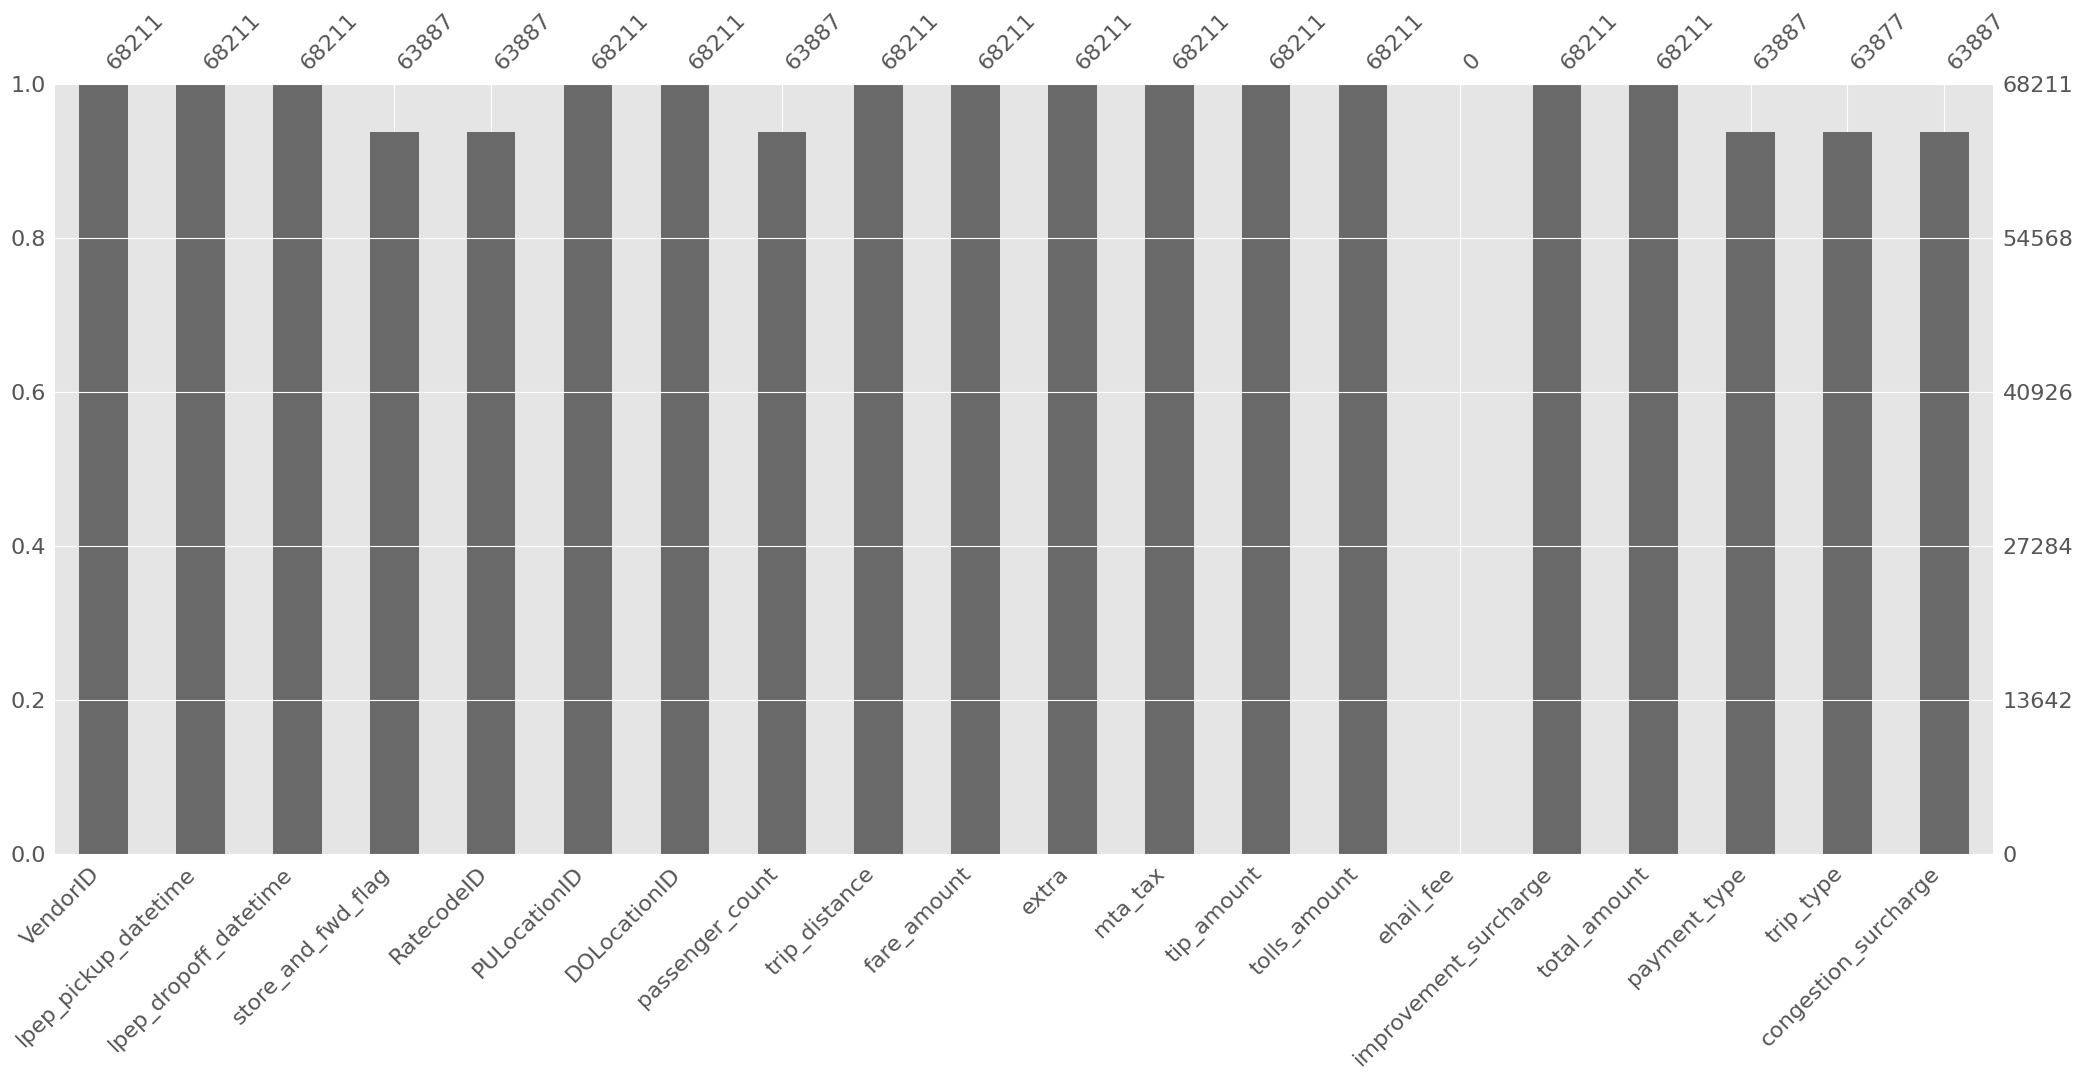

In [120]:
#menggunakan library missing no untuk memudahkan visualisasi melihat kolom yang memiliki null value
msno.bar(df)
plt.show()

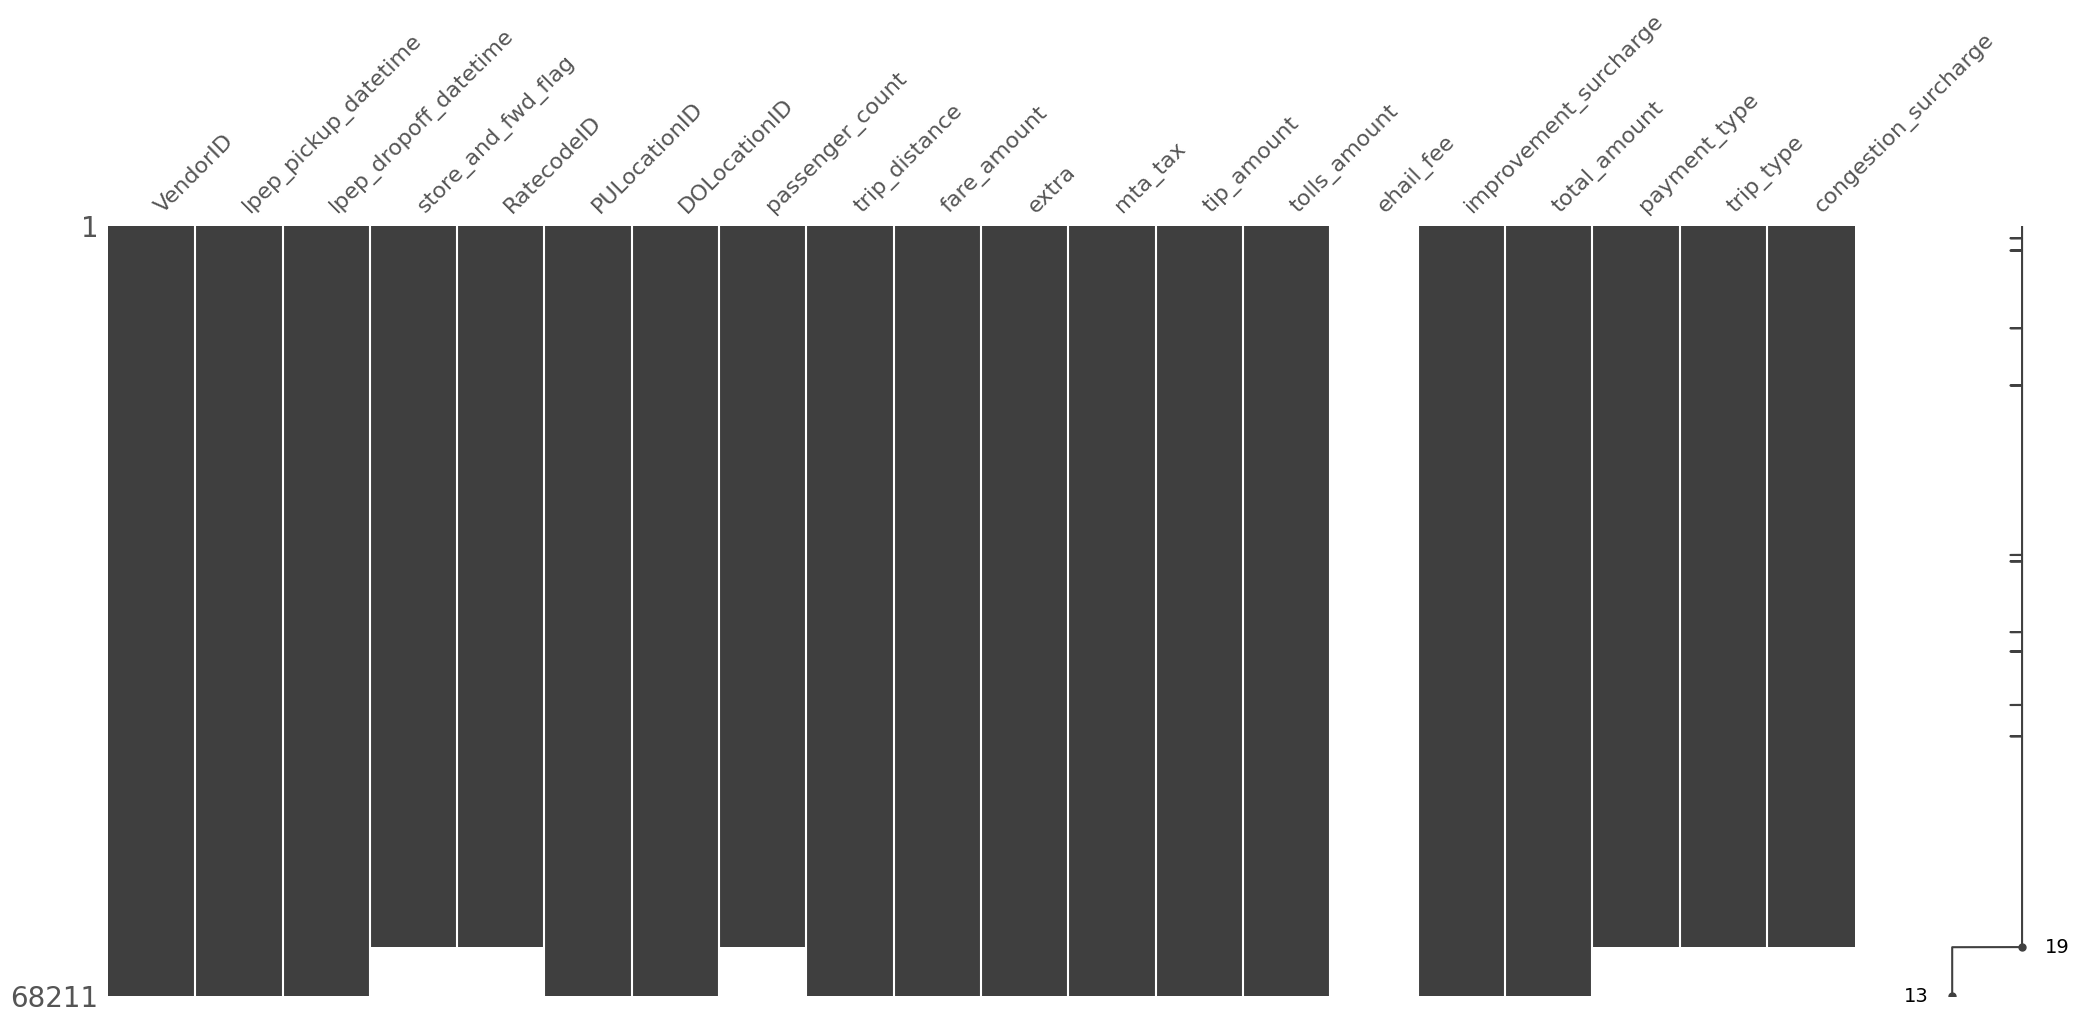

In [121]:
msno.matrix(df)
plt.show()

kolom yang terdapat missing value selain ehailfee berada dalam kondisi/baris yang sama. selanjutnya kita akan memastikan apakah missing value antar kolom memiliki korelasi.  

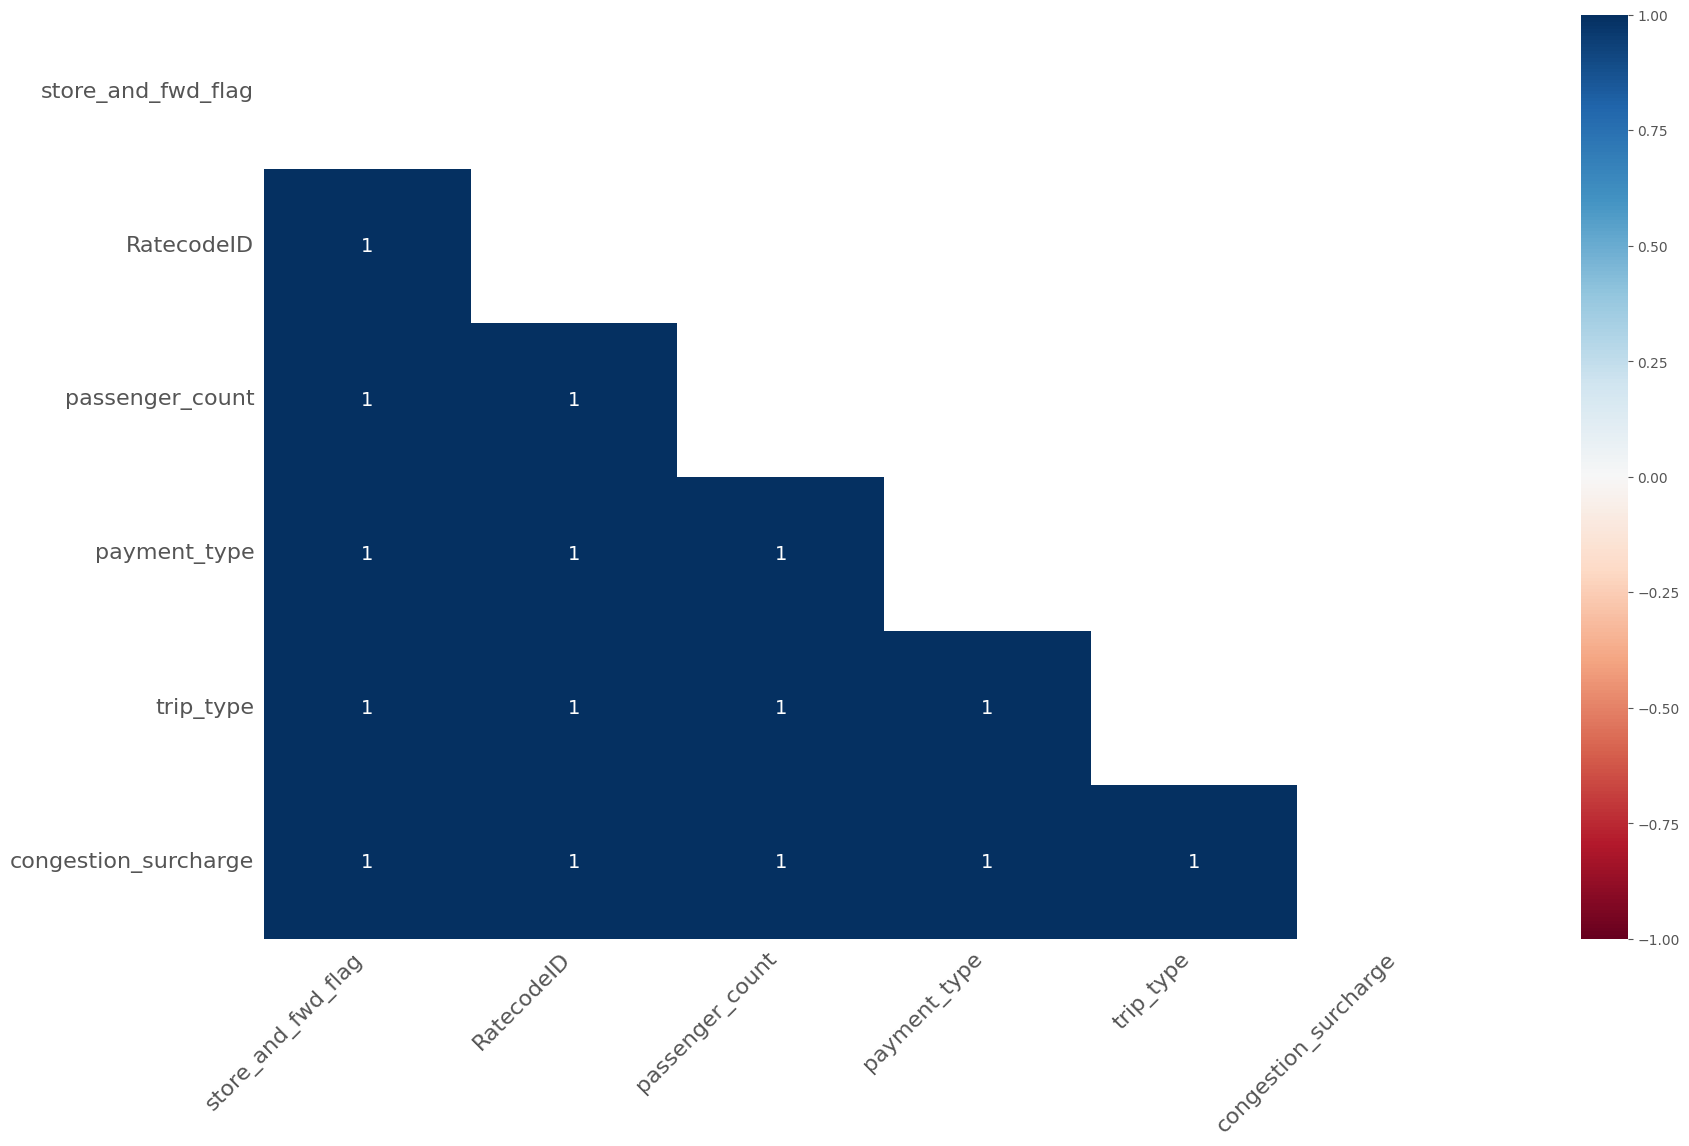

In [122]:
msno.heatmap(df)
plt.show()

semua kolom yang memiliki missing value dengan jumlah yang sama saling memiliki korelasi yang kuat. 

## **Data Cleaning**
Pada Tahapan ini akan dlikaukan data cleaning secara berurutan :
1. Handling Data Type yang tidak sesuai 
2. Handling Missing Values 

Karena Pada informasi sebelumnya tidak ada data duplikat maka tidak perlu melakuan handling duplicate data



**A. Handling kolom yang memiliki persentase Null 100%**

In [123]:
#menghapus Kolom ehail_fee karena missing value nya 100 %
df.drop(columns='ehail_fee',inplace=True)

sisa kolom yang terdapat missing value adalah : 
`trip_type`, `congestion_surcharge`, `store_and_fwd_flag`, `RatecodeID`, `payment_type` dan `passenger_count`





**B. Handling `lpep_pickup_datetime` dan `lpep_dropoff_datetime`**

merubah tipe data pada kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` yang berupa object menjadi datetime untuk melihat rentang waktu dari data yang terdapat missing values

In [124]:
#convert kolom pickup_datetime dan dropoff_datetime menjadi datetime
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

In [125]:
#cek rentang tanggal data yang memiliki missing value 
missing_row = df[df.isna().any(axis=1)]

for col in ['lpep_pickup_datetime', 'lpep_dropoff_datetime']:
    print('informasi dari kolom', col)
    print('Missing Value di mulai dari :', missing_row[col].min())
    print('Missing Value berakhir dari :', missing_row[col].max())


informasi dari kolom lpep_pickup_datetime
Missing Value di mulai dari : 2023-01-01 00:27:00
Missing Value berakhir dari : 2023-01-31 23:51:00
informasi dari kolom lpep_dropoff_datetime
Missing Value di mulai dari : 2023-01-01 00:37:00
Missing Value berakhir dari : 2023-02-01 00:07:00


In [126]:
df[['lpep_pickup_datetime','lpep_dropoff_datetime']].describe()

,lpep_pickup_datetime,lpep_dropoff_datetime
count,68211,68211
mean,2023-01-16 20:10:55.679524096,2023-01-16 20:29:01.515767040
min,2009-01-01 20:21:27,2009-01-02 11:07:31
25%,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000
50%,2023-01-17 08:40:42,2023-01-17 08:56:38
75%,2023-01-24 15:52:30,2023-01-24 16:06:56
max,2023-02-01 03:10:05,2023-02-01 17:27:05


berdasarkan informasi di atas di ketahui bahwa rentang tanggal yang terdapat missing value terjadi pada tanggal 1 januari 2023 - 1 februari 2023. Tapi nilai minimum untuk datetime ada pada tahun 2009

Kita akan melakukan pengecekan lebih lanjut terkait kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` dengan cara melihat jumlah nilai unik dari tahun dan bulan. 

In [127]:
#membuat kolom baru untuk mendapatkan tahun dan bulan
df['year_month_PU'] = df['lpep_pickup_datetime'].dt.strftime('%Y-%m')
df['year_month_DO'] = df['lpep_dropoff_datetime'].dt.strftime('%Y-%m')


#menampilkan nilai unik 
display(
    df['year_month_PU'].value_counts().to_frame(),
    df['year_month_DO'].value_counts().to_frame(),
    df['year_month_PU'].value_counts(normalize=True).to_frame(),
    df['year_month_DO'].value_counts(normalize=True).to_frame()
)

,count
year_month_PU,
2023-01,68207
2022-12,2
2009-01,1
2023-02,1


,count
year_month_DO,
2023-01,68192
2023-02,16
2022-12,2
2009-01,1


,proportion
year_month_PU,
2023-01,0.999941
2022-12,0.000029
2009-01,0.000015
2023-02,0.000015


,proportion
year_month_DO,
2023-01,0.999721
2023-02,0.000235
2022-12,0.000029
2009-01,0.000015


Data terbanyak berada pada bulan `Januari` tahun `2023` dengan proporsi `99%`. berdasarkan informasi di atas, maka data **`selain bulan Januari 2023`** akan di anggap outlier dan akan di hapus. sehingga analisis akan lebih fokus dan detail dalam rentang waktu 1 bulan yaitu bulan januari 2023

In [128]:
#menghapus data selain bulan januari 2023


df = df[(df['year_month_PU'] == '2023-01') & (df['year_month_DO']=='2023-01')]
df[['lpep_pickup_datetime','lpep_dropoff_datetime']].describe()


,lpep_pickup_datetime,lpep_dropoff_datetime
count,68192,68192
mean,2023-01-16 21:55:47.649519104,2023-01-16 22:13:43.929610496
min,2023-01-01 00:01:31,2023-01-01 00:13:26
25%,2023-01-09 11:58:50.249999872,2023-01-09 12:14:46.249999872
50%,2023-01-17 08:39:35,2023-01-17 08:53:56.500000
75%,2023-01-24 15:48:03.750000128,2023-01-24 16:04:39.249999872
max,2023-01-31 23:45:10,2023-01-31 23:55:05


In [129]:
#mengecek lebih detail menggunakan kolom year_month_DO dan year_month_PU
display(
    df['year_month_DO'].value_counts().to_frame(),
    df['year_month_PU'].value_counts().to_frame()
)

,count
year_month_DO,
2023-01,68192


,count
year_month_PU,
2023-01,68192


berdasarkan keterangan di atas Data selain 2023-01 sudah berhasil di hapus, sehingga analisis hanya akan di lakukan pada bulan Januari Tahun 2023.



**C. handling missing value pada kolom `trip_type` yang memiliki informasi :**
- kode 1 = 'street hail' yaitu menggunakan layanan taksi langsung di jalan
- kode 2 = 'dispatch' yaitu menggunakan layanan taksi dengan pemesanan melalui operator 

hadling missing values kolom **trip_type** akan menggunakan informasi dari kolom **improvement_surcharge**. kolom **improvement_surcharge** berisi informasi tambahan biaya yang di kenakan jika menggunakan layanan taksi **street hail** atau langsung menggunakan layanan taksi di jalan dimulai dari tahun 2015. Karena rentang waktu pada missing value di mulai dari tahun 2023 maka kolom **trip_type** dapat di isi berdasarkan **imporvement_surcharge**

 Jika terdapat biaya tambahan pada kolom improvement_surcharge maka missing values pada kolom trip type akan di isi dengan nilai 1, sebaliknya jika tidak ada biaya tambahan maka akan di isi nilai 2

In [130]:
#handling missing value kolom trip_type dengan informasi kolom improvement surcharge
df['trip_type'] = df.apply(
    lambda x: 1 if x['improvement_surcharge'] > 0 else 2 if pd.isnull(x['trip_type']) else x['trip_type'], 
    axis=1)

In [131]:
#cek kembali missing value pada kolom trip_type
display(
    missing_row.loc[[1084],'trip_type'],
    df.loc[[1084], 'trip_type']
)

1084   NaN
Name: trip_type, dtype: float64

1084    1.0
Name: trip_type, dtype: float64

**D. Handling Missing Value Pada Kolom** `RatecodeID` 
berdasarkan kolom `PULocationID`, `DOLocationID` 
 

**RatecodeID** merupakan kolom yang berisi Kode Tarif Pembayaran Berikut maksud kodenya : 

|  Code   |     Description     |
|:-------:|:------------|
| 1     |     Standard Rate  |
| 2     | JFK (perjalanan menuju/berasal dari bandara John F. Khennedy) |
| 3     |  Newark(perjalanan menuju/berasal dari Bandara International Newark) |
| 4     |  Nassau/Wetchester(perjalanan menuju Nassau county/Wetchester county) |
| 5     | Negotiated fare(tarif yang sudah di negosiasikan antara pengemudi dan penumpang) |
| 6     | Group Ride(tarif khusus jika penumpang melakukan perjalanan bersama dengan destinasi berdekatan atau sama) |


Kolom `PULocationID` dan `DOLocationID` akan di gunakan untuk mencari lokasi pickup atau dropoff sehingga bisa mengisi missing value untuk kode 2,3,4  


Dalam proses handling missing values di kolom RatecodeID akan di bantu dengan dataset tambahan yang berisi arti code zone untuk `PULocationID` dan `DOLocationID`. Dataset ini berasal dari Website resmi NYC TLC [**Taxi Zone Maps and Lookup Tables**](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) 


In [132]:
#menampilkan dataset terkait arti code zone
zone = pd.read_csv('taxi_zone_lookup.csv')
zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


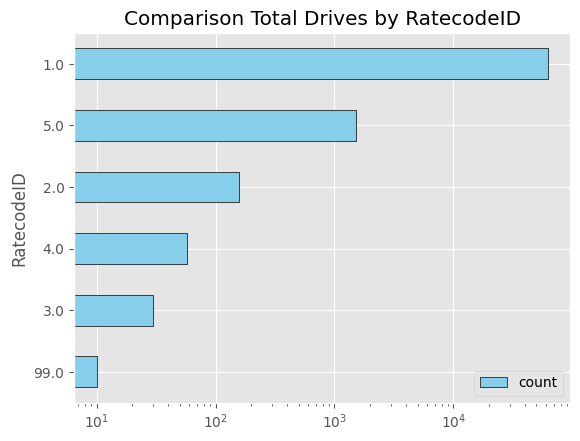

In [133]:
#mengecek jumlah dan nilai unik pada kolom RatecodeID
value_ratecode = df['RatecodeID'].value_counts().to_frame()

value_ratecode.sort_values(by='count',ascending=True).plot(
    kind='barh',logx=True,color='skyblue',edgecolor='black')



plt.title('Comparison Total Drives by RatecodeID')
plt.show()


In [134]:
#terdapat keanehan pada nilai 99 
df['RatecodeID'].value_counts()

RatecodeID
1.0     62087
5.0      1528
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

Dalam penjelasan terkait kolom `RatecodeID` terdapat 6 tipe yakni ID  1-6. sementara nilai unik dalam `RatecodeID` tidak ada ID 6 melainkan ID 99. Maka kita akan menghapus RatecodeID 99

In [135]:
df[df['RatecodeID'] == 99]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year_month_PU,year_month_DO
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,1.0,0.0,2023-01,2023-01
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,1.0,0.0,2023-01,2023-01
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,1.0,0.0,2023-01,2023-01
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,1.0,0.0,2023-01,2023-01
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,1.0,0.0,2023-01,2023-01
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0,2023-01,2023-01
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0,2023-01,2023-01
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,1.0,0.0,2023-01,2023-01
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0,2023-01,2023-01
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,1.0,0.0,2023-01,2023-01


In [136]:
#menghapus baris yang memiliki RatecodeID 99
df = df.drop(df[df['RatecodeID'] == 99].index)

#cek kembali data yang telah di drop
df['RatecodeID'].value_counts().to_frame().reset_index().rename(columns={'count':'Total'})

,RatecodeID,Total
0,1.0,62087
1,5.0,1528
2,2.0,158
3,4.0,57
4,3.0,30


Data RatecodeID 99 telah di hapus. selanjutnya akan fill missing value `RatecodeID` berdasarkan `PULocationID` dan `DOLocationID`

In [137]:
zone = zone.fillna('Unknown')  #tidak bisa melakukan conditional indexing jika ada Null value

#mencari ID lokasi dari lokasi airport JFK dan La guardia 
zone[zone['service_zone']=='Airports']

#mencari ID lokasi dari lokasi Airport Newark 
zone.iloc[[0],:]   #karena Newark Airport ada di 5 data pertama 

#mencari ID lokasi wetchester 
zone[zone['Zone'].str.contains('Westchester')]

#mencari ID lokasi nassau /Long island
zone[zone['Zone'].str.contains('Long Island')]  

display(
    zone[zone['service_zone']=='Airports'],
    zone.iloc[[0],:],
    zone[zone['Zone'].str.contains('Westchester')],
    zone[zone['Zone'].str.contains('Long Island')]  
)


,LocationID,Borough,Zone,service_zone
131,132,Queens,JFK Airport,Airports
137,138,Queens,LaGuardia Airport,Airports


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR


,LocationID,Borough,Zone,service_zone
249,250,Bronx,Westchester Village/Unionport,Boro Zone


,LocationID,Borough,Zone,service_zone
144,145,Queens,Long Island City/Hunters Point,Boro Zone
145,146,Queens,Long Island City/Queens Plaza,Boro Zone


In [138]:
def fill_missing_ratecode(df):
    
    # Mendefinisikan fungsi untuk mengisi nilai yang hilang

    def fill_func(row):
        '''jika ID 132 dan 138 terdapat pada PULocationID atau DOLocationID 
        maka akan mengembalikan nilai 2 untuk bandara JFK dan La Guardia
        jika ID 1 terdapat pada PULocationID atau DOLocationID 
        maka akan mengembalikan nilai 3 untuk bandara Newark
        jika ID 250, 145 dan 146 terdapat pada PULocationID atau DOLocationID 
        maka akan mengembalikan nilai 4 untuk Nassau/Wetchester
        '''
        if 132 in [row['PULocationID'], row['DOLocationID']] or 138 in [row['PULocationID'], row['DOLocationID']]  :
            return 2

        elif 1 in [row['PULocationID'], row['DOLocationID']]:
            return 3
        elif 250 in [row['PULocationID'], row['DOLocationID']] or 146 in [row['PULocationID'], 
            row['DOLocationID']] or 145 in [row['PULocationID'], row['DOLocationID']]:
            return 4
        else:
            return row['RatecodeID']  # Jika tidak ada kondisi yang cocok, kembalikan nilai yang ada
    
    # Menggunakan fillna dengan fungsi fill_func
    df['RatecodeID'] = df.apply(lambda row: fill_func(row) if pd.isnull(row['RatecodeID']) else row['RatecodeID'], axis=1)

    return df

#mengisi baris missing value berdasrkan PULocationID dan DOLocationID
df = fill_missing_ratecode(df)

In [139]:
#cek missing value pada kolom RatecodeID 
df['RatecodeID'].isna().sum()

3960

missing value dari **RatecodeID** berdasarkan kolom `PULocationID` dan `DOLocationID` telah berhasil di isi. Tapi masih terdapat 3962 baris dari RatecodeID yang hilang. Karena jumlah missing value masih banyak dan tidak bisa di isi berdasarkan kolom lain lagi maka akan di buat kategori baru yaitu **`unknown`** dengan RatecodeID **`0`**

In [140]:
#fill missing value use 0(unknown)
df['RatecodeID'] = df['RatecodeID'].fillna(0)

#cek kembali nilai unik dari RatecodeID
df['RatecodeID'].value_counts()

RatecodeID
1.0    62087
0.0     3960
5.0     1528
2.0      405
4.0      168
3.0       34
Name: count, dtype: int64

**E. Handling Missing Value Pada Kolom Yang memiliki Nilai Negative**

In [141]:
check_negative = ['fare_amount','extra','mta_tax','tip_amount',
                  'improvement_surcharge','total_amount','congestion_surcharge']
#mengecek jumlah data yang terdapat nilai negative
zero_dict = {}
for i in check_negative:
    zero_dict[i]= len(df[df[i]<0])
    

cek_negative = pd.DataFrame(zero_dict.items(),columns=['column','Count Negative'])
cek_negative['presentase']  = round(cek_negative['Count Negative'] / len(df) * 100,2)
cek_negative

,column,Count Negative,presentase
0,fare_amount,176,0.26
1,extra,80,0.12
2,mta_tax,165,0.24
3,tip_amount,9,0.01
4,improvement_surcharge,174,0.26
5,total_amount,179,0.26
6,congestion_surcharge,3,0.00


Karena jumlah persentase dari seluruh kolom yang terdapat nilai negative hanya di bawah 1% maka baris tersebut akan di hapus

In [142]:
#menhapus nilai negatif menggunakan conditional indexing 
df =  df[(df['fare_amount'] > 0) | (df['mta_tax'] > 0) | (df['total_amount'] > 0)]

#cek kembali nilai negative
df[check_negative].describe()



,fare_amount,extra,mta_tax,tip_amount,improvement_surcharge,total_amount,congestion_surcharge
count,67934.000000,67934.000000,67934.000000,67934.000000,67934.000000,67934.000000,63617.000000
mean,16.679768,0.830843,0.591615,2.147304,0.957525,21.891267,0.729832
std,13.419948,1.268045,0.382117,3.055413,0.168658,15.380386,1.214187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000
25%,9.300000,0.000000,0.500000,0.000000,1.000000,12.950000,0.000000
50%,13.500000,0.000000,0.500000,1.600000,1.000000,17.940000,0.000000
75%,19.800000,1.000000,0.500000,3.340000,1.000000,26.200000,2.750000
max,490.000000,12.500000,2.750000,222.220000,1.000000,491.000000,2.750000


Data yang memiliki nilai negative sudah berhasil di hapus. 

**F. Handling Missing Value Pada Kolom `Payment Type`**

missing Value pada kolom **`payment_type`** akan di isi Berdasarkan infromasi dari data dictionary terkait arti kode dari payment_type. code 5 pada kolom **`payment_type`** berarti ***unknown*** , Jadi tidak di ketahui bagaimana penumpang membayar layanan Taxi

In [143]:
#fill missing value pada kolom payment type dengan kode 5
df['payment_type'] = df['payment_type'].fillna(5)

#menampilkan jumlah nilai unik dan proporsi dari kolom payment type setelah di isi 

display(
df['payment_type'].value_counts().to_frame().rename(columns={'count':'Total'}).reset_index(),
df['payment_type'].value_counts(normalize=True).to_frame().rename(columns={'count':'Total'})*100
)

#PERBAIKI PAYMENT TYPE

,payment_type,Total
0,1.0,40626
1,2.0,22597
2,5.0,4319
3,3.0,330
4,4.0,62


,proportion
payment_type,
1.0,59.802161
2.0,33.263167
5.0,6.357641
3.0,0.485766
4.0,0.091265


setelah missing value pada kolom **`payment_type`** telah di isi dapat di ketahui bahwa **payment_type** 3(No Charge) yaitu tidak ada biaya yang di bebankan kepada penumpang dan **payment_type** 4(dispute) terjadi permasalahan ketika membayar memiliki jumlah proporsi kurang dari **1%**

**G. Handling Missing Value Pada Kolom `store_and_fwd_flag`** 

kolom **store_and_fwd_flag** adalah kolom kategorikal yang menjelaskan apakah catatan perjalanan akan di simpan terlebih dahulu dalam memori kendaraan kemudian di kirimkan ke vendor 'Y' karena kendala koneksi ke server atau catatan langsung di kirim ke vendor tanpa penundaan 'N. Oleh karena itu missing value pada kolom ini tidak akan kita isi dengan modus karena di khawatirkan akan mengganggu proses analisis data. missing value kolom ini juga tidak bisa di isi berdasarkan kolom lain, sehingga akan di isi **`unknwon`** = **`U`** 

In [144]:
#menampilkan jumlah dan proporsi data untuk store_and_fwd_flag
display(
df['store_and_fwd_flag'].value_counts().to_frame(),
df['store_and_fwd_flag'].value_counts(normalize=True).to_frame())



,count
store_and_fwd_flag,
N,63310
Y,307


,proportion
store_and_fwd_flag,
N,0.995174
Y,0.004826


walaupun proporsi Y di bawah 1% tetapi informasi tersebut dapat di gunakan untuk menganlisis pola dari tempat yang tidak memiliki jaringan koneksi ke server

In [145]:
#mengisi missing value dengan kategori U /Unknwon
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('U')

#cek kembali setelah di isi 
df['store_and_fwd_flag'].value_counts().to_frame()

,count
store_and_fwd_flag,
N,63310
U,4317
Y,307


**H. Handling Missing Value Pada kolom ``passenger_count``** 

karena **passenger_count** tidak bisa isi berdasarkan kolom lain. maka kolom **passenger_count** akan di isi dengan central tedency **`median`**.  

In [146]:
#melihat jumlah unik untuk passenger count
df['passenger_count'].value_counts().to_frame().reset_index()

,passenger_count,count
0,1.0,54087
1,2.0,5055
2,5.0,1768
3,6.0,1053
4,3.0,949
5,4.0,362
6,0.0,335
7,7.0,4
8,9.0,2
9,8.0,2


Berdasarkan Jumlah Penumpang di atas terdapat 335 jumlah penumpang 0. Hal tersebut terjadi jika taxi dalam keadaan kosong. Mari kita cek lebih detail menggunakan kolom **total_amount**. jika **total_amount** nya tidak kosong maka **passenger_count** dengan nilai 0 akan di hapus

In [147]:
#terdapat kenaehan pada jumlah penumpang 0
#pengeckan lebih lanjut terkait passenger_count = 0 

df[(df['passenger_count'] == 0) & (df['total_amount'] == 0)]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year_month_PU,year_month_DO


Berdasarkan informasi di atas menunjukan bahwa passenger_count = 0 tidak berarti bahwa taxi tersebut dalam keadaan kosong karena total_amount lebih dari 0$. kolom `passenger_count` dengan nilai 0 akan di hapus

In [148]:
df = df.drop(df[df['passenger_count'] == 0].index)

# #cek kembali setelah di hapus
df['passenger_count'].value_counts().to_frame()

,count
passenger_count,
1.0,54087
2.0,5055
5.0,1768
6.0,1053
3.0,949
4.0,362
7.0,4
9.0,2
8.0,2


In [149]:
#imputasi dengan median
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())


imputasi kolom passenger_count dengan median telah selesai

**I. Handling Missing Value Pada Kolom **`congestion_surcharge`****

missing value pada kolom ini akan di isi dengan central tendency median. 

In [150]:
#cek median dari kolom congestion surcharge
df['congestion_surcharge'].median()

0.0

In [151]:
#imputasi kolom congestion_surcharge dengan median 
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())

seluruh kolom yang memiliki kolom missing value telah berhasil di handling. kita akan melihat dan mengecek kembali missing value dari seluruh kolom 

In [152]:
dataframe_check(df)

,Missing_values,Percent of Missing (%),Duplicated Data,Numbers of Unique,Data type,Sample Unique
VendorID,0,0.0,0,2,int64,"[2, 1]"
mta_tax,0,0.0,0,5,float64,"[0.5, 1.5, 0.0, 1.0, 2.75]"
year_month_PU,0,0.0,0,1,object,[2023-01]
congestion_surcharge,0,0.0,0,3,float64,"[2.75, 0.0, 2.5]"
trip_type,0,0.0,0,2,float64,"[1.0, 2.0]"
payment_type,0,0.0,0,5,float64,"[1.0, 2.0, 3.0, 4.0, 5.0]"
total_amount,0,0.0,0,4610,float64,"[24.18, 15.84, 11.64, 10.2, 8.0, 22.95, 29.2, ..."
improvement_surcharge,0,0.0,0,3,float64,"[1.0, 0.0, 0.3]"
tolls_amount,0,0.0,0,25,float64,"[0.0, 6.55, 13.75, 9.0, 3.0, 11.75, 2.45, 7.0,..."
tip_amount,0,0.0,0,1487,float64,"[4.03, 2.64, 1.94, 1.7, 0.0, 4.85, 1.0, 3.0, 3..."


sekarang data sudah bersih dan masuk pada tahapan selanjutnya yaitu Analisis.
sebelumnya kita akan menghapus kolom `year_month_PU` dan `year_month_DO` karena seluruh data sudah dalam rentang januari 2023

In [153]:
df.drop(columns=['year_month_PU','year_month_DO'],inplace=True)

**J. Check Outlier**

sebelum menganailis lebih dalam akan di cek terlebih dahulu terkait outlier 

In [154]:
#cek oulier untuk kolom yang bukan object 
numerical = [i for i in df.columns if df[i].dtypes != 'object']

def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage", "Lower Bound", "Upper Bound"])
outlier_df.sort_values(by='Percentage',ascending=False)

,Column,Total Outliers,Percentage,Lower Bound,Upper Bound
17,congestion_surcharge,16813,24.87,0.0,0.0
10,mta_tax,14439,21.36,0.5,0.5
6,passenger_count,9195,13.60,1.0,1.0
0,VendorID,9004,13.32,2.0,2.0
3,RatecodeID,6042,8.94,1.0,1.0
4,PULocationID,6006,8.88,-8.5,211.5
7,trip_distance,5717,8.46,-2.03,6.37
15,payment_type,4380,6.48,-0.5,3.5
8,fare_amount,4281,6.33,-6.45,35.55
13,improvement_surcharge,4070,6.02,1.0,1.0


berdasarkan informasi di atas terdapat 12 kolom yang memiliki persentase outlier di atas 5%. untuk saat ini ourlier tidak akan di hapus.

**K. Handling Zero Values dan Outlier Pada kolom `trip_distance`**

berdasarkan explorasi dari penyebaran data di atas di ketahui bahwa kolom `trip_distance` terdapat nilai 0. kita akan melakukan pengecekan lebih jauh terkait nilai 0 pada kolom tersebut. Jarak terjauh antara borough di New York City adalah antara Staten Island dan The Bronx. Secara geografis, borough-borough tersebut terpisah oleh selat yang disebut sebagai "The Narrows". Jarak antara Staten Island dan The Bronx melalui darat adalah sekitar 30 mil (sekitar 48 kilometer), tetapi jika ditempuh dengan menggunakan transportasi darat dan air, seperti melalui jembatan atau feri, jaraknya bisa lebih panjang dan tergantung pada rute yang diambil.

In [155]:
df['trip_distance'].describe()

count     67599.000000
mean          8.172416
std         587.748230
min           0.000000
25%           1.120000
50%           1.850000
75%           3.220000
max      120098.840000
Name: trip_distance, dtype: float64

In [156]:
#jumlah data yang terdapat 0 pada kolom trip_distance
print(len(df[df['trip_distance']==0]))

#menghapus trip_distance yang nilai nya 0 
df = df[df['trip_distance']>0]

3183


In [157]:
#menghapus outlier upper bound dari trip distance
print(len(df[df['trip_distance'] >= 30]))


#menghapus Outlier Upper Bound berdasarkan jarak taxi terjauh yaitu sekitar 30 mil
df = df[df['trip_distance'] <= 30]

63


pada kolom trip distance zero values dan outlier upperbound telah di handling. untuk outlier kita akan menggunakan jarak 30 mil. 

## **Data Analysis**

Pada tahap ini akan di lakukan analisis pola perilaku penumpang dalam menggunakan layanan taxi dengan cara ekplorasi kebiasaan yang dilakukan penumpang berdasarkan :
- `pola waktu perjalanan`
- `pola tempat pickup dan tujuan populer` 
- `passenger behavior`
- `pola pemberian tips`



#### **A. Pola Perilaku Konsumen Berdasarkan Waktu**

Dalam tahapan ini akan di lakukan eskplorasi untuk mengetahui bagaimana pola perjalanan penumpang berdasarkan informasi waktu. tujuan dari eksplorasi ini untuk membantu *`stakeholders`* mendapatkan informasi pola waktu perjalanan agar bisa merancang strategi untuk efisiensi armada taxi sehingga bisa mengurangi biaya operasional berdasarkan waktu. 

dalam analisis pola akan di buat kolom baru berdasarkan tanggal dan hari 

In [158]:
#membuat kolom baru untuk tanggal dari bukan januari 2023
df['day_pickup'] = df['lpep_pickup_datetime'].dt.day


#membuat kolom baru untuk waktu durasi perjalanan 

df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']  #mendapatkan total durasi perjalanan
df['trip_duration'] = df['duration'].dt.total_seconds()  # merubah dalam format detik
df['trip_duration'] = (df['trip_duration'] % 3600) // 60  #merubah dalam format menit
df = df.drop(columns=['duration'])  #menghapus kembali kolom duration karena sudah tidak di butuhkan



#membuat kolom baru untuk nama hari 

df['dayname_pickup'] = df['lpep_pickup_datetime'].dt.strftime('%a')
df['dayname_dropoff'] = df['lpep_dropoff_datetime'].dt.strftime('%a')


#membuat kolom baru untuk jam penjemputan 

df['hour_pickup'] = df['lpep_pickup_datetime'].dt.hour
df['hour_dropoff'] = df['lpep_dropoff_datetime'].dt.hour
 

#menampilkan kolom baru
df.sample(5, random_state=12)




,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_pickup,trip_duration,dayname_pickup,dayname_dropoff,hour_pickup,hour_dropoff
21361,2,2023-01-11 19:21:47,2023-01-11 19:25:49,N,1.0,74,42,1.0,0.85,6.5,2.5,0.5,0.00,0.0,1.0,10.50,2.0,1.0,0.0,11,4.0,Wed,Wed,19,19
58357,1,2023-01-29 09:02:04,2023-01-29 09:11:39,N,1.0,75,168,1.0,2.50,12.8,0.0,1.5,0.00,0.0,1.0,14.30,2.0,1.0,0.0,29,9.0,Sun,Sun,9,9
36507,2,2023-01-19 10:30:37,2023-01-19 10:39:26,N,1.0,75,166,1.0,1.87,12.1,0.0,0.5,2.72,0.0,1.0,16.32,1.0,1.0,0.0,19,8.0,Thu,Thu,10,10
4884,2,2023-01-04 07:29:38,2023-01-04 07:41:32,N,1.0,75,166,1.0,1.83,12.8,0.0,0.5,2.86,0.0,1.0,17.16,1.0,1.0,0.0,4,11.0,Wed,Wed,7,7
46697,2,2023-01-24 07:03:25,2023-01-24 07:12:32,N,1.0,74,75,1.0,1.72,11.4,0.0,0.5,2.58,0.0,1.0,15.48,1.0,1.0,0.0,24,9.0,Tue,Tue,7,7


6 kolom baru tersebut akan di gunakan untuk analisis:
1. pola waktu penjemputan
2. waktu terpadat 
3. waktu tersepi 
4. tanggal teramai pada bulan januari 
5. tanggal tersepi pada bulan januari 
6. rata2 lama perjalanan berdasarkan jarak  
7. time series mingguan(perbandingan mingguan)
8. hari2 teramai pada bulan januari 
9. hari2 tersepi pada bulan januari
10. analisis jam macet dari congestion_surcharge


##### **Total Trip Taxi Terbanyak Pada Bulan Januari 2023 Berdasarkan Tanggal**


In [159]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_pickup,trip_duration,dayname_pickup,dayname_dropoff,hour_pickup,hour_dropoff
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,1,11.0,Sun,Sun,0,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,1,6.0,Sun,Sun,0,0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,1,5.0,Sun,Sun,0,0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,1,5.0,Sun,Sun,0,0
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,1,17.0,Sun,Sun,0,1


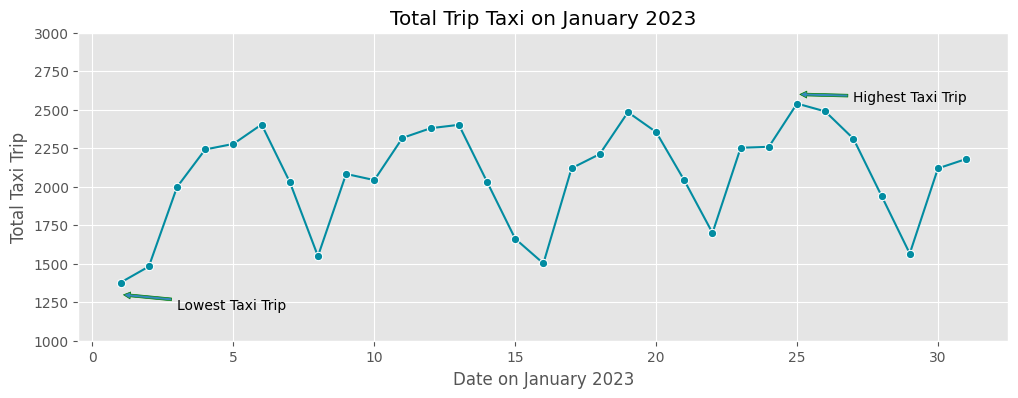

In [160]:
#total jumlah trip pada setiap tanggal pada bulan januari 2023


plt.style.use('ggplot')

total_pass = df['day_pickup'].value_counts().to_frame().sort_values(by='day_pickup',ascending=True).reset_index()
total_pass = total_pass.rename(columns={'count': 'total trip'})  #membuat kolom baru untuk total trip dalam tanggal 

#visualisasi 
plt.figure(figsize=(12,4))


sns.lineplot(data=total_pass, x='day_pickup', y='total trip',marker='o',color='#028ca1') #membuat lineplot

plt.xlabel('Date on January 2023')
plt.ylabel('Total Taxi Trip')
plt.title('Total Trip Taxi on January 2023')


plt.ylim(1000,3000)

plt.annotate(xy=(25,2600),xytext=(25+2,2550+5),text='Highest Taxi Trip',
             arrowprops=dict(ec='green',arrowstyle='simple') )

plt.annotate(xy=(1,1300),xytext=(1+2,1200+5),text='Lowest Taxi Trip',
             arrowprops=dict(ec='green',arrowstyle='simple') )


plt.show()



berdasarkan grafik di atas dapat kita ketahui bahwa jumlah Perjalanan Taxi cukup fluktuatif pada bulan januari 2023 dimana jumlah trip terbanyak ada pada tanggal `25 Januari 2023` sementara jumlah trip paling sedikit ada pada tanggal `1 Januari 2023`. Kita akan mengecek lebih lanjut mengapa 1 Januari menjadi lowest total trip pada bulan Januari 2023. 


In [161]:
#cek terkait tanggal 1 adalah hari apa 
df[df['day_pickup'] == 1][['dayname_pickup']].value_counts().to_frame()

,count
dayname_pickup,
Sun,1378


kita mengetahui bahwa tanggal 1 Januari 2023 adalah hari minggu setelah malam tahun baru. Hanhya Sedikit orang saja yang menggunakan Layanan Taxi setelah malam tahun baru. Begitupun tanggal 2 Januari yang merupakan hari libur, Berikut di cantumkan informasi hari libur. [List Holiday NYC](https://drive.google.com/file/d/1p1ShDWtj2H5F_0Q3wsYxx8kXBVio0sYG/view?usp=sharing)

pada sub bahasan selanjutnya kita akan ekxplorasi lebih detail terkait perbandingan Total Trip saat weekday dan weekend

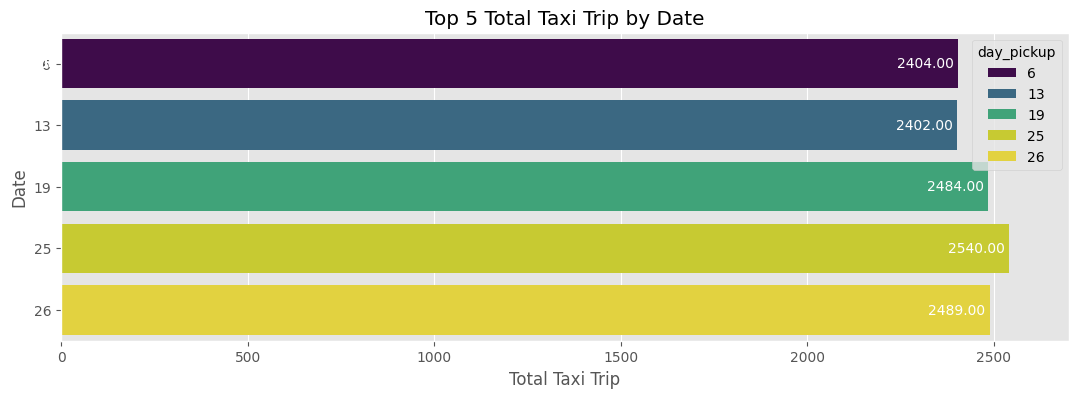

In [253]:
def annotate_bars(ax):
    '''fungsi untuk memberikan anotasi pada bar'''
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height()/2, f'{bar.get_width():.2f} ',
            va='center', ha='right', color='white'
        )
    return ax

#5 tanggal dengan penumpang teramai
total_pass_5 = total_pass.sort_values(by='total trip',ascending=False)[:5]

plt.figure(figsize=(13,4))

ax = sns.barplot(data=total_pass_5, y='day_pickup', x='total trip',hue='day_pickup',orient='h',palette='viridis')


plt.xlabel('Total Taxi Trip')
plt.ylabel('Date')
plt.title('Top 5 Total Taxi Trip by Date')
plt.xlim(0,2700)

annotate_bars(ax)
plt.show()

Grafik tersebut menunjukan Tanggal dengan Total Trip Terbanyak pada bulan Januari 2023 yang terjadi pada pertengahan dan akhir bulan. 

#### **Total Trip Harian Berdasarkan Hari dan Jam Penjemputan**

In [163]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_pickup,trip_duration,dayname_pickup,dayname_dropoff,hour_pickup,hour_dropoff
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,1,11.0,Sun,Sun,0,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,1,6.0,Sun,Sun,0,0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,1,5.0,Sun,Sun,0,0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,1,5.0,Sun,Sun,0,0
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,1,17.0,Sun,Sun,0,1


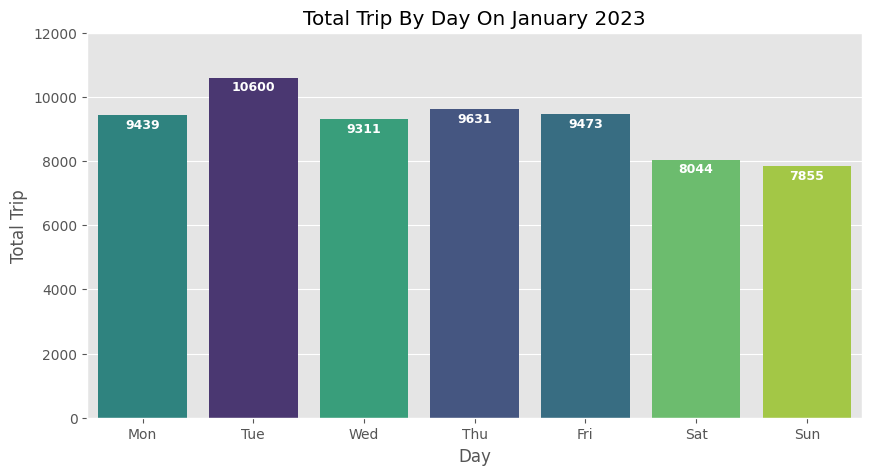

In [164]:
total_pass_by_day = df['dayname_pickup'].value_counts().to_frame().reset_index().rename(columns={'count':'Total Trip'})


#menampilkan grafik Jumlah Penumpang dari berdasarkan hari 

fig, ax = plt.subplots(figsize = (10,5))

ax = sns.barplot(
    data=total_pass_by_day,
    x='dayname_pickup',
    y='Total Trip',
    hue='dayname_pickup',
    order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
    palette='viridis'
)

ax.set(
    title = 'Total Trip By Day On January 2023',
    xlabel = 'Day',
    ylabel = 'Total Trip',
    ylim = (0,12000)
)

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}',  
                (bar.get_x() + bar.get_width() / 2., bar.get_height()),  
                ha='center', va='center',  # Posisi teks anotasi (horizontal dan vertikal)
                xytext=(0,-7),  # Jarak teks anotasi dari bar (horizontal, vertikal)
                textcoords='offset points',  # Koordinat teks anotasi
                fontsize=9,  # Ukuran font teks anotasi
                color='white',  # Warna teks anotasi
                fontweight='semibold'  # Ketebalan huruf teks anotasi
                )

plt.show()

Berdasarkan grafik di atas dapat di ketahui bahwa jumlah trip terbanyak terjadi pada `weekday`. berarti layanan Taxi lebih sering di gunakan pada `hari kerja` di bandingkan `hari libur`. selanjutnya kita akan mengekplorasi lebih lanjut terkait jam penjemputan. 

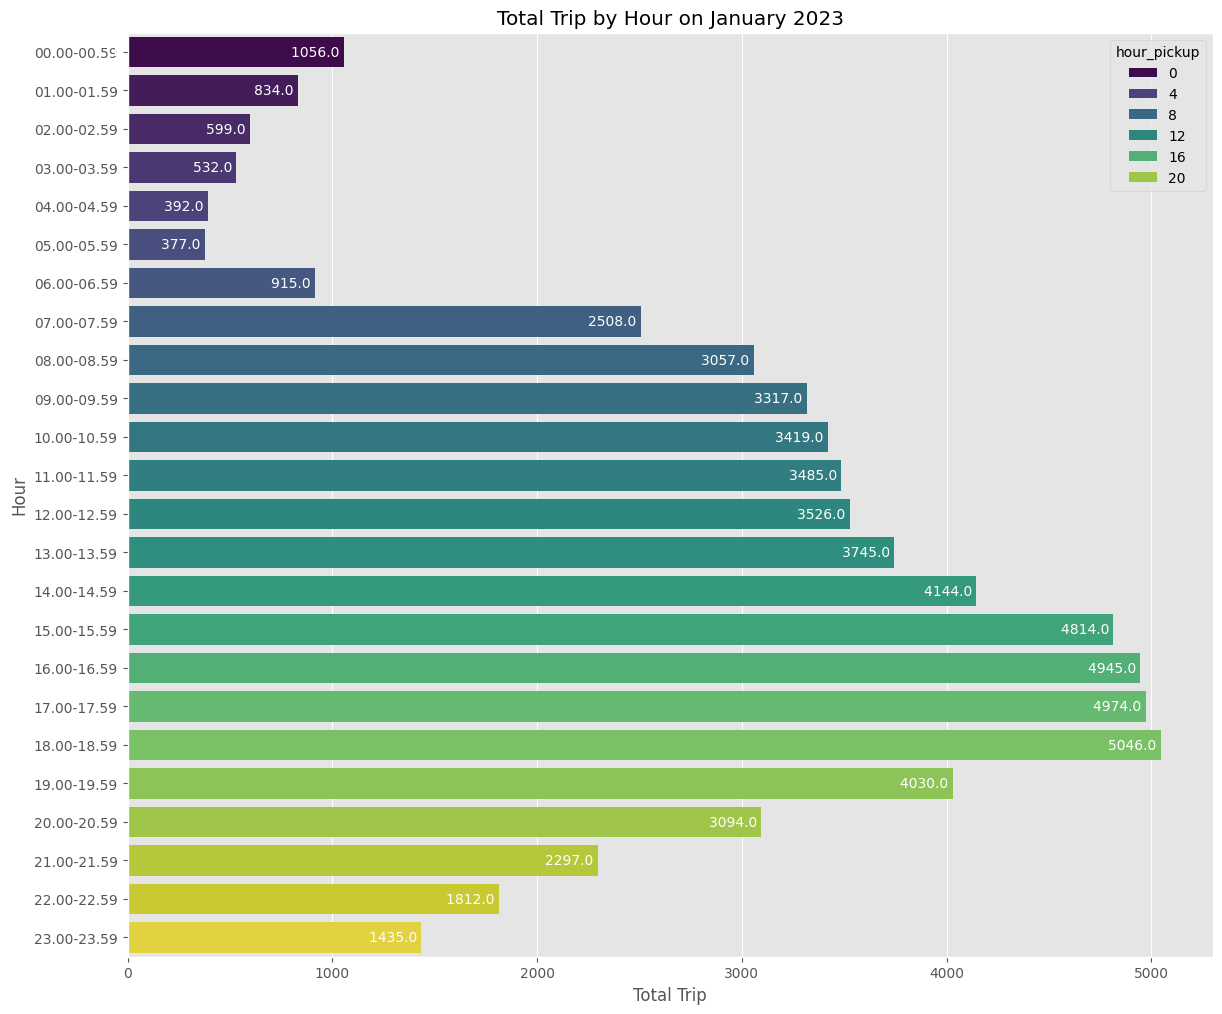

In [165]:


#total penumpang berdasarkan jam penjemputan
total_pass_by_hour= df['hour_pickup'].value_counts().to_frame().reset_index().rename(columns={'count':'Total Trip'})

hour_labels = ['00.00-00.59', '01.00-01.59', '02.00-02.59', '03.00-03.59', '04.00-04.59', '05.00-05.59', 
               '06.00-06.59', '07.00-07.59', '08.00-08.59', '09.00-09.59', '10.00-10.59', '11.00-11.59', 
               '12.00-12.59', '13.00-13.59', '14.00-14.59', '15.00-15.59', '16.00-16.59', '17.00-17.59', 
               '18.00-18.59', '19.00-19.59', '20.00-20.59', '21.00-21.59', '22.00-22.59', '23.00-23.59']

#visualisasi 
plt.figure(figsize=(14,12))

ax = sns.barplot(data=total_pass_by_hour, y='hour_pickup', x='Total Trip',orient='h',hue='hour_pickup',palette='viridis')

# Menetapkan posisi label sumbu y
ax.set_yticks(range(len(hour_labels)))

# Mengatur ulang label sumbu y
ax.set_yticklabels(hour_labels)

plt.xlabel('Total Trip')
plt.ylabel('Hour')
plt.title('Total Trip by Hour on January 2023')


annotate_bars(ax)
plt.show()

Grafik di atas menggambarkan pola total trip taxi pada jam padat di bulan januari 2023 terjadi pada rentang pukul `3 siang` sampai  `6 malam`. sementara jam sepi penumpang terjadi pada rentang pukul `12 malam` sampai pukul `6 pagi`. Grafik tersebut juga menunjukan adanya lonjakan trip pada pagi hari dimlaui dari pukul `07.00` dan meningkat saat jam `2 siang` dan kembali turun saat jam `8 malam`. 

selanjutnya kita akan ekplorasi lebih detail terkait pola perjalanan berdasarkan jam dan hari. sehingga kita dapat mengerahkan armada lebih banyak pada jam ramai penumpang

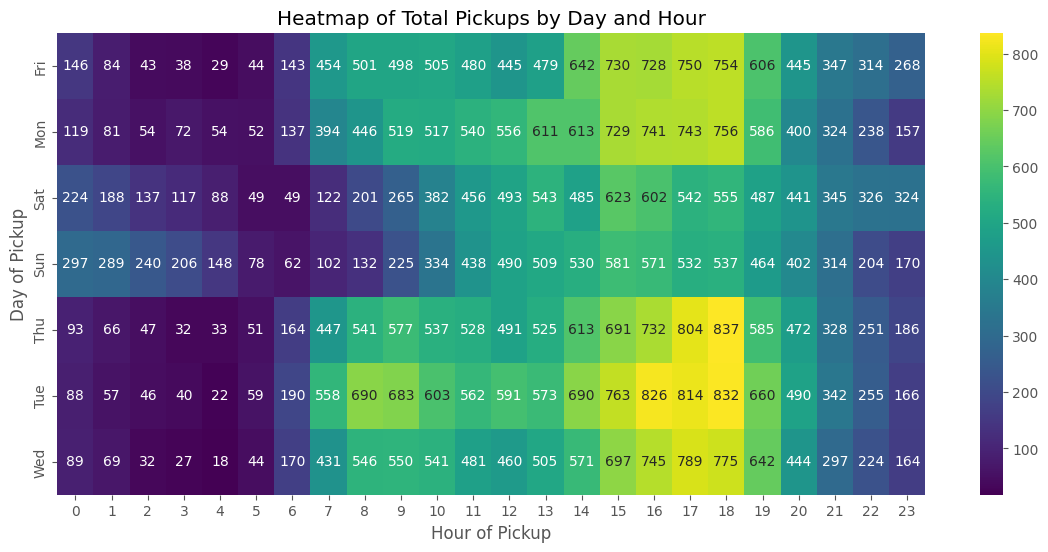

In [166]:
#membuat crosstab dengan index hari, kolom jam penjemputan
total_trip_hour_day = pd.crosstab(
    index=df['dayname_pickup'],
    columns=df['hour_pickup'],
    values=df['hour_pickup'],
    aggfunc='count'
)


hour_labels = ['00.00', '01.00', '02.00', '03.00', '04.00', '05.00', 
               '06.00', '07.00', '08.00', '09.00', '10.00', '11.00', 
               '12.00', '13.00', '14.00', '15.00', '16.00', '17.00', 
               '18.00', '19.00', '20.00', '21.00', '22.00', '23.00']


#visualisasi heatmap
plt.figure(figsize=(14, 6))
ax = sns.heatmap(total_trip_hour_day, cmap='viridis', annot=True, fmt='g')

plt.title('Heatmap of Total Pickups by Day and Hour')
plt.xlabel('Hour of Pickup')
plt.ylabel('Day of Pickup')

plt.show()

sebelumnya kita telah mendapatkan informasi bahwa jam dengan trip yang ramai terjadi antara `2 siang` sampai `6 sore` dan total trip berdasarkan hari lebih banyak pada `weekday` . berdasarkan grafik di atas terjadi informasi menarik bahwa jumlah trip pada **weekend** untuk pukul `12 malam` sampai `4 pagi` lebih banyak di bandingkan hari biasa. grafik tersebut juga memberikan informasi bahwa saat pagi hari jumlah penumpang cukup banyak kemudian terjadi lonjakan penumpang saat siang hari dan menurun saat malam hari. informasi ini dapat di gunakan untuk efisieni armada saat jam sibuk terjadi. 

#### **Total Trip Saat Macet**

untuk mengetahui jumlah penggunaan layanan taxi saat terjadi kemacetan kita akan membuat kolom baru berdasarkan `congestion_curcharge` yang merupakan informasi tambahan biaya saat terjadi kemacetan. jika `congestion_curcharge` lebih dari 0 maka terjadi kemacetan.  

In [167]:
#membuat kolom baru trafic_jam untuk mengetahui trip saat macet
df['trafic_jam'] = np.where(df['congestion_surcharge']>0, 'congested','not congested')

#menapikan 5 data pertama setelah membuat kolom baru
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_pickup,trip_duration,dayname_pickup,dayname_dropoff,hour_pickup,hour_dropoff,trafic_jam
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,1,11.0,Sun,Sun,0,0,congested
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,1,6.0,Sun,Sun,0,0,not congested
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,1,5.0,Sun,Sun,0,0,not congested
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,1,5.0,Sun,Sun,0,0,not congested
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,1,17.0,Sun,Sun,0,1,congested


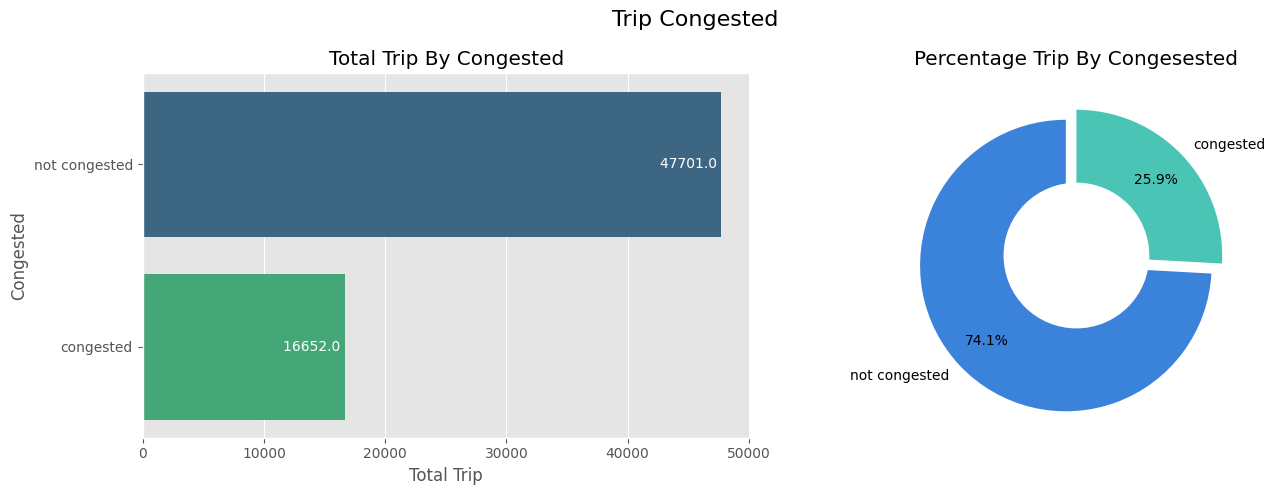

In [168]:
#membuat dataframe untuk total trip by trafic_jam
trip_congest = df['trafic_jam'].value_counts().to_frame().reset_index().rename(columns={'count':'Total Trip'})

#visualisasi trip congested
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(14,5))

ax1 = sns.barplot(
    data=trip_congest, y='trafic_jam', x='Total Trip', 
    hue='trafic_jam',palette='viridis', ax=ax1
)
ax1.set(
    title='Total Trip By Congested',
    xlabel = 'Total Trip',
    ylabel = 'Congested'
)



ax2.pie(
    trip_congest['Total Trip'],
    labels=trip_congest['trafic_jam'],
    autopct='%1.1f%%',
    colors=['#3b82db', '#4ac4b5'],
    startangle=90,
    pctdistance=0.75,
    explode=[0.1, 0],  # Explode hanya untuk bagian pertama (congested)
    textprops={'color': 'black'}
)

ax2.set(
    title='Percentage Trip By Congesested'
) 


# Menambahkan lingkaran di tengah
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig.gca().add_artist(centre_circle)

annotate_bars(ax1)
plt.suptitle('Trip Congested',fontsize=16,fontweight='normal')
plt.tight_layout()
plt.show()

Total perjalanan dalam kondisi macet adalah `14.777` atau `25%` dari total perjalanan selama bulan januari 2023. 
Selanjutnya kita akan mengekplorasi jam yang terjadi kemacetan.  

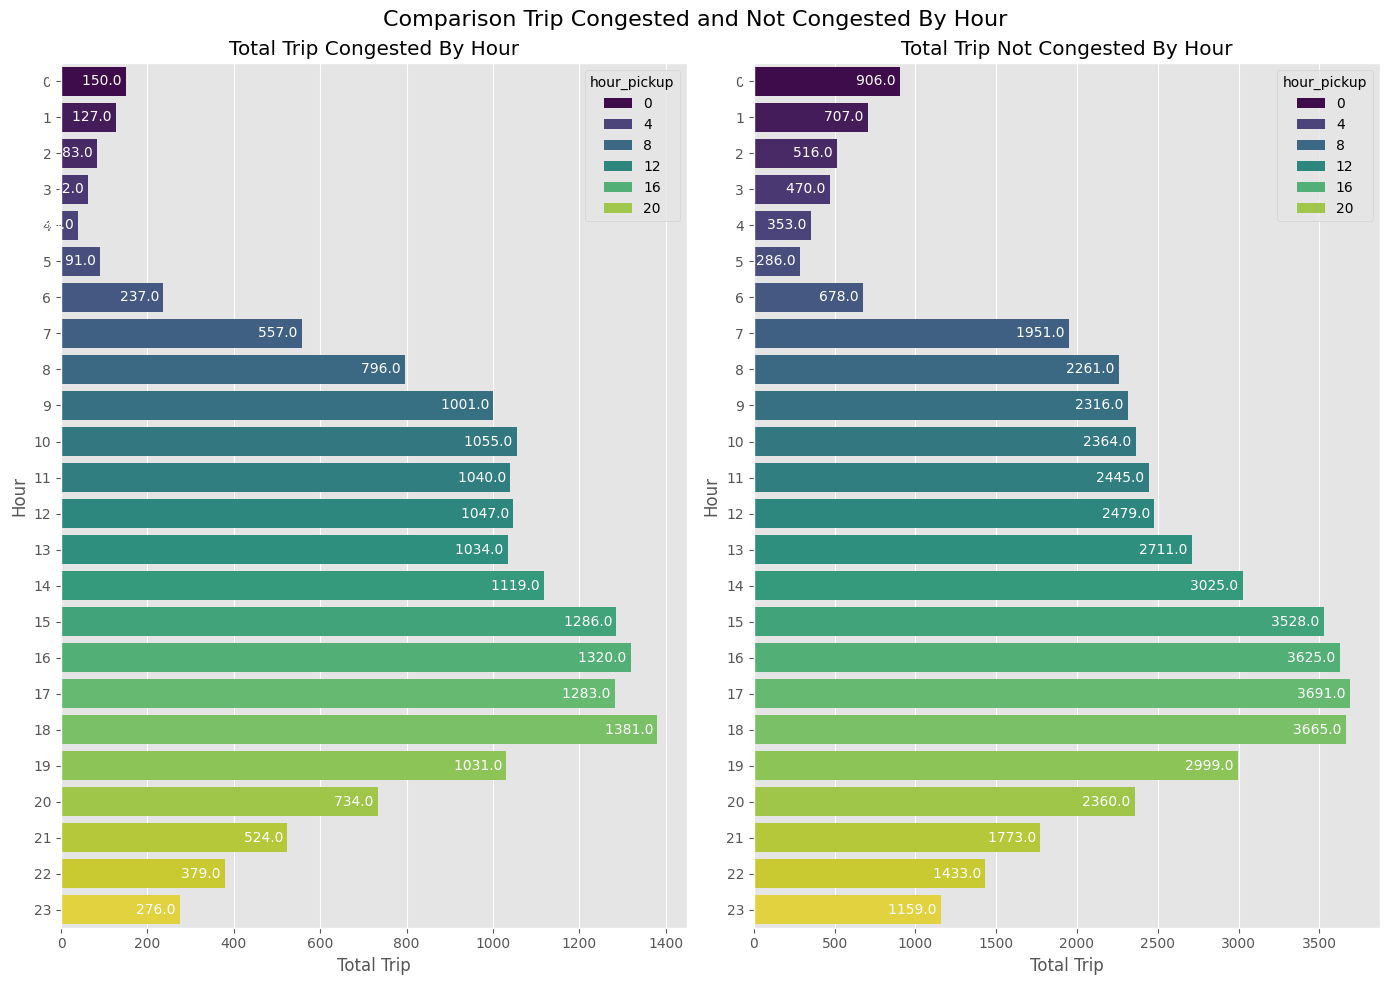

In [169]:
trafic_trip = df.groupby(['hour_pickup','trafic_jam'])[['trafic_jam']].count().rename(columns={'trafic_jam':'Total Trip'}).reset_index()

congested_trip = trafic_trip[trafic_trip['trafic_jam'] == 'congested']
congested_trip_2 = trafic_trip[trafic_trip['trafic_jam'] == 'not congested']


#visualisasi

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(14,10)) 

ax1 = sns.barplot(
    data = congested_trip,
    y = 'hour_pickup',
    x = 'Total Trip',
    orient = 'h',
    hue = 'hour_pickup',
    palette = 'viridis',
    ax=ax1
)

ax1.set(
    title = 'Total Trip Congested By Hour',
    xlabel = 'Total Trip',
    ylabel = 'Hour'
)

ax2 = sns.barplot(
    data = congested_trip_2,
    y = 'hour_pickup',
    x = 'Total Trip',
    orient = 'h',
    hue = 'hour_pickup',
    palette = 'viridis',
    ax=ax2
)
ax2.set(
    title = 'Total Trip Not Congested By Hour',
    xlabel = 'Total Trip',
    ylabel = 'Hour'
)

annotate_bars(ax1)
annotate_bars(ax2)
plt.suptitle('Comparison Trip Congested and Not Congested By Hour', fontsize=16, fontweight='normal')
plt.tight_layout()
plt.show()

Berdasakan informasi di atas kita dapat mengetahaui bahwa jam dengan jumlah trip terbanyak merupakan rentang jam yang sama untuk jumlah trip dalam kemacetan. pukul `14.00 - 18.59` merupakan jam sibuk. meskipun jam sibuk terdapat kisaran 30% penumpang yang tetap menggunakan layanan taxi saat terjadi kemacetan. 

#### **Rangkuman Insight Berdasarkan Analisis Pola Perilaku Konsumen Berdasarkan Waktu** 

1. Total Trip Pada Bulan Januari 2023 berdasarkan Tanggal nya cukup fluktuatif. Tanggal dengan jumlah Trip Terbanyak terjadi di tanggal 25 Januari sementara Tanggal dengan jumlah Trip terendah terjadi pada tanggal 1 Januari pada hari Minggu. 
2. Total Trip saat Weekday pada bulan Januari 2023 lebih tinggi di bandingkan saat weekend. 
3. Jumlah Trip pada jam padat terjadi di jam 2 siang sampai jam 6 sore. jumlah trip berdasarkan jam juga cukup fluktuatif dimana jumlah trip pada pagi hari cukup banyak kemudian terjadi peningkatan di jam padat dan kembali turun saat jam 8 malam. 
4. Total Trip saat Weekend malam hari lebih tinggi di bandingkan weekday malam hari. 
5. 25% Total trip Selama bulan Januari 2023 merupakan Trip dalam kemacetan. 

Informasi di atas dapat membantu pihak NYC Taxi untuk mengoptimalkan armada berdasarkan jam padat penumpang yaitu yaitu dari jam 2 siang sampai 6 sore. kemudian berdsarkan hari kerja weekday lebih ramai akan tetapi untuk jam malam saat weekend lebih ramai di bandingkan saat weekday


#### **B. Pola Perilaku Konsumen Berdasarkan *Location***

Dalam tahapan ini akan di lakukan analisis untuk mengetahui bagaimana pola perjalanan penumpang berdasarkan informasi lokasi *pickup* dan lokasi *dropoff*. tujuan dari analisis ini untuk membantu *`stakeholders`* mendapatkan informasi pola perjalanan berdasarkan lokasi agar bisa merancang strategi untuk mengoptimalkan jumlah armada dan memahami kebiasaan penumpang berdasarkan lokasi penjemputan dan tujuan pada waktu weekday dan weekend. 

untuk memudahkan proses analisis akan menggunakan dataframe `zone` yang memiliki informasi terkait lokasi penjemputan dan lokasi tujuan. oleh karena akan di lakukan merge denga dataframe `zone`

Informasi Terkait `Borough Zone` dari dataframe Zone : 

**`Borough`** di New York City (NYC) adalah pembagian administratif kota tersebut menjadi lima wilayah utama. Setiap borough merupakan sebuah daerah administratif dengan pemerintahan lokalnya sendiri. Berikut adalah lima borough utama di NYC:

1. **`Manhattan`**: Manhattan terletak di bagian tengah NYC dan merupakan pusat keuangan, budaya, dan hiburan kota tersebut. Ini adalah pusat perdagangan dunia, dan rumah bagi beberapa tempat ikonik seperti Central Park, Times Square, dan Wall Street.

2. **`Brooklyn`**: Terletak di barat daya Manhattan, Brooklyn adalah borough terpadat di NYC. Ini adalah rumah bagi beragam komunitas dan budaya, serta memiliki taman dan pantai yang indah.

3. **`Queens`**: Queens terletak di sebelah timur Brooklyn dan selatan The Bronx. Ini adalah borough terbesar berdasarkan luas wilayah dan juga paling beragam secara budaya di NYC. Queens juga memiliki dua bandara utama kota, yaitu Bandara Internasional John F. Kennedy (JFK) dan Bandara LaGuardia.

4. **`The Bronx`**: Terletak di utara Manhattan, The Bronx adalah satu-satunya borough yang terhubung ke daratan utama Amerika Serikat. Ini adalah rumah bagi Bronx Zoo, New York Botanical Garden, dan Yankee Stadium.

5. **`Staten Island`**: Terletak di sebelah selatan Manhattan dan dipisahkan oleh Lower New York Bay, Staten Island adalah borough terluas dan paling jarang dihuni di NYC. Ini memiliki lingkungan yang lebih subur dan banyak ruang terbuka daripada borough lainnya.

6. **`EWR`** : Borough of EWR (Newark Liberty International Airport), yang terletak di New Jersey, tetapi secara fungsional terhubung dengan wilayah metropolitan New York City. Newark Liberty International Airport (EWR) adalah salah satu bandara tersibuk di Amerika Serikat dan melayani sebagai gerbang udara utama untuk wilayah New York City.

In [170]:
#informasi 5 baris awal dan akhir 

display(
    zone.head(),
    zone.tail()
)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


,LocationID,Borough,Zone,service_zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,Unknown,Unknown
264,265,Unknown,Outside of NYC,Unknown


In [171]:
#menggabungkan df dengan zone untuk memudahkan proses analisis berdasarkan lokasi
df = pd.merge(df, zone.add_prefix('PU'), left_on="PULocationID", right_on="PULocationID", how="left")
df = pd.merge(df, zone.add_prefix('DO'), left_on="DOLocationID", right_on="DOLocationID", how="left")

#menghapus kolom yang tidak di butuhkan
df = df.drop(columns=['PUservice_zone','DOservice_zone'])

df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_pickup,trip_duration,dayname_pickup,dayname_dropoff,hour_pickup,hour_dropoff,trafic_jam,PUBorough,PUZone,DOBorough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,1,11.0,Sun,Sun,0,0,congested,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,1,6.0,Sun,Sun,0,0,not congested,Manhattan,Bloomingdale,Manhattan,Central Park
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,1,5.0,Sun,Sun,0,0,not congested,Manhattan,Central Harlem,Manhattan,Upper West Side North
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,1,5.0,Sun,Sun,0,0,not congested,Manhattan,Central Harlem,Manhattan,East Harlem North
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,1,17.0,Sun,Sun,0,1,congested,Manhattan,Central Harlem,Manhattan,Yorkville East


kita telah berhasil membuat kolom baru `PUZone` dan `DOZone` berdasarkan kolom `LocationID` dari dataframe `zone` yang di gabungkan dengan `PULocationID` dan `DOLocationID`.


#### **1. Lokasi Pickup Favorit**

kita akan melakukan explorasi terkait distribusi lokasi penjemputan berdasarkan borough





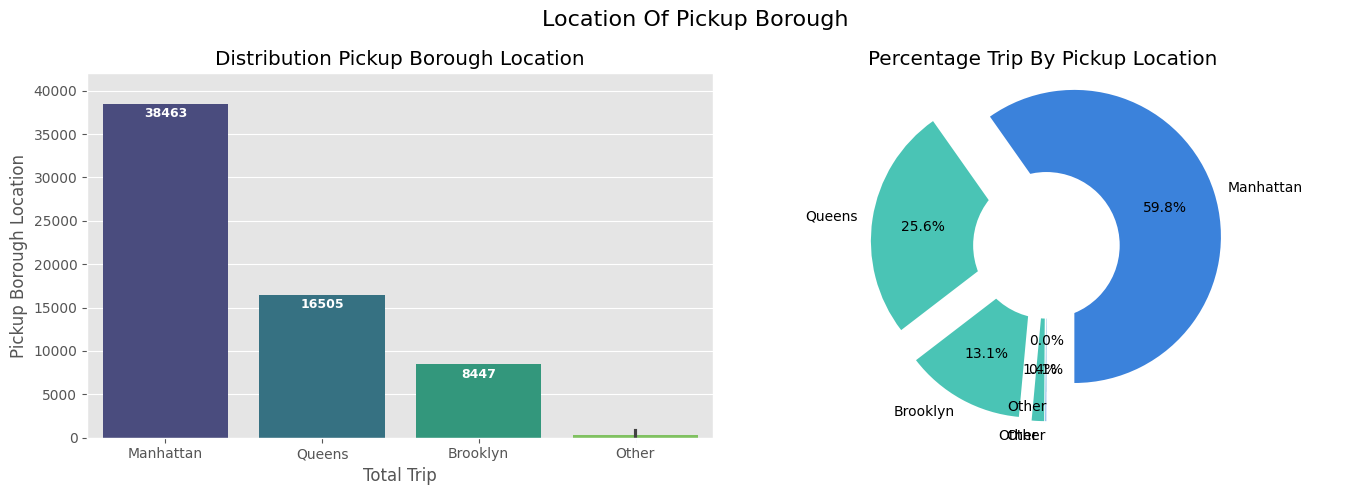

In [213]:
df_copy = df.copy()
pickup_borough = df_copy['PUBorough'].value_counts().to_frame().rename(columns={'count':'Total Trip'}).reset_index()

pickup_borough['PUBorough'] = pickup_borough['PUBorough'].replace({
        'Unknown' : 'Other',
        'Staten Island' : 'Other',
        'Bronx' : 'Other'
})


fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(14,5))

ax1 = sns.barplot(
    data=pickup_borough, x='PUBorough', y='Total Trip', 
    hue='PUBorough',palette='viridis', ax=ax1
)
ax1.set(
    title='Distribution Pickup Borough Location',
    xlabel = 'Total Trip',
    ylabel = 'Pickup Borough Location'
)

ax1.set_ylim(0,42000)

for bar in ax1.patches:
        ax1.annotate(f'{bar.get_height():.0f}',
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                    ha='center', va='center',  # Posisi teks anotasi (horizontal dan vertikal)
                    xytext=(0, -7),  # Jarak teks anotasi dari bar (horizontal, vertikal)
                    textcoords='offset points',  # Koordinat teks anotasi
                    fontsize=9,  # Ukuran font teks anotasi
                    color='white',  # Warna teks anotasi
                    fontweight='semibold'  # Ketebalan huruf teks anotasi
                    )

ax2.pie(
    pickup_borough['Total Trip'],
    labels=pickup_borough['PUBorough'],
    autopct='%1.1f%%',
    colors=['#3b82db', '#4ac4b5','#4ac4b5','#4ac4b5'],
    startangle=270,
    pctdistance=0.65,
    textprops={'color': 'black'},
    explode = [0.2, 0.2, 0.2, 0.2, 0.2,0]
)

ax2.set(
    title='Percentage Trip By Pickup Location '
) 
ax2.axis('equal')

# Menambahkan lingkaran di tengah
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig.gca().add_artist(centre_circle)

# annotate_bars(ax1)
plt.suptitle('Location Of Pickup Borough',fontsize=16,fontweight='normal')
plt.tight_layout()
plt.show()

Berdasarkan grafik tersebut kita mendapatkan insight bahwa `61%` lokasi *pickup* penumpang dalam bulan Januari 2023 terdapat pada Borough `Manhattan`. Pada borough `Bronx` memiliki persentasi 1% , `Staten Island` dan `Unknwon Location` memiliki persentasi di bawah 1% sehingga di masukan ke dalam kategori `Other`. Sementara tidak ada perjalanan taxi yang berasal dari `Newark Airport`. kita akan mengekplorasi distribusi dari `5 lokasi penjemputan favorit` berdasarkan Borough Zone dan jumlah trip dalam bulan Januari 2023. tapi kita hanya akan melakukan eksplorasi untuk 4 Borough Zone dengan persentasi terbesar yaitu : **Manhattan**, **Queens**, **Brooklyn** dan **Bronx** 

In [173]:
#membuat fungsi untuk membuat grafik barplot dan pieplot 

def plot_bar_pie_with_annotation(data, x, y, hue, title, xlabel, ylabel,suptitle):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

    # Plot barplot on the first column
    ax1 = sns.barplot(
        data=data,  # dataframe yang akan di visualisasi
        x=x,   # kolom yang menjadi sumbu x
        y=y,    # kolom yang menjadi sumbu y
        hue=hue,
        palette='viridis',  # di buat berdasarkan gradasi warna viridis
        ax=ax1
    )  

    ax1.set(
        title=title,
        xlabel=xlabel,
        ylabel=ylabel
    )

    for bar in ax1.patches:
        ax1.annotate(f'{bar.get_height():.0f}',
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                    ha='center', va='center',  # Posisi teks anotasi (horizontal dan vertikal)
                    xytext=(0, -7),  # Jarak teks anotasi dari bar (horizontal, vertikal)
                    textcoords='offset points',  # Koordinat teks anotasi
                    fontsize=9,  # Ukuran font teks anotasi
                    color='white',  # Warna teks anotasi
                    fontweight='semibold'  # Ketebalan huruf teks anotasi
                    )

    ax1.tick_params(axis='x', rotation=45)  # Memutar label sumbu x pada barplot

    # Plot pie chart on the second column
    ax2.pie(data[y], labels=data[x], autopct='%1.1f%%', startangle=90, textprops={'color': 'black'},
    colors = ['#becaff','#abb5e5','#98a1cc','#858db2','#727999'], explode = [0.1,0.1,0.1,0.1, 0,])

    ax2.set(title='Percentage Top 5')  # Set title untuk pie plot

    centre_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig.gca().add_artist(centre_circle)
    # Set overall title
    plt.suptitle(suptitle, fontsize=16, fontweight='normal')

    plt.tight_layout()
    plt.show()


**a. Distribusi Lokasi Pickup Di Manhattan**

In [174]:
#menampilkan 5 total zone pickup terbanyak berdasarkan borough
manhattan = df[df['PUBorough'] == 'Manhattan'][['PUZone']]

manhattan = manhattan.value_counts().to_frame()[:5].rename(columns={'count':'Total'}).reset_index()
manhattan

,PUZone,Total
0,East Harlem North,12989
1,East Harlem South,8863
2,Central Harlem,3924
3,Morningside Heights,3841
4,Central Park,2843


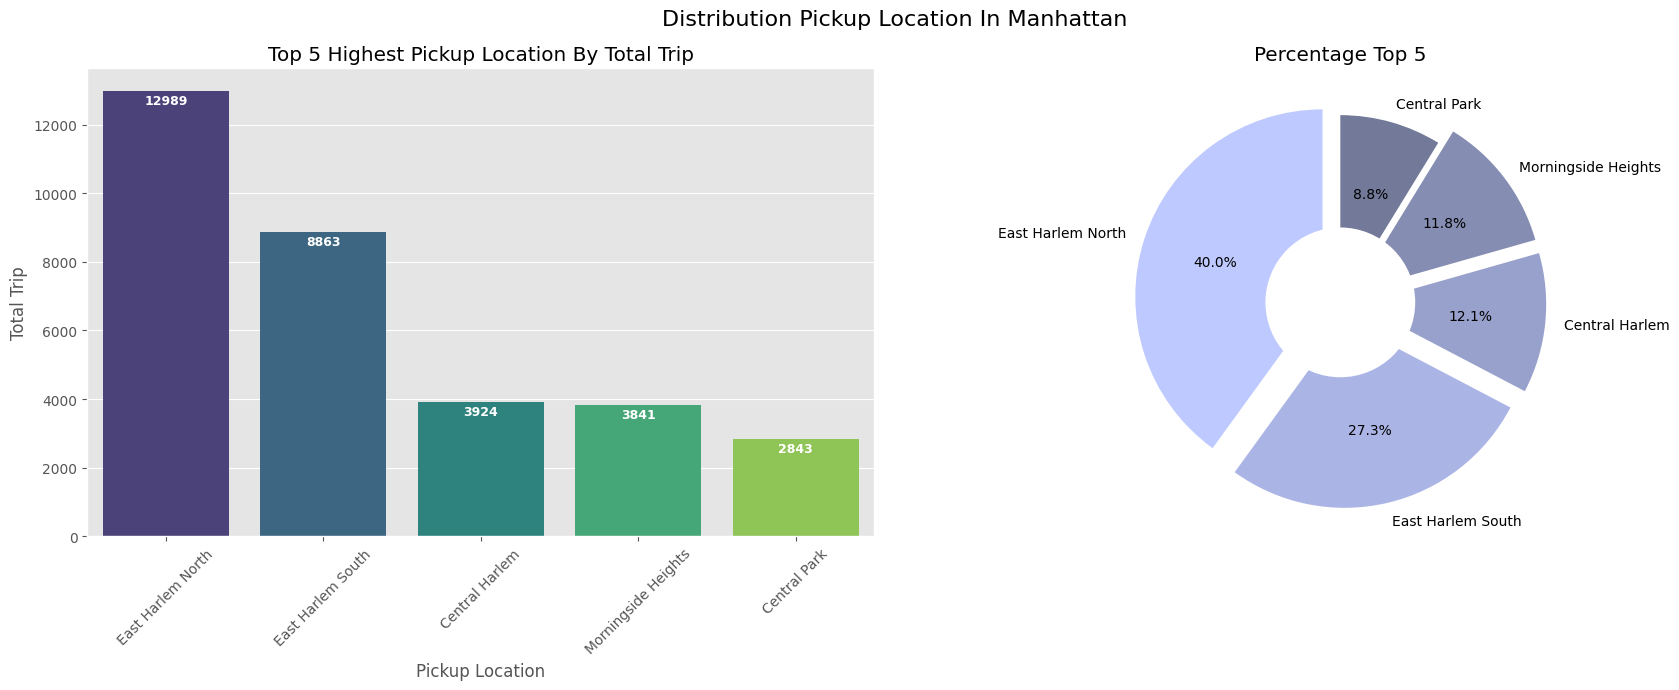

In [175]:
#visualisasi data 
plot_bar_pie_with_annotation(
    data=manhattan,
    x='PUZone',
    y='Total',
    hue='PUZone',
    title='Top 5 Highest Pickup Location By Total Trip',
    xlabel='Pickup Location',
    ylabel='Total Trip',
    suptitle='Distribution Pickup Location In Manhattan'
)


grafik di atas menunjukan 5 lokasi penjemputan dengan total trip terbanyak dan persentasi dari 5 lokasi penjemputan pada borough tersebut.
5 lokasi penjemputan tertinggi pada Borough Manhattan adalah `East Harlem North`, `East Harlem South`, `Central Harlem`, `Morningside Heights` dan `Central Park`.   

**b. Distribusi lokasi Pickup Di Queens**

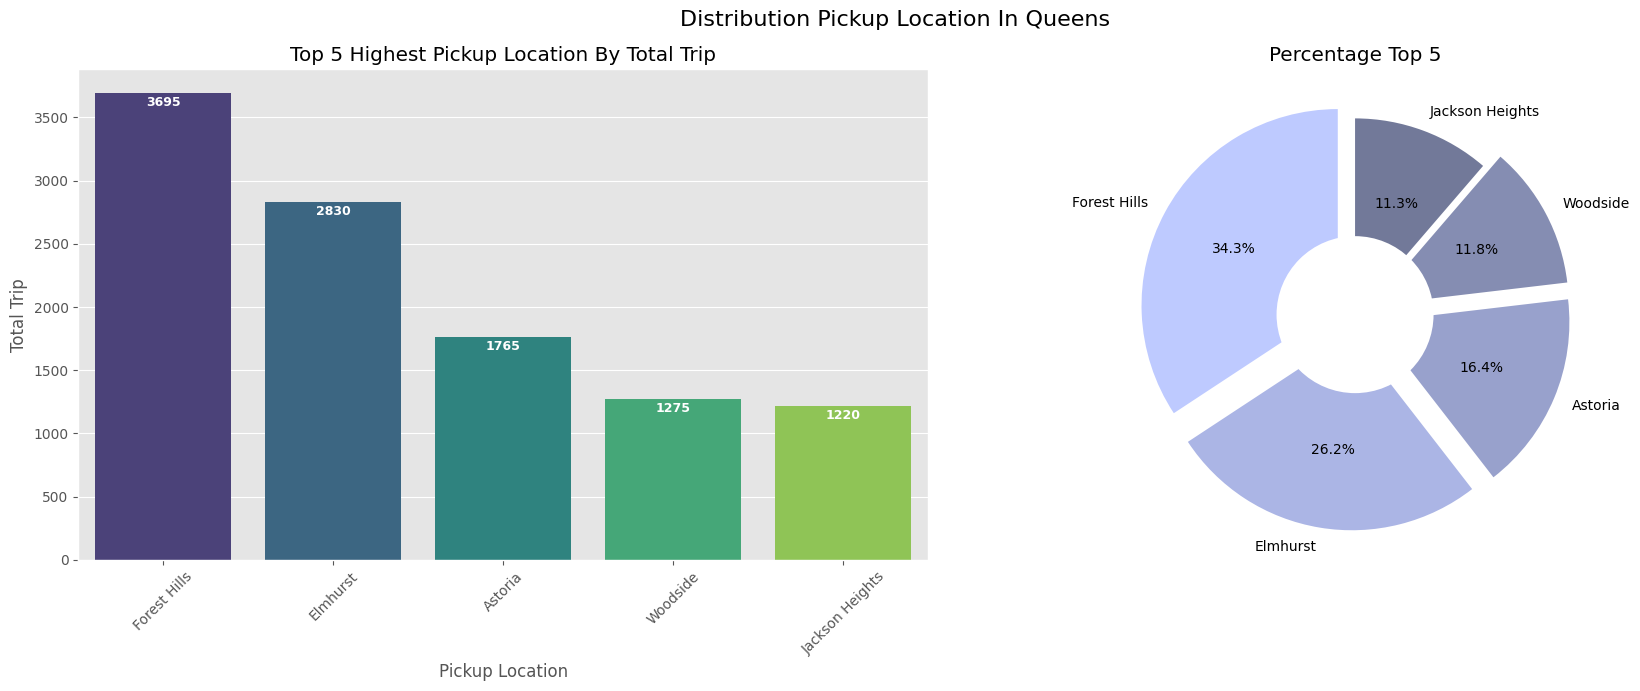

In [176]:
#menampilkan 5 total zone pickup terbanyak berdasarkan borough Queens 
queens = df[df['PUBorough'] == 'Queens'][['PUZone']]

queens = queens.value_counts().to_frame()[:5].rename(columns={'count':'Total'}).reset_index()


#visualisasi data 
plot_bar_pie_with_annotation(
    data=queens,
    x='PUZone',
    y='Total',
    hue='PUZone',
    title='Top 5 Highest Pickup Location By Total Trip',
    xlabel='Pickup Location',
    ylabel='Total Trip',
    suptitle='Distribution Pickup Location In Queens'
)

grafik di atas menunjukan 5 lokasi penjemputan dengan total trip terbanyak dan persentasi dari 5 lokasi penjemputan pada borough Queens.
5 lokasi penjemputan tertinggi pada Borough Queens adalah `Forest Hills`, `Elmhurst`, `Astoria`, `Woodside` dan `jackson Heights`.

hal yang menarik adalah Bandara yang ada di queens yaitu `La Guardia Airport` dan `JFK Airport` tidak masuk dalam top 5 kategori penjemputa 

**c. Distribusi Lokasi Pickup Di Brooklyn**

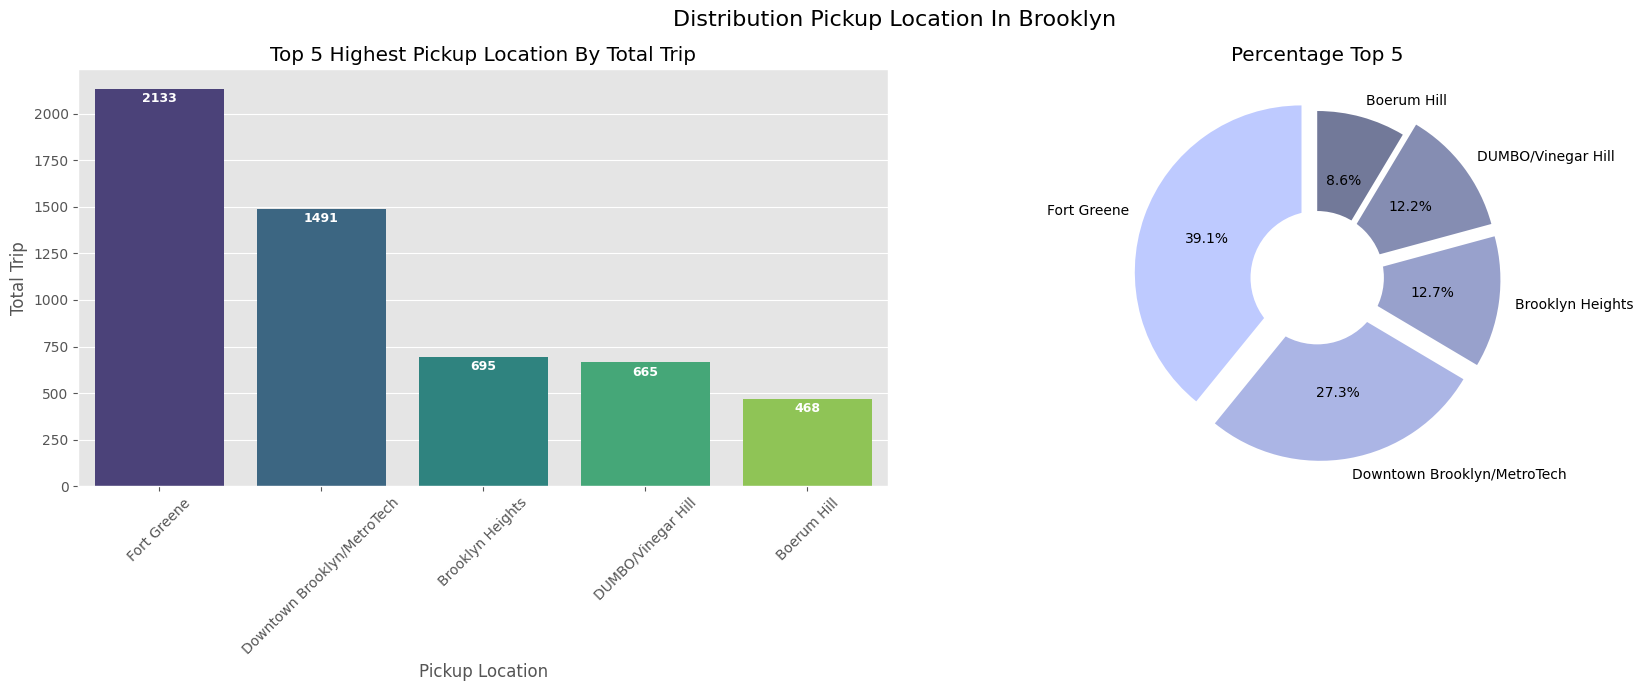

In [177]:
#menampilkan 5 total zone pickup terbanyak berdasarkan borough Brooklyn 
brooklyn = df[df['PUBorough'] == 'Brooklyn'][['PUZone']]

brooklyn = brooklyn.value_counts().to_frame()[:5].rename(columns={'count':'Total'}).reset_index()


#visualisasi data 
plot_bar_pie_with_annotation(
    data=brooklyn,
    x='PUZone',
    y='Total',
    hue='PUZone',
    title='Top 5 Highest Pickup Location By Total Trip',
    xlabel='Pickup Location',
    ylabel='Total Trip',
    suptitle='Distribution Pickup Location In Brooklyn'
)

grafik di atas menunjukan 5 lokasi penjemputan dengan total trip terbanyak dan persentasi dari 5 lokasi penjemputan pada borough Brooklyn.
5 lokasi penjemputan tertinggi pada Borough Brooklyn adalah `Fort Greene`, `Downtown Brooklyn/MetroTech`, `Brooklyn Heights`, `Vinegar Hill` dan `Boerum Hill`.

**d. Distribusi Lokasi Pickup Di Bronx**

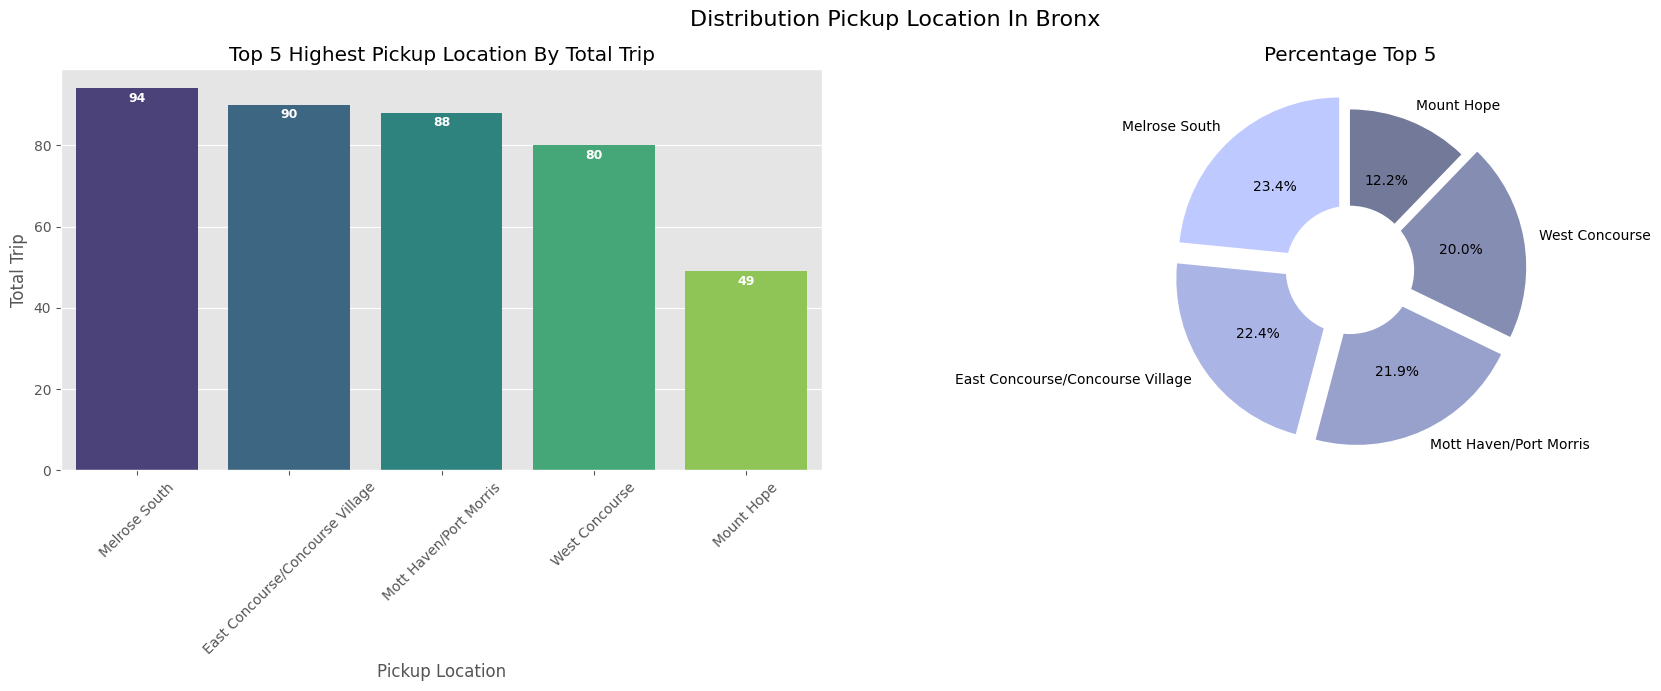

In [178]:
#menampilkan 5 total zone pickup terbanyak berdasarkan borough Brooklyn 
bronx = df[df['PUBorough'] == 'Bronx'][['PUZone']]

bronx = bronx.value_counts().to_frame()[:5].rename(columns={'count':'Total'}).reset_index()


#visualisasi data 
plot_bar_pie_with_annotation(
    data=bronx,
    x='PUZone',
    y='Total',
    hue='PUZone',
    title='Top 5 Highest Pickup Location By Total Trip',
    xlabel='Pickup Location',
    ylabel='Total Trip',
    suptitle='Distribution Pickup Location In Bronx'
)

grafik di atas menunjukan 5 lokasi penjemputan dengan total trip terbanyak dan persentasi dari 5 lokasi penjemputan pada borough Bronx.
5 lokasi penjemputan tertinggi pada Borough Bronx adalah `Melreose South`, `East Concourse`, `Mott Haven`, `West Concourse` dan `Mount Hope`.

#### **2. Distribusi Lokasi *Pickup* Berdasarkan Hari**

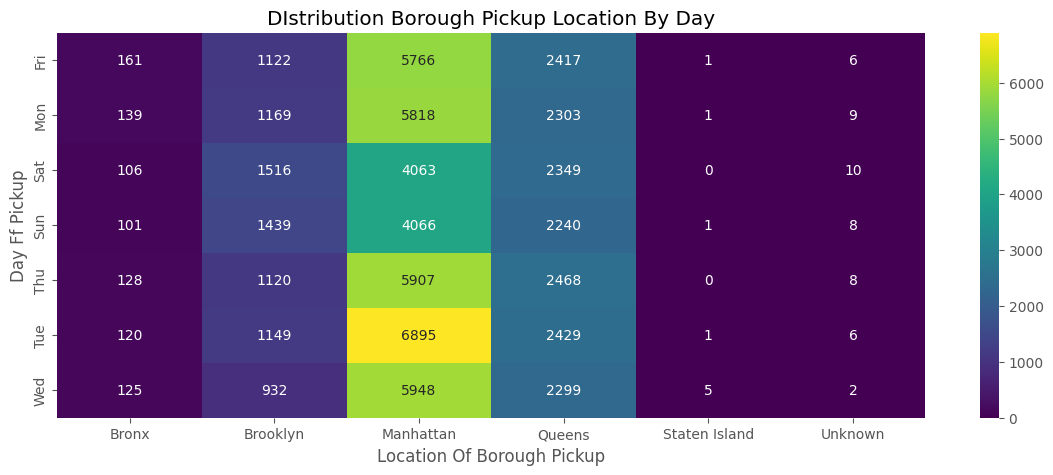

In [179]:


pickup_location_by_day = pd.crosstab(
    index=df['dayname_pickup'], 
    columns=df['PUBorough'])

#visualisasi 


plt.figure(figsize=(14, 5))
ax = sns.heatmap(pickup_location_by_day, cmap='viridis', annot=True, fmt='g')

plt.title('DIstribution Borough Pickup Location By Day')
plt.xlabel('Location Of Borough Pickup')
plt.ylabel('Day Ff Pickup')

plt.show()

Berdasakran Grafik di atas akan di gunakan untuk melihat perbandingan jumlah Trip untuk setiap penjemputan di Borough antara weekday dan weekend : 
1. Borough `Manhattan` Lebih Ramai saat weekday dan mengalami penyusutan saat weekend
2. Borough `Brooklyn` Lebih Ramai saat Weekend di bandingkan saat Weekday
3. Borough `Queens` Tidak memiliki perbedaan yang jauh antara antara weekday dan weekend
4. Borough `Bronx` Mengalami penurunan saat weekend

Kita dapat memberikan rekomendasi kepada pihak NYC untuk mengoptimalkan dirver taxi/armada pada borogh Manhattan saat Weekday karena layanan Taxi pada Borough Manhattan lebih ramai saat Weekday. 

#### **3. Lokasi Dropoff Favorit**

kita akan melakukan explorasi terkait distribusi lokasi dropoff berdasarkan borough

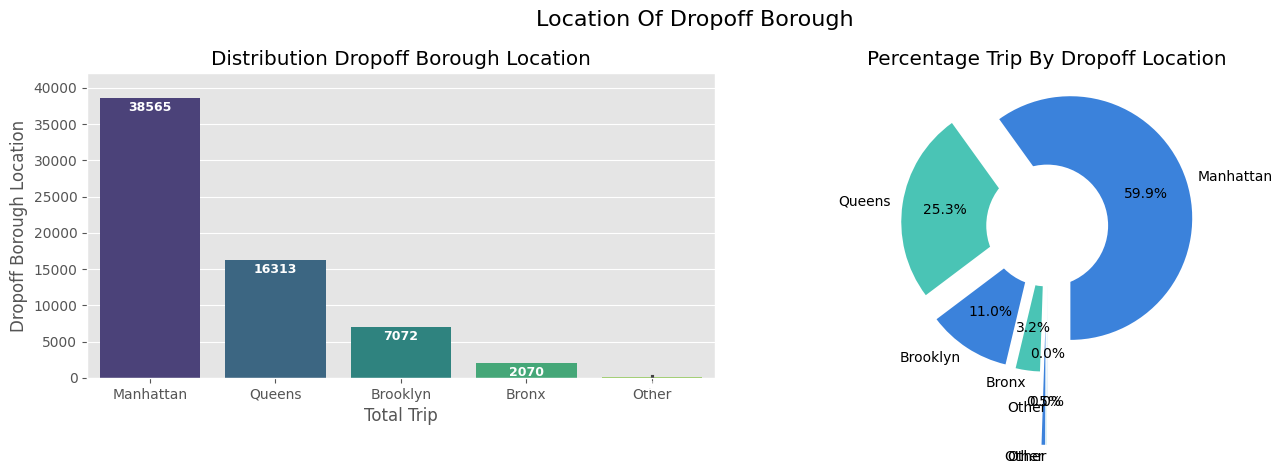

In [237]:
drop_borough = df['DOBorough'].value_counts().to_frame().rename(columns={'count':'Total Trip'}).reset_index()
drop_borough['DOBorough'] = drop_borough['DOBorough'].replace({
        'Unknown' : 'Other',
        'EWR' : 'Other',
        'Staten Island' : 'Other'
})


fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(14,5))

ax1 = sns.barplot(
    data=drop_borough, x='DOBorough', y='Total Trip', 
    hue='DOBorough',palette='viridis', ax=ax1
)
ax1.set(
    title='Distribution Dropoff Borough Location',
    xlabel = 'Total Trip',
    ylabel = 'Dropoff Borough Location'
)

ax1.set_ylim(0,42000)

for bar in ax1.patches:
        ax1.annotate(f'{bar.get_height():.0f}',
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                    ha='center', va='center',  # Posisi teks anotasi (horizontal dan vertikal)
                    xytext=(0, -7),  # Jarak teks anotasi dari bar (horizontal, vertikal)
                    textcoords='offset points',  # Koordinat teks anotasi
                    fontsize=9,  # Ukuran font teks anotasi
                    color='white',  # Warna teks anotasi
                    fontweight='semibold'  # Ketebalan huruf teks anotasi
                    )

ax2.pie(
    drop_borough['Total Trip'],
    labels=drop_borough['DOBorough'],
    autopct='%1.1f%%',
    colors=['#3b82db', '#4ac4b5'],
    startangle=270,
    pctdistance=0.65,
    textprops={'color': 'black'},
    explode = [0.2,0.2,0.2,0.2,0.8,0.8, 0.4] 
)

ax2.set(
    title='Percentage Trip By Dropoff Location'
) 
# ax2.axis('equal')

# Menambahkan lingkaran di tengah
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig.gca().add_artist(centre_circle)

# annotate_bars(ax1)
plt.suptitle('Location Of Dropoff Borough',fontsize=16,fontweight='normal')
plt.tight_layout()
plt.show()

Berdasarkan grafik tersebut kita mendapatkan insight bahwa `60%` lokasi *dropoff* penumpang dalam bulan Januari 2023 terdapat pada Borough `Manhattan`. sementara `Queens` dan `Brooklyn` memiliki persentasi `25%` dan `11%` jika  borough `Bronx` memiliki persentasi 1% pada pickup location untuk dropoff location `Bronx` memiliki persentasi lebih tinggi yaitu 3% , `Staten Island` , `Unknwon Location`, `EWR` memiliki persentasi di bawah 1% sehingga kita akan memasukan ke dalam kategori `Other`. kita akan mengekplorasi distribusi dari `5 lokasi Dropoff favorit` berdasarkan Borough Zone dan jumlah trip dalam bulan Januari 2023. tapi kita hanya akan melakukan eksplorasi untuk 4 Borough Zone dengan persentasi terbesar yaitu : **Manhattan**, **Queens**, **Brooklyn** dan **Bronx** 

In [181]:
df['DOBorough'].value_counts(normalize=True).to_frame()*100

,proportion
DOBorough,
Manhattan,59.927276
Queens,25.349246
Brooklyn,10.989387
Bronx,3.216633
Unknown,0.477056
EWR,0.024863
Staten Island,0.015539


**Distribusi Lokasi Dropoff Di Manhattan**

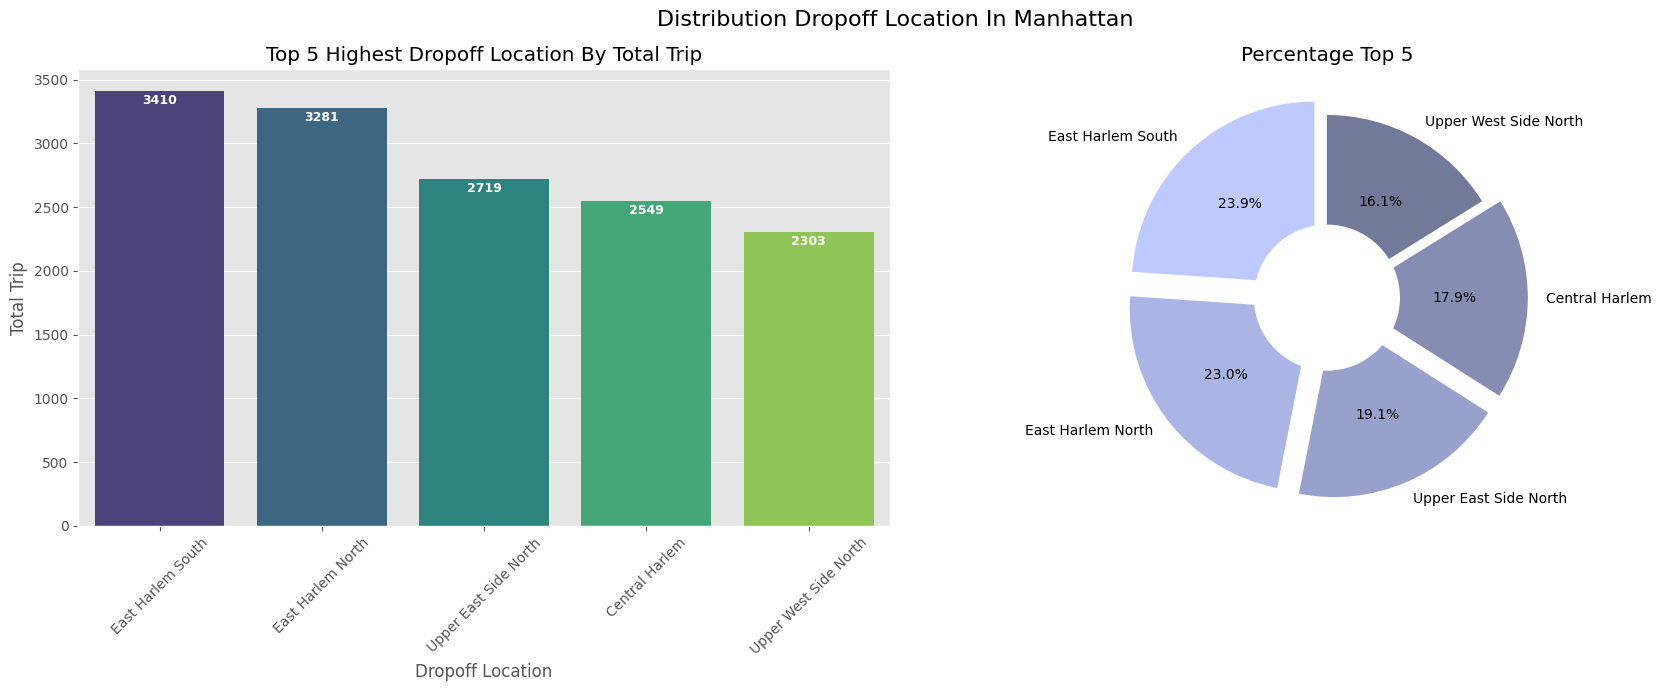

In [182]:
#menampilkan 5 total zone pickup terbanyak berdasarkan borough
manhattan_DO = df[df['DOBorough'] == 'Manhattan'][['DOZone']]

manhattan_DO = manhattan_DO.value_counts().to_frame()[:5].rename(columns={'count':'Total'}).reset_index()

#visualisasi data 
plot_bar_pie_with_annotation(
    data=manhattan_DO,
    x='DOZone',
    y='Total',
    hue='DOZone',
    title='Top 5 Highest Dropoff Location By Total Trip',
    xlabel='Dropoff Location',
    ylabel='Total Trip',
    suptitle='Distribution Dropoff Location In Manhattan'
)

grafik di atas menunjukan 5 lokasi tujuan/dropoff dengan total trip terbanyak dan persentasi dari 5 lokasi dropoff pada borough Mahattan.
5 lokasi dropoff tertinggi pada Borough Manhattan adalah `East Harlem South`, `East Harlem North`, `Upper East Side North`, `Central Harlem` dan `Upper West Side North`.



Terdapat persamaan antara lokasi dropoff dan pickup di Manhattan yaitu `East Harlem North` dan `East Harlem South`. 



**Distribusi Lokasi Dropoff Di Queens**

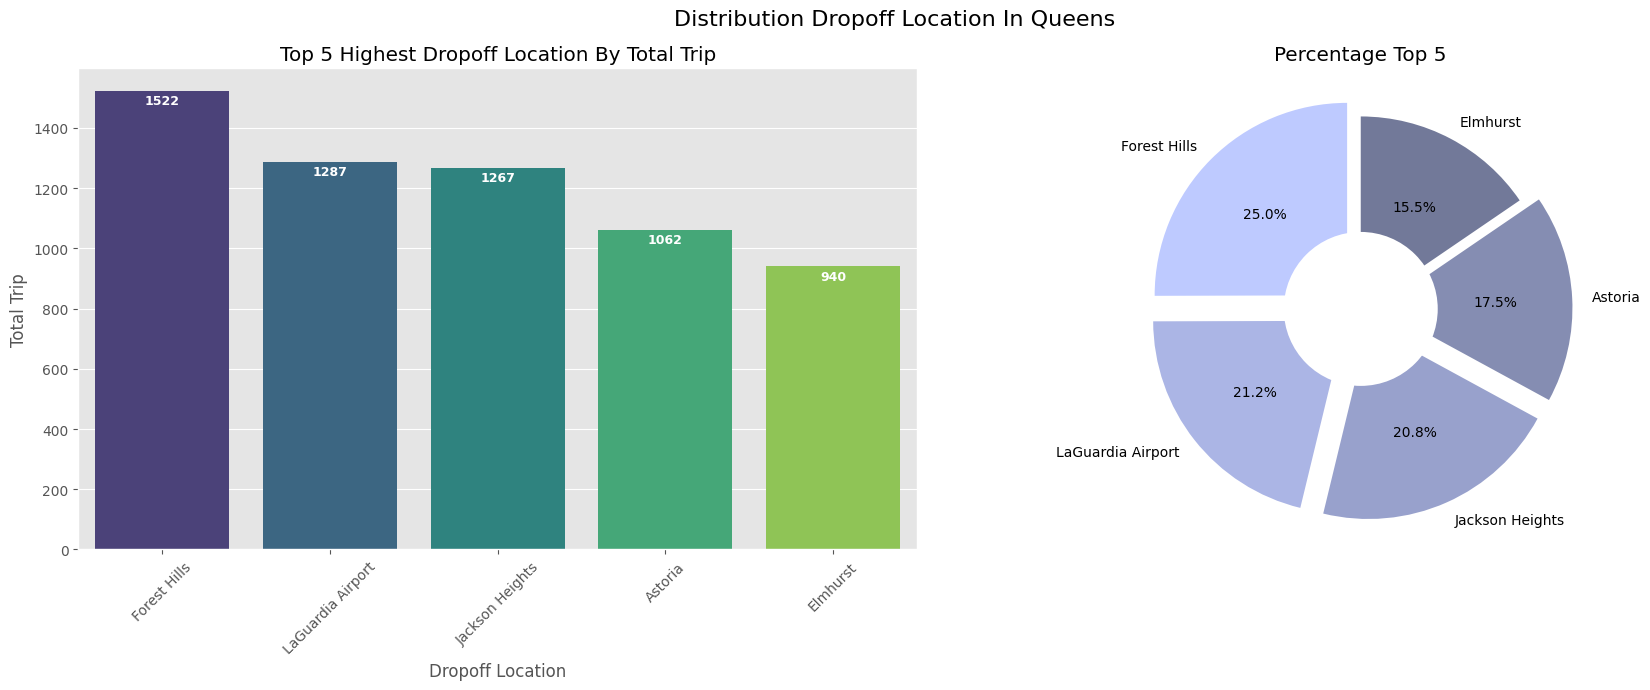

In [183]:
#menampilkan 5 total zone pickup terbanyak berdasarkan borough
queens_DO = df[df['DOBorough'] == 'Queens'][['DOZone']]

queens_DO = queens_DO.value_counts().to_frame()[:5].rename(columns={'count':'Total'}).reset_index()

#visualisasi data 
plot_bar_pie_with_annotation(
    data=queens_DO,
    x='DOZone',
    y='Total',
    hue='DOZone',
    title='Top 5 Highest Dropoff Location By Total Trip',
    xlabel='Dropoff Location',
    ylabel='Total Trip',
    suptitle='Distribution Dropoff Location In Queens'
)

grafik di atas menunjukan 5 lokasi tujuan/dropoff dengan total trip terbanyak dan persentasi dari 5 lokasi dropoff pada borough Queens.
5 lokasi dropoff tertinggi pada Borough Queens adalah `Forest Hills`, `LaGuardia Airport`, `Jackson Heights`, `Astoria` dan `Elmhurst`. 

Pada Lokasi Dropoff LaGuardia Aiport merupakan lokasi favorit no 2 setelah `Forest Hills`. Hal ini Menunjukan bahwa lebih banyak penumpang yang menuju `LaGuardia Airport` daripada keberangkatan dari `LaGuardia Aiport` 

**Distribusi Lokasi Dropoff Di Brooklyn**

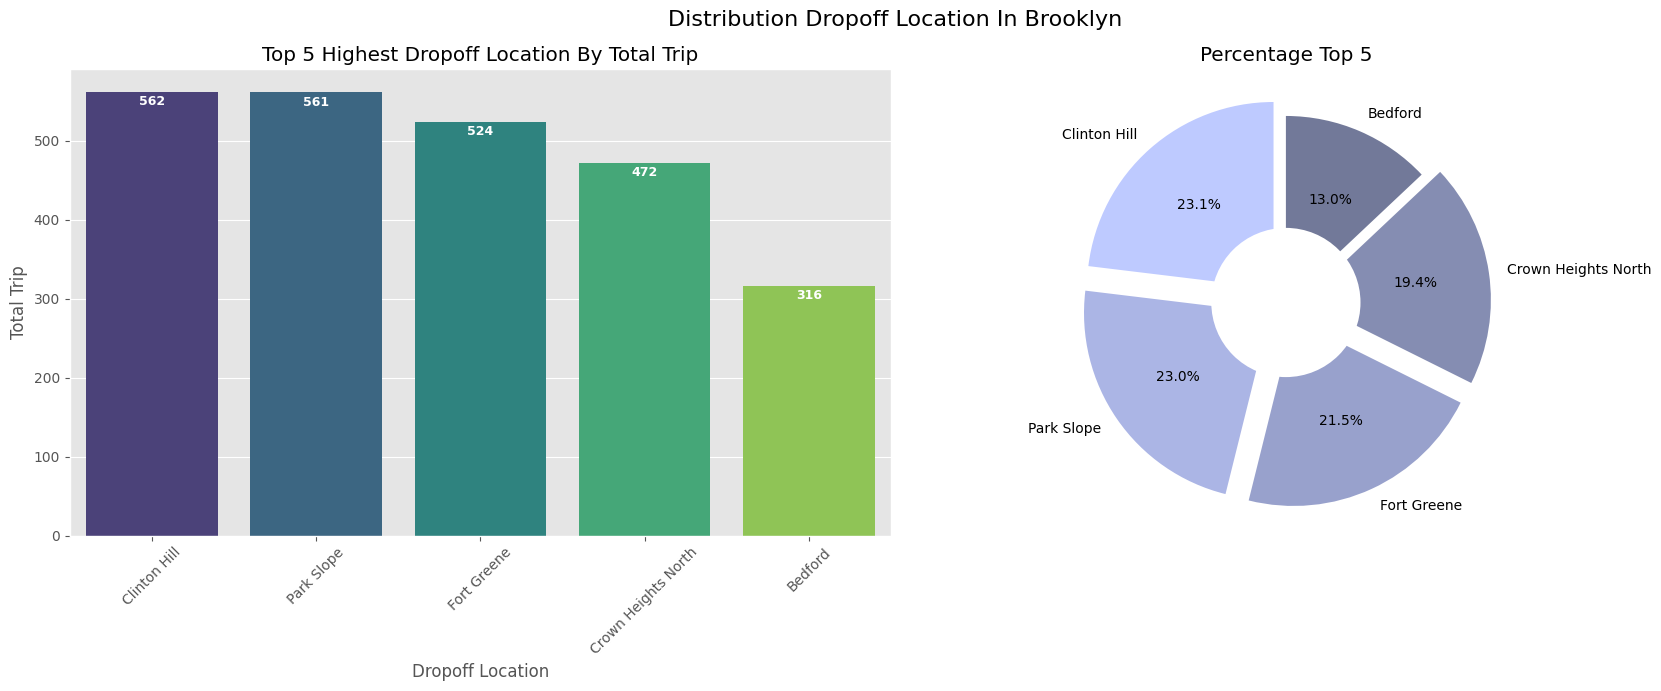

In [184]:
#menampilkan 5 total zone pickup terbanyak berdasarkan borough
brooklyn_DO = df[df['DOBorough'] == 'Brooklyn'][['DOZone']]

brooklyn_DO = brooklyn_DO.value_counts().to_frame()[:5].rename(columns={'count':'Total'}).reset_index()

#visualisasi data 
plot_bar_pie_with_annotation(
    data=brooklyn_DO,
    x='DOZone',
    y='Total',
    hue='DOZone',
    title='Top 5 Highest Dropoff Location By Total Trip',
    xlabel='Dropoff Location',
    ylabel='Total Trip',
    suptitle='Distribution Dropoff Location In Brooklyn'
)

grafik di atas menunjukan 5 lokasi tujuan/dropoff dengan total trip terbanyak dan persentasi dari 5 lokasi dropoff pada borough Brooklyn.
5 lokasi dropoff tertinggi pada Borough Brooklyn adalah `Clinton Hill`, `Park Slope`, `Fort Greene`, `Crown Heights North` dan `Bedford`. 

**Distribusi Lokasi Dropoff Di Bronx**

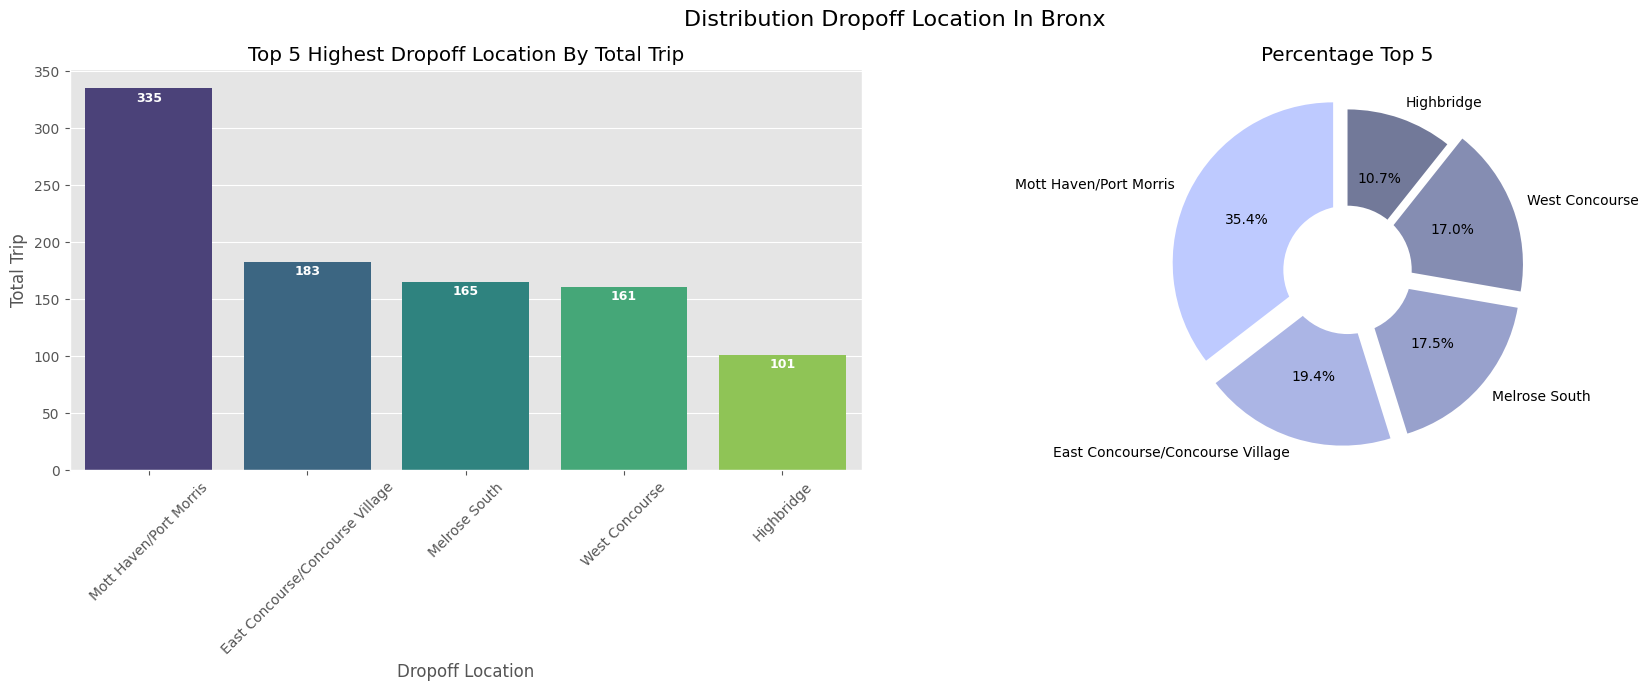

In [185]:
#menampilkan 5 total zone pickup terbanyak berdasarkan borough
bronx_DO = df[df['DOBorough'] == 'Bronx'][['DOZone']]

bronx_DO = bronx_DO.value_counts().to_frame()[:5].rename(columns={'count':'Total'}).reset_index()

#visualisasi data 
plot_bar_pie_with_annotation(
    data=bronx_DO,
    x='DOZone',
    y='Total',
    hue='DOZone',
    title='Top 5 Highest Dropoff Location By Total Trip',
    xlabel='Dropoff Location',
    ylabel='Total Trip',
    suptitle='Distribution Dropoff Location In Bronx'
)

grafik di atas menunjukan 5 lokasi tujuan/dropoff dengan total trip terbanyak dan persentasi dari 5 lokasi dropoff pada borough Queens.
5 lokasi dropoff tertinggi pada Borough Queens adalah `Mott Haven`, `East Concourse`, `Melrose South`, `West Consourse` dan `Highbridge`. 

#### **4. Distribusi Lokasi *Dropoff* Berdasarkan Hari**

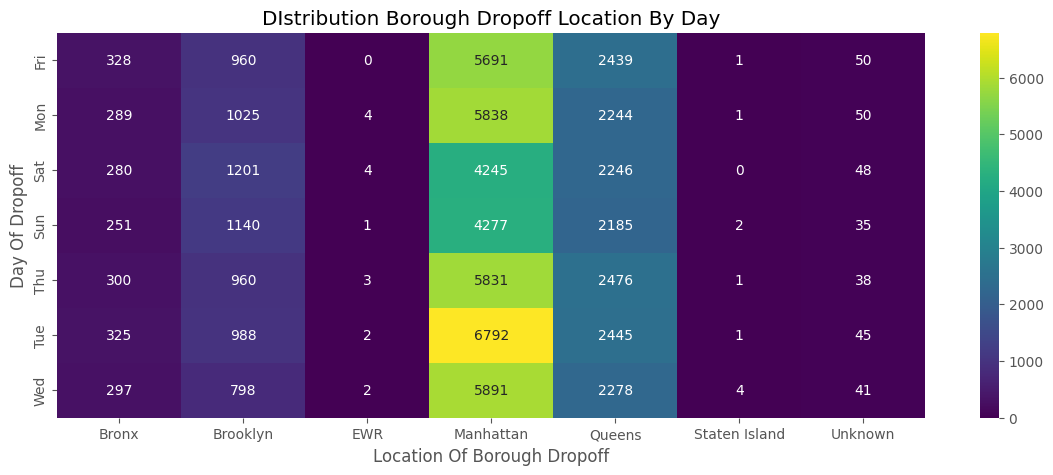

In [186]:
dropoff_location_by_day = pd.crosstab(
    index=df['dayname_dropoff'], 
    columns=df['DOBorough'])

#visualisasi 


plt.figure(figsize=(14, 5))
ax = sns.heatmap(dropoff_location_by_day, cmap='viridis', annot=True, fmt='g')

plt.title('DIstribution Borough Dropoff Location By Day')
plt.xlabel('Location Of Borough Dropoff')
plt.ylabel('Day Of Dropoff')

plt.show()

Berdasakran Grafik di atas akan di gunakan untuk melihat perbandingan jumlah Trip untuk setiap lokasi dropoff di Borough antara weekday dan weekend : 
1. Borough `Manhattan` Lebih Ramai saat weekday dan mengalami penyusutan saat weekend
2. Borough `Brooklyn` Lebih Ramai saat Weekend di bandingkan saat Weekday
3. Borough `Queens` Tidak memiliki perbedaan yang jauh antara antara weekday dan weekend
4. Borough `Bronx` Mengalami penurunan saat weekend

#### **Rangkuman Insight Analisis Pola Perilaku Konsumen Berdasarkan *Location*** 

Borough Manhattan menjadi lokasi pickup dan tujuan favorit bedasarkan jumlah Trip Taxi pada Bulan Januari 2023

Daftar Lokasi Favorit per Borough: 

- Borough Manhattan : 
    - Lokasi Pickup Favorit  : `East Harlem North`, `East Harlem South`, `Central Harlem`, `Morningside Heights` dan `Central Park`. 
    - Lokasi Dropoff Favorit : `East Harlem South`, `East Harlem North`, `Upper East Side North`, `Central Harlem` dan `Upper West Side North`.
    - Pickup dan Dropoff Berdasarkan Hari : Manhattan lebih ramai saat weekday dan mengalami penyusutan perjalanan menggunakan taxi pada weekend
- Borough Queens : 
    - Lokasi Pickup Favorit  : `Forest Hills`, `Elmhurst`, `Astoria`, `Woodside` dan `jackson Heights`.
    - Lokasi Dropoff Favorit : `Forest Hills`, `LaGuardia Airport`, `Jackson Heights`, `Astoria` dan `Elmhurst`.
    - Pickup dan Dropoff Berdasarkan Hari : Total Perjalanan pada saat weekday dan weekend tidak terlalu memiliki perbedaan yang besar. 
- Borough Brooklyn : 
    - Lokasi Pickup Favorit  : `Fort Greene`, `Downtown Brooklyn/MetroTech`, `Brooklyn Heights`, `Vinegar Hill` dan `Boerum Hill`.
    - Lokasi Dropoff Favorit :  `Clinton Hill`, `Park Slope`, `Fort Greene`, `Crown Heights North` dan `Bedford`. 
    - Pickup dan Dropoff Berdasarkan Hari : Total Perjalanan Pada Borough Brooklyn lebih ramai saat weekend di bandingkan weekday
- Borough Bronx : 
    - Lokasi Pickup Favorit  : `Melreose South`, `East Concourse`, `Mott Haven`, `West Concourse` dan `Mount Hope`.
    - Lokasi Dropoff Favorit : `Mott Haven`, `East Concourse`, `Melrose South`, `West Consourse` dan `Highbridge`. 
    - Pickup dan Dropoff Berdasarkan Hari : Pada Borough Bronx lebih ramai weekday di bandingkan weekend Berdasarkan Total Trip. 






#### **C. Analisis Berdasarkan Preferensi dan *Behavior* Penumpang**

#### **1. Pola Jenis Pembayaran Trip Taxi**

kita akan melihat preferensi penumpang berdasarkan tipe pembayaran yang di gunakan. untuk memudahkan proses analisis kita akan merubah label pada kolom `payment_type`

In [187]:
#melihat proporsi data pada kolom payment_type
df['payment_type'].value_counts(normalize=True).to_frame().reset_index()

,payment_type,proportion
0,1.0,0.593850
1,2.0,0.337886
2,5.0,0.064115
3,3.0,0.003403
4,4.0,0.000746


untuk payment type `5`,`3` dan `4` memiliki proporsi di bawah ``1%`` oleh karenanya kita akan menggabungkan ketiga kategori tersebut menjadi `other_payment`. 

In [188]:
df['payment_type'].replace({
    1 : 'Credit Card',
    2 : 'Cash',
    3 : 'Other Payment',
    4 : 'Other Payment',
    5 : 'Other Payment'}, inplace=True
)

display(
    df['payment_type'].value_counts(normalize=True).to_frame().reset_index(),
    df['payment_type'].value_counts().to_frame().reset_index()
)

,payment_type,proportion
0,Credit Card,0.593850
1,Cash,0.337886
2,Other Payment,0.068264


,payment_type,count
0,Credit Card,38216
1,Cash,21744
2,Other Payment,4393


sekarang kita telah merubah value pada kolom `payment_type`. selanjutnya kita akan melakukan visualisasi. 

In [189]:
#menyesuaikan fungsi untuk dengan menambahkan colors,explode dan title2 untuk pie plot
def plot_bar_pie_with_annotation2(data, x, y, hue, title, xlabel, ylabel,suptitle,colors, explode,title2):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

    # Plot barplot on the first column
    ax1 = sns.barplot(
        data=data,  # dataframe yang akan di visualisasi
        x=x,   # kolom yang menjadi sumbu x
        y=y,    # kolom yang menjadi sumbu y
        hue=hue,
        palette='viridis',  # di buat berdasarkan gradasi warna viridis
        ax=ax1
    )  

    ax1.set(
        title=title,
        xlabel=xlabel,
        ylabel=ylabel
    )

    for bar in ax1.patches:
        ax1.annotate(f'{bar.get_height():.0f}',
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                    ha='center', va='center',  # Posisi teks anotasi (horizontal dan vertikal)
                    xytext=(0, -8),  # Jarak teks anotasi dari bar (horizontal, vertikal)
                    textcoords='offset points',  # Koordinat teks anotasi
                    fontsize=14,  # Ukuran font teks anotasi
                    color='white',  # Warna teks anotasi
                    fontweight='semibold'  # Ketebalan huruf teks anotasi
                    )

    # ax1.tick_params(axis='x', rotation=45)  # Memutar label sumbu x pada barplot

    # Plot pie chart on the second column
    ax2.pie(data[y], labels=data[x], autopct='%1.1f%%', startangle=90, textprops={'color': 'black'},
    colors = colors, 
    explode = explode)

    ax2.set(title=title2)  # Set title untuk pie plot

    centre_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig.gca().add_artist(centre_circle)
    # Set overall title
    plt.suptitle(suptitle, fontsize=16, fontweight='normal')

    plt.tight_layout()
    plt.show()


#['#becaff','#abb5e5','#98a1cc','#858db2','#727999']
#[0.1,0.1,0.1,0.1, 0,]

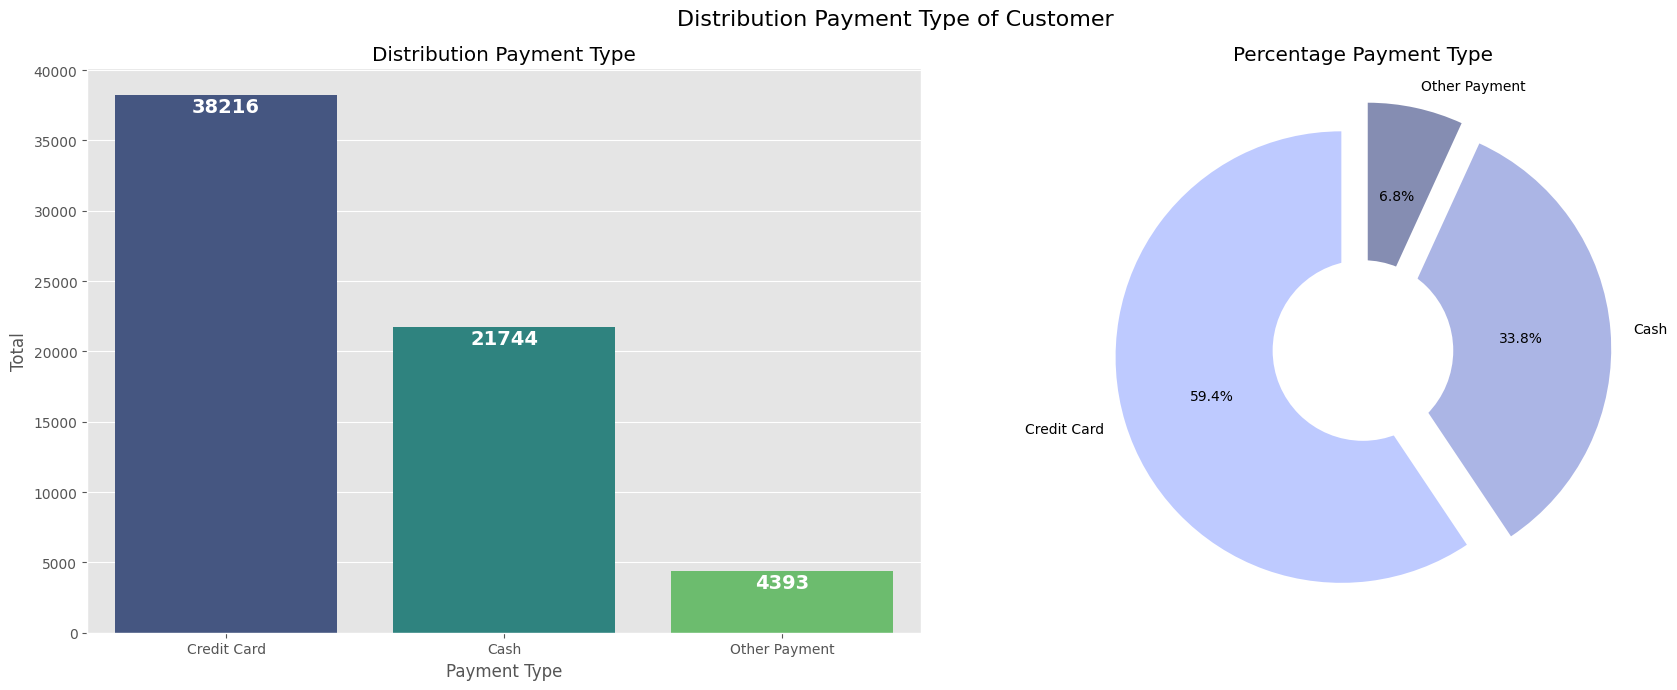

In [190]:
payment = df['payment_type'].value_counts().to_frame().reset_index().rename(columns={'count':'Total'})
plot_bar_pie_with_annotation2(
    data=payment,
    x='payment_type',
    y='Total',
    hue='payment_type',
    title='Distribution Payment Type',
    xlabel='Payment Type',
    ylabel='Total',
    suptitle='Distribution Payment Type of Customer',
    colors=['#becaff','#abb5e5','#858db2'],
    explode=[0.1, 0.1, 0.1],
    title2='Percentage Payment Type'
)

kita dapat mengetahui bahwa `59%` penumpang memilih pembayaran taxi dengan menggunakan `Credit Card`. Berarti pembayaran dengan Credit Crad menjadi tipe pembayaran Favorit untuk seluruh perjalanan dalam bulan Januari 2023. Sementara untuk pembayaran menggunakan `cash` adalah `34%`. untuk mendapatkan insight lebih dalam kita akan melihat preferensi pembayaran penumpang untuk 4 Borough Tertinggi. 

**Manhattan Payment**

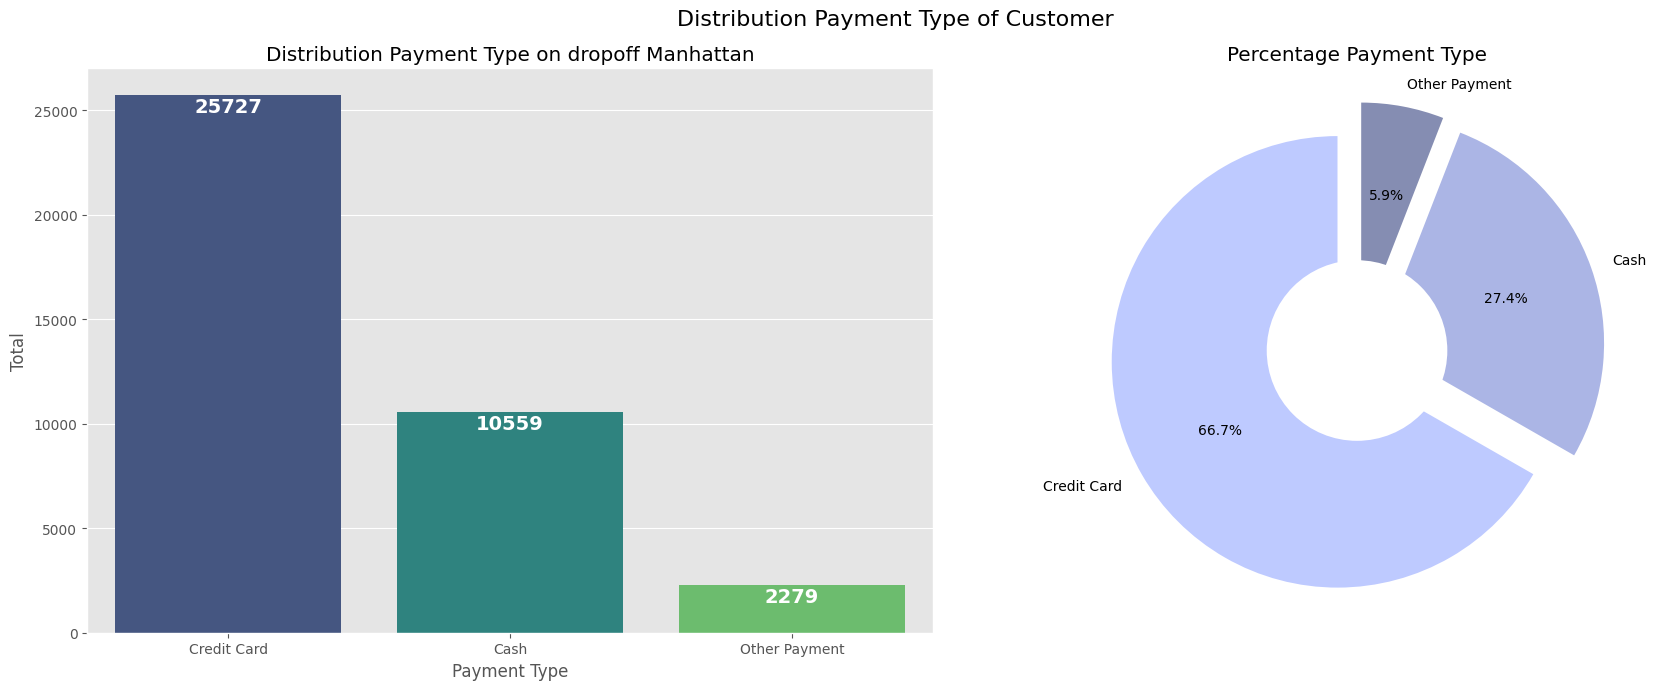

In [191]:
payment_in_manhattan = df[df['DOBorough'] == 'Manhattan'][['payment_type']]
payment_in_manhattan = payment_in_manhattan.value_counts().to_frame().reset_index().rename(columns={'count':'Total'})

plot_bar_pie_with_annotation2(
    data=payment_in_manhattan,
    x='payment_type',
    y='Total',
    hue='payment_type',
    title='Distribution Payment Type on dropoff Manhattan',
    xlabel='Payment Type',
    ylabel='Total',
    suptitle='Distribution Payment Type of Customer',
    colors=['#becaff','#abb5e5','#858db2'],
    explode=[0.1, 0.1, 0.1],
    title2='Percentage Payment Type'
)

untuk lokasi tujuan Manhattan 67% pembayaran di lakukan dengan Credit Card, 27.5% dengan cash. Credit Card menjadi Tipe Pembayaran Favorit untuk Lokasi Dropoff di manhattan. 

**Queens Payment**

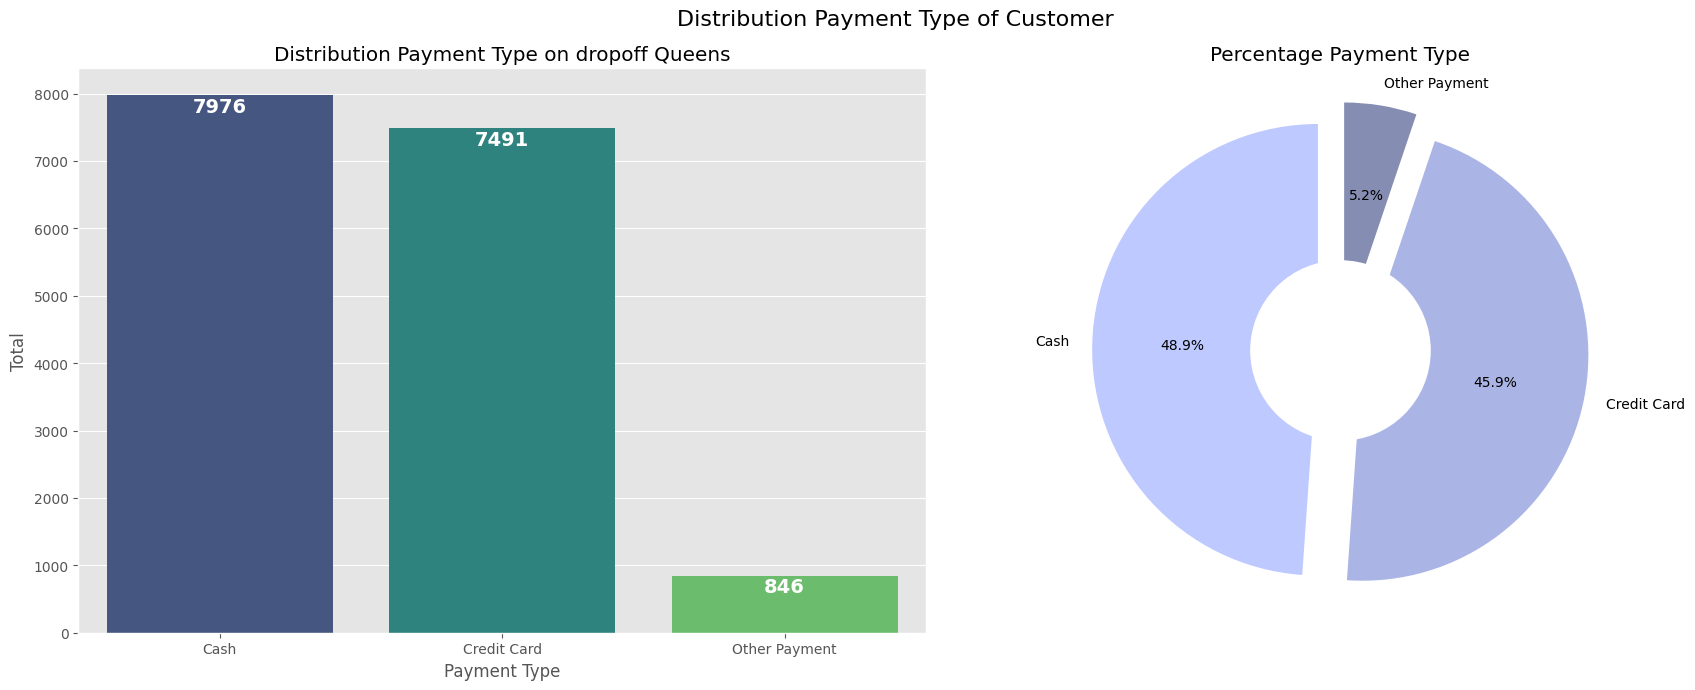

In [192]:
payment_in_queens = df[df['DOBorough'] == 'Queens'][['payment_type']]
payment_in_queens = payment_in_queens.value_counts().to_frame().reset_index().rename(columns={'count':'Total'})

plot_bar_pie_with_annotation2(
    data=payment_in_queens,
    x='payment_type',
    y='Total',
    hue='payment_type',
    title='Distribution Payment Type on dropoff Queens',
    xlabel='Payment Type',
    ylabel='Total',
    suptitle='Distribution Payment Type of Customer',
    colors=['#becaff','#abb5e5','#858db2'],
    explode=[0.1, 0.1, 0.1],
    title2='Percentage Payment Type'
)

prefrensi pembayaran penumpang untuk lokasi dropoff di Queens adalah 49% menggunakan Cash dan 46% menggunakan Credit, Perbedaan antara pembayaran Credit Card dan Cash memiliki selisih 3%. berbeda dengan Manhattan dimana pembayaran lebih banyak untuk Credit Card. 

**Brooklyn Payment**

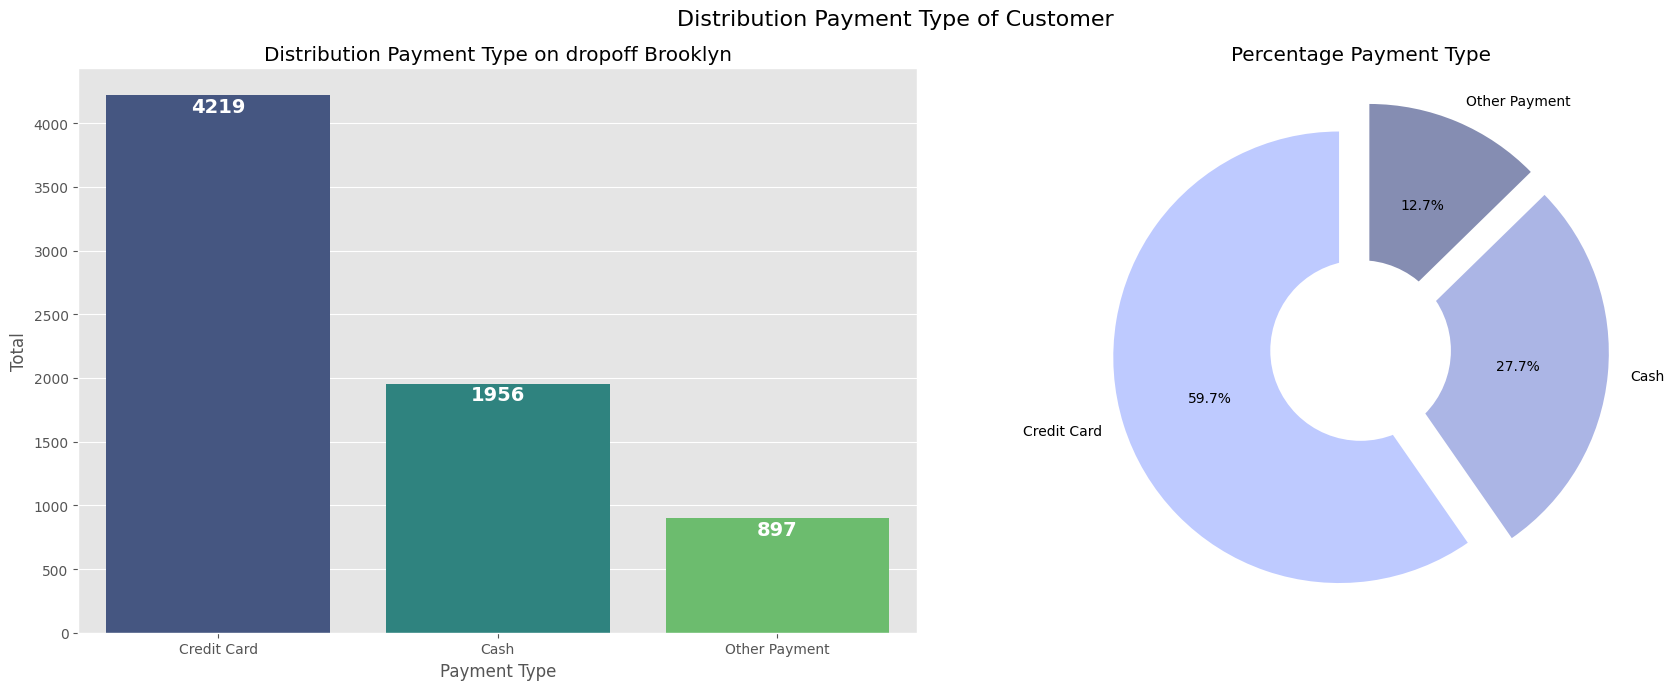

In [193]:
payment_in_brooklyn = df[df['DOBorough'] == 'Brooklyn'][['payment_type']]
payment_in_brooklyn = payment_in_brooklyn.value_counts().to_frame().reset_index().rename(columns={'count':'Total'})

plot_bar_pie_with_annotation2(
    data=payment_in_brooklyn,
    x='payment_type',
    y='Total',
    hue='payment_type',
    title='Distribution Payment Type on dropoff Brooklyn',
    xlabel='Payment Type',
    ylabel='Total',
    suptitle='Distribution Payment Type of Customer',
    colors=['#becaff','#abb5e5','#858db2'],
    explode=[0.1, 0.1, 0.1],
    title2='Percentage Payment Type'
)

Credit Card menjadi tipe pembayaran favorit saat layanan taxi untuk wilayah dropoff di Brooklyn dengan presentasi 60%.

**Bronx Payment**

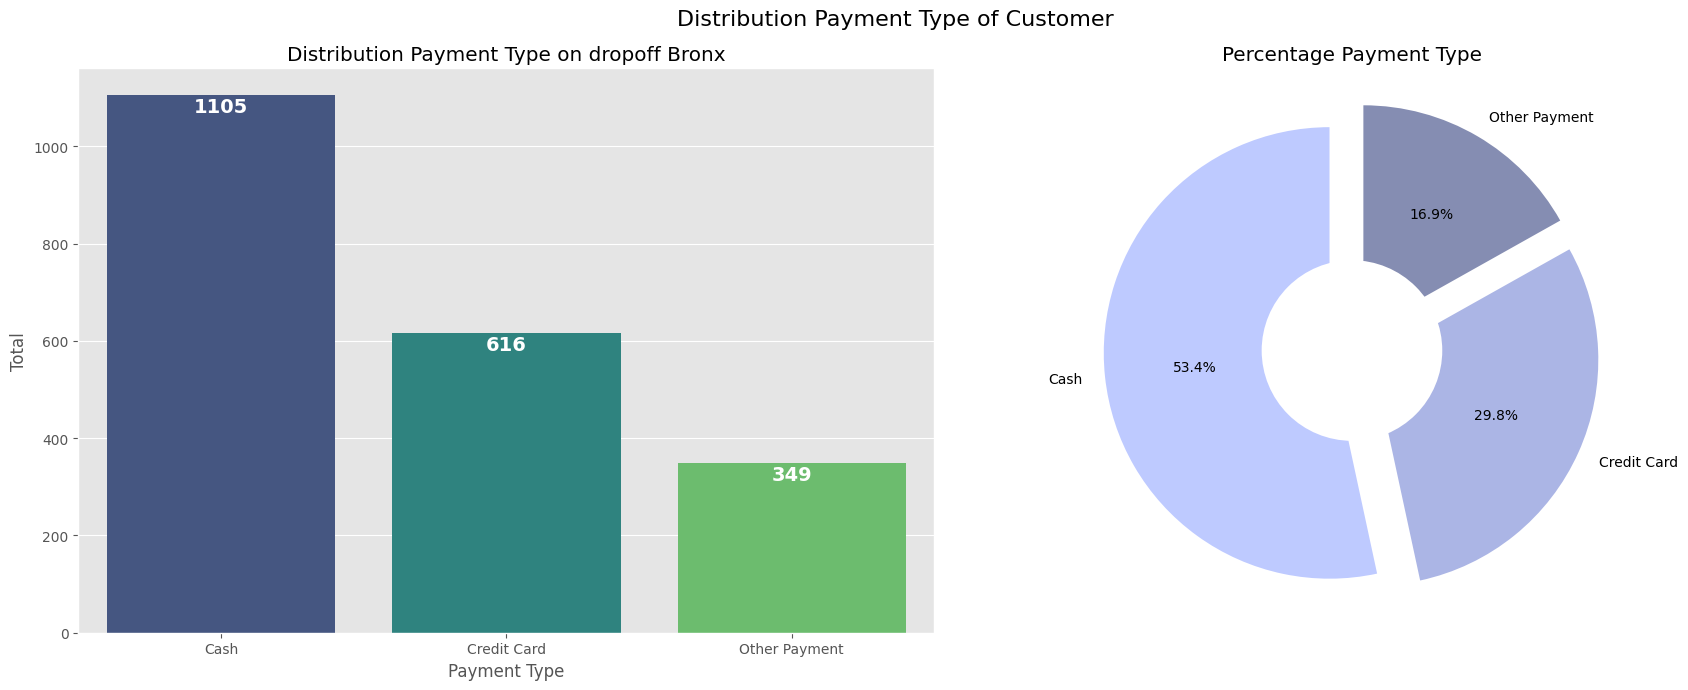

In [194]:
payment_in_bronx = df[df['DOBorough'] == 'Bronx'][['payment_type']]
payment_in_bronx = payment_in_bronx.value_counts().to_frame().reset_index().rename(columns={'count':'Total'})

plot_bar_pie_with_annotation2(
    data=payment_in_bronx,
    x='payment_type',
    y='Total',
    hue='payment_type',
    title='Distribution Payment Type on dropoff Bronx',
    xlabel='Payment Type',
    ylabel='Total',
    suptitle='Distribution Payment Type of Customer',
    colors=['#becaff','#abb5e5','#858db2'],
    explode=[0.1, 0.1, 0.1],
    title2='Percentage Payment Type'
)

Tipe Pembayaran Favorit Di wilayah Bronx adaalh cash dengan persentasi 54% dan 30% untuk Credit Card. 

Berdasarkan Seluruh Grafik di atas kita mendapatkan gambaran bahwa :
- pada Borough `Manhtattan` dan `Brooklyn` Tipe Pembayran Favorit adalah Credit Card 
- sementara untuk `Bronx` tipe pembayaran favoritnya adalah Cash. 
- untuk Borough `Queens` Tipe Pembayaran Cash lebih tinggi 3-4% terhadap pembayaran tipe Credit Card.  

terdapat informasi menarik berdasarkan `Other payment`. kategori `Other Payment` adalah gabungan dari tipe pembayaran `No Charge` (tidak dikenakan biaya), `Dispute` (Terjadi perselisihan terkait pembayran) dan `unknwon payment method`. kita dapat melihat bahwa persentasi tertinggi untuk other payment ada di wilayah `Bronx` dengan persentasi 17%. sehingga kita bisa mengambil kesimpulan bahwa pada wilayah `Bronx` adalah bla bla .. 

#### **2. Durasi Waktu Dan Jarak Perjalanan**

Kita akan melakukan ekplorasi preferensi dan *Behavior* penumpang berdasarkan Durasi waktu dan jarak perjalanan menggunakan taxi.  

In [195]:
#meninjau statistika deskriptif pada kolom trip_distance dan trip_duration
df[['trip_duration','trip_distance']].describe()

,trip_duration,trip_distance
count,64353.000000,64353.000000
mean,13.047333,2.795735
std,8.891858,2.686215
min,0.000000,0.010000
25%,7.000000,1.220000
50%,11.000000,1.940000
75%,17.000000,3.320000
max,59.000000,29.380000


Berdasarkan informasi di atas kita mengetahui bahwa : 
- terdapat nilai 0 menit untuk kolom `trip_duration`. untuk handling masalah ini kita akan membuat `trip_duration` yang kurang dari 2 menit akan di anggap sebagai *Cancel Trip*. nilai maksimal untuk `trip_duration` adalah 59 menit. 
- untuk kolom trip_duration kita akan membagi penumpang dengan total durasi dari 3-10 menit, 11-30 menit, dan lebih dari 30 menit. 
- berdasarkan innformasi `trip_distance` minimum jaraknya adalah 0.01 Mil atau setara 16 meter. jarak tersebut terlalu dekat untuk menggunakan layanan taxi. oleh karena itu kita akan menentukan jarak minumum menggunakakan taxi adalah 0.5 mil atau setara 800 meter. jika `trip_distance` di bawah 0.5 maka akan di karegorikan sebagai `cancel_trip`. 
- untuk kolom `trip_distance` kita akan membagi penumpang dengan total jarak 0.5 - 5 mil, 6 - 10 mil dan > 10 mil.  

In [196]:
#membuat fungsi unuk category group berdasarkan durasi
def duration_group(x):
    '''fungsi membuat kolom age durtion berdasarkan trip_duration'''
    if x <=2 : 
        return 'Cancel'
    elif x <= 10:
        return '3-10 minutes'
    elif x <=30:
        return '11-30 minutes'
    else: 
        return '>30 minutes'


def distance_group(x):
    '''fungsi membuat kolom age durtion berdasarkan trip_duration'''
    if x <= 0.5 : 
        return 'Cancel'
    elif x <= 3:
        return '0.5-3 miles'
    elif x <=7:
        return '4-7 miles'
    else:
        return '>7 miles'


#membuat kolom baru duration group 
df['duration_group'] = df['trip_duration'].apply(duration_group)

#membuat kolom baru distance group
df['distance_group'] = df['trip_distance'].apply(distance_group)


In [197]:
distance = df['distance_group'].value_counts().to_frame().reset_index().rename(columns={'count':'Total'})
duration = df['duration_group'].value_counts().to_frame().reset_index().rename(columns={'count':'Total'})

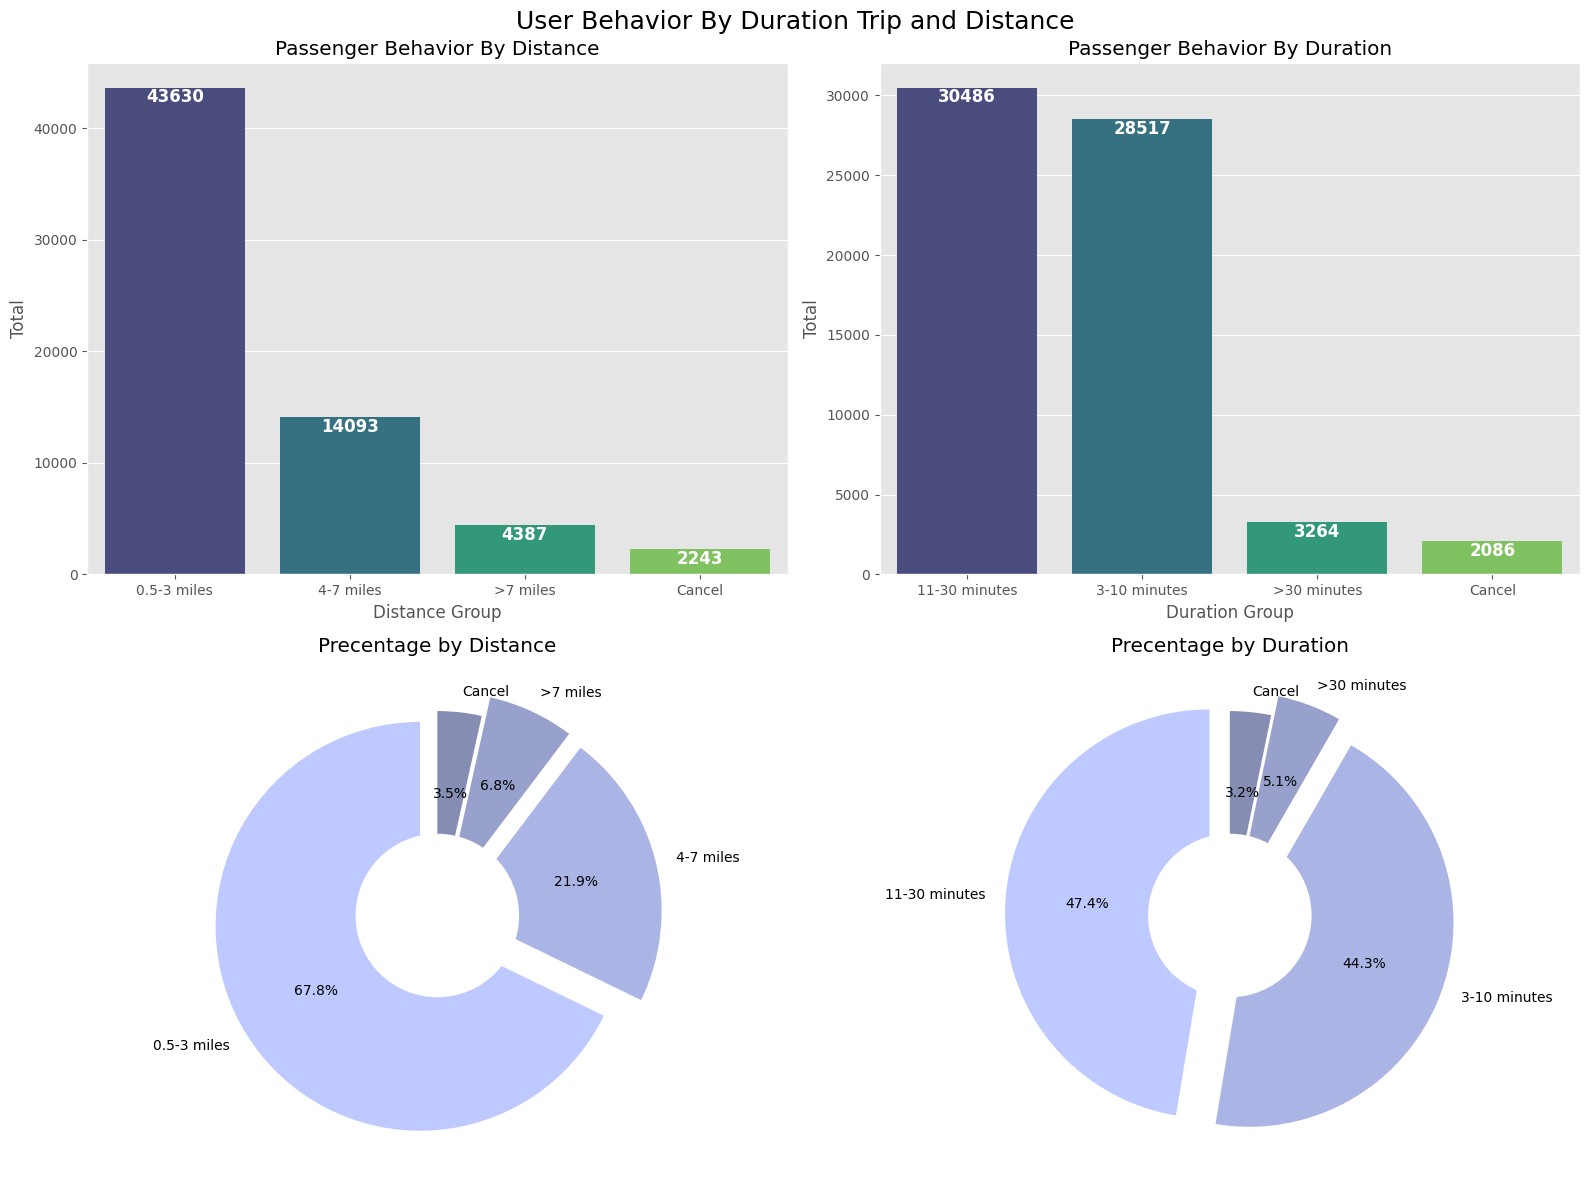

In [198]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
ax1, ax2, ax3, ax4 = axes.flatten()

# Plot barplot on the first column
ax1 = sns.barplot(
    data=distance,  # dataframe yang akan di visualisasi
    x='distance_group',   # kolom yang menjadi sumbu x
    y='Total',    # kolom yang menjadi sumbu y
    hue='distance_group',
    palette='viridis',  
    ax=ax1
)  

ax2 = sns.barplot(
    data=duration, 
    x='duration_group',   
    y='Total',    
    hue='duration_group',
    palette='viridis',  
    ax=ax2
)  

ax1.set(
    title='Passenger Behavior By Distance',
    xlabel='Distance Group',
    ylabel='Total'
)

ax2.set(
    title='Passenger Behavior By Duration',
    xlabel='Duration Group',
    ylabel='Total'
)

for bar in ax1.patches:
    ax1.annotate(f'{bar.get_height():.0f}',
                (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                ha='center', va='center',  # Posisi teks anotasi (horizontal dan vertikal)
                xytext=(0, -7),  # Jarak teks anotasi dari bar (horizontal, vertikal)
                textcoords='offset points',  # Koordinat teks anotasi
                fontsize=12,  # Ukuran font teks anotasi
                color='white',  # Warna teks anotasi
                fontweight='semibold'  # Ketebalan huruf teks anotasi
                )

for bar in ax2.patches:
    ax2.annotate(f'{bar.get_height():.0f}',
                (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                ha='center', va='center',  # Posisi teks anotasi (horizontal dan vertikal)
                xytext=(0, -7),  # Jarak teks anotasi dari bar (horizontal, vertikal)
                textcoords='offset points',  # Koordinat teks anotasi
                fontsize=12,  # Ukuran font teks anotasi
                color='white',  # Warna teks anotasi
                fontweight='semibold'  # Ketebalan huruf teks anotasi
                )

# Plot pie chart on the second column

ax3.pie(distance['Total'], labels=distance['distance_group'], autopct='%1.1f%%', startangle=90, textprops={'color': 'black'},
colors = ['#becaff','#abb5e5','#98a1cc','#858db2'], 
explode = [0.1,0.1,0.1, 0])
ax3.set(title='Precentage by Distance')  # Set title untuk pie plot


ax4.pie(duration['Total'], labels=duration['duration_group'], autopct='%1.1f%%', startangle=90, textprops={'color': 'black'},
colors = ['#becaff','#abb5e5','#98a1cc','#858db2'], 
explode = [0.1,0.1,0.1, 0])
ax4.set(title='Precentage by Duration')


centre_circle1 = plt.Circle((0, 0), 0.4, fc='white')
centre_circle2 = plt.Circle((0, 0), 0.4, fc='white')

ax3.add_artist(centre_circle1)
ax4.add_artist(centre_circle2)

# Set overall title
plt.suptitle('User Behavior By Duration Trip and Distance', fontsize=18, fontweight='normal')
plt.tight_layout()
plt.show()

#['becaff','#abb5e5','#98a1cc','#858db2','#727999']
#[01,0.1,0.1,0.1, 0,]

Berdasarkan Grafik di atas kita mendapatkan informasi bahwa : 
- Berdasarkan Distance Group: 
    - Total Perjalanan Penumpang berdasarkan kategori jarak tempuh paling tinggi pada kategori `05 - 3 miles` dengan persentasi `68%` dari total perjalanan. berarti `68%` Trip ada pada rentang jarak `0.5 - 3 miles`
    - untuk kategori `> 7 miles` memiliki persentasi `7%`. ini berarti hanya sedikit penumpang yang menggunakan taxi jika jaraknya lebih dari 7 miles. 
    - untuk cancelation Trip berdasarkan jarak memiliki persentasi `3.5%`

- Berdasarkan Duration Group:
    - Kategori `11 - 30 menit` merupakan kategori tertinggi berdasarkan durasi perjalanan dengan persentasi 47%.
    - Kategori `3 - 10 menit` memiliki selisih 3% dengan kategori `11 - 30 menit` yaitu 44%. 
    - hanya `5%` perjalanan yang di lakukan  dengan durasi `> 30 menit`. ini menunjukan bahwa kebanyakan perjalanan taxi berdurasi dari 3 - 30 menit. informasi ini memberikan insight bahwa kebanyakan penumpang akan menggunakan layanan taxi jika durasi perjalanan tidak lebih dari 30 menit.
    - untuk cancelation Trip berdasarkan durasi perjalanan memiliki persentasi `3.2%`.

#### **Rangkuman Analisis Berdasarkan Preferensi dan *Behavior* Penumpang**

- Tipe Pembayaran Favorit pada seluruh perjalanan Taxi pada bulan Januari 2023 adalah pembayaran dengan Credit Card dengan persentasi `59%`
- Tipe Pembayaran Favorit Per Borough Dropoff : 
    - Manhattan : Credit Card dengan persentasi `67%`
    - Queens : Cash dengan persentasi `49%` dan Credit Card `46%`
    - Brooklyn : Credit Card dengan persentasi `60%`
    - Bronx : Cash dengan persentasi `53%`
- Tipe Perjalanan tertinggi berdasarkan jarak perjalanan ada di kategori `0.5 - 3 miles` dengan persentasi `68%`
- Tipe Perjalanan tertinggi berdasarkan durasi perjalanan ada di kategori `11 - 30 menit` dengan persentasi `47%`
- Cancelation Trip Rate berdasarkan duration dan distance ada pada rentang `3.2% - 3.5%`

#### **D. Analisis Pola Pemberian Tip**

Pada Tahapan analisis ini kita akan mengecek korelasi kolom lain terhadap kolom `tip_amount`

| Value of Correlation Coeffficient | Relationship Interpretation |
| --- | --- |
| 0.000 - 0.199 | Very Weak |
| 0.200 - 0.399 | Weak |
| 0.400 - 0.599 | Moderate |
| 0.600 - 0.799 | Strong |
| 0.800 - 1.000 | Very Strong |

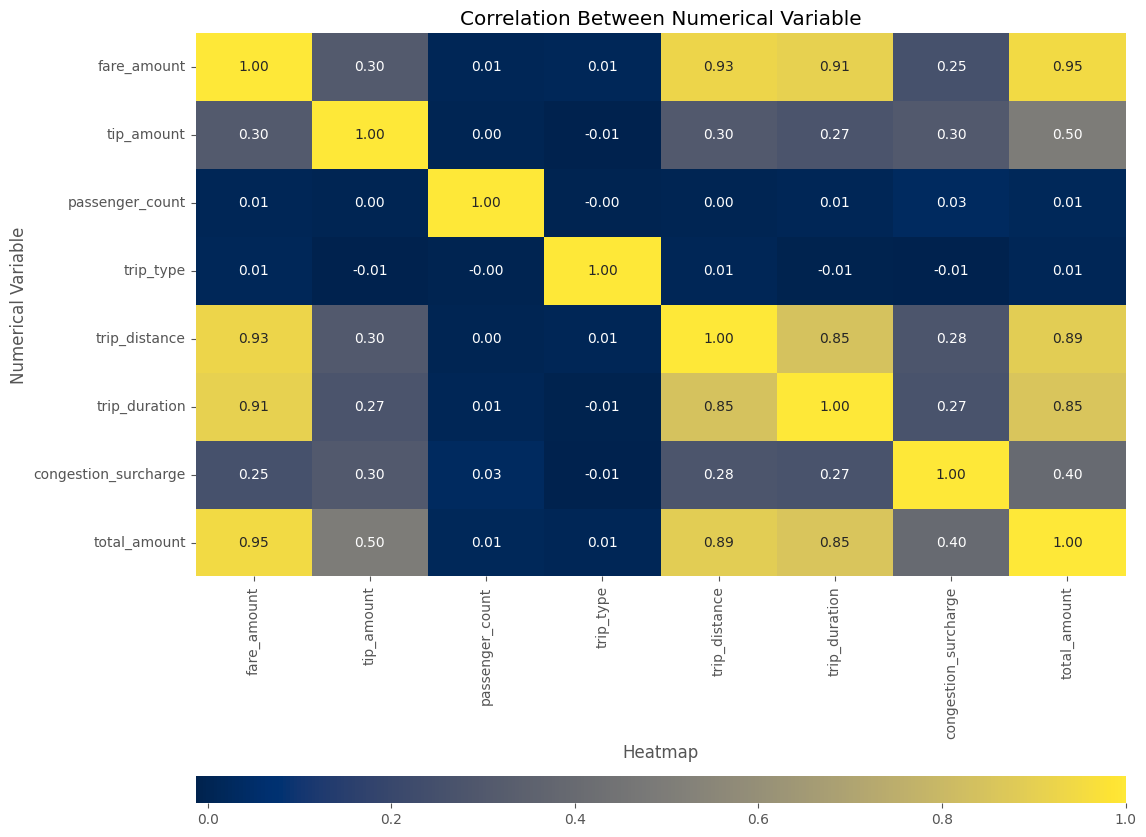

In [199]:
tip_corr = df[['fare_amount','tip_amount','passenger_count','trip_type','trip_distance',
'trip_duration','congestion_surcharge','total_amount']].corr(method='spearman',numeric_only=True)


grid = {
    'height_ratios': (20,1),                #mengatur tinggi plot 1 dan dua
    'hspace' : 0.7                          #mengatur jarak
}

#visualisasi cohort 
fig, (ax_top,ax_bot) = plt.subplots(nrows=2, ncols = 1, figsize=(12,10),gridspec_kw=grid)

sns.heatmap(
    tip_corr,
    annot=True,                             #menambahkan anotasi
    fmt='.2f',                              #format anotaso\i
    cmap='cividis',
    ax=ax_top,                              #menempatkan heatmap pada subplot 1
    cbar_ax= ax_bot,                        #menempatkan colorbar pada subplot 2
    cbar_kws={'orientation':'horizontal'}   #memuat colorbar menjadi horizontal 
)


ax_top.set(
    title = 'Correlation Between Numerical Variable',
    xlabel = 'Heatmap',
    ylabel = 'Numerical Variable'
)

plt.show()

Grafik Heatmap di atas menunjukan bahwa kolom `tip_amount` memiliki korelasi `weak` dan `moderate` dengan kolom lain. 

##### **Pola Pemberian Tips**

pada kolom `tip_amount` merupakan kolom yang menginformasikan total tips yang berikan penumpang dengan menggunakan Credit Card. oleh Karenanya kita akan melihat pola pemberian tips dengan pembayaran Credit Card. 

kita akan melihat pola pemberian trip berdasarkan beberapa kolom yaitu : 
- `distance_group`
- `trafic_jam`
- `duration_group`
- `DOBrough`
- `dayname_pickup`

#### **1. Tips By Distance Group**

In [254]:
# membuat fungsi visualisasi dua bar 
def plot_two_bar(data1,y1,x1,title1,xlabel1,ylabel,data2,y2,x2,title2, xlabel2,suptitle):
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(14,8)) 

    ax1 = sns.barplot(
        data = data1,
        y = y1, #Sumbu y category
        x = x1,  #value dari category
        orient = 'h',
        hue = y1,
        palette = 'viridis',
        ax=ax1
    )

    ax1.set(
        title = title1,
        xlabel = xlabel1,
        ylabel = ylabel
    )

    ax2 = sns.barplot(
        data = data2,
        y = y2,
        x = x2,
        orient = 'h',
        hue = y2,
        palette = 'viridis',
        ax=ax2
    )
    ax2.set(
        title = title2,
        xlabel = xlabel2,
        ylabel = ylabel
    )

    annotate_bars(ax1)
    annotate_bars(ax2)
    plt.suptitle(suptitle, fontsize=16, fontweight='normal')
    plt.tight_layout()
    plt.show()

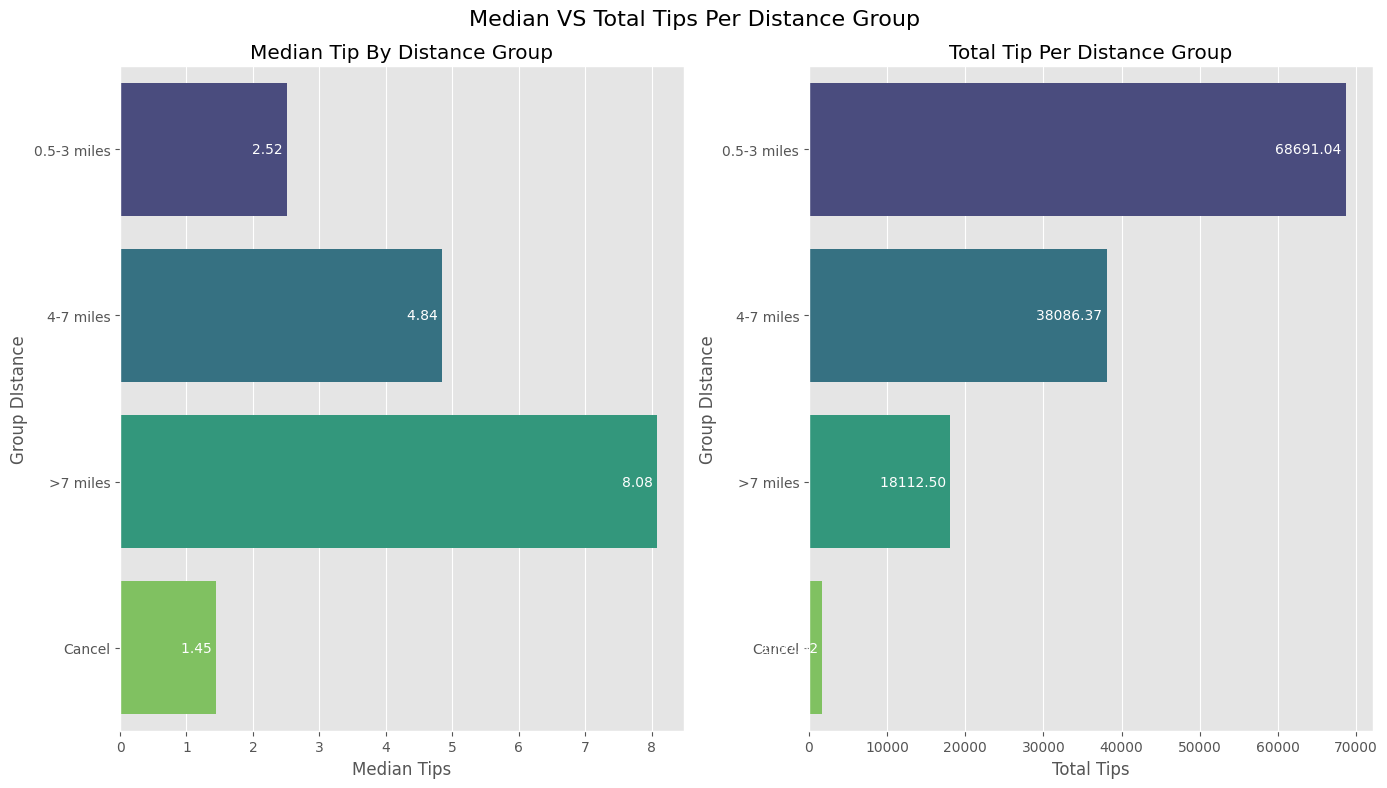

In [255]:
cc = df[df['payment_type'] == 'Credit Card']  #dataframe pembayaran dengan Credit Card

#membuat dataframe distance group berdasarkan median dan totam dari tip amount
median_tip_distance = cc.groupby('distance_group')[['tip_amount']].median().reset_index()
sum_tip_distance = cc.groupby('distance_group')[['tip_amount']].sum().reset_index()


#visualisasi 
plot_two_bar(
    data1=median_tip_distance,
    y1=median_tip_distance['distance_group'],
    x1=median_tip_distance['tip_amount'],
    title1='Median Tip By Distance Group',
    xlabel1='Median Tips',
    ylabel='Group DIstance',
    data2=sum_tip_distance,
    y2=sum_tip_distance['distance_group'],
    x2=sum_tip_distance['tip_amount'],
    title2='Total Tip Per Distance Group',
    xlabel2='Total Tips',
    suptitle='Median VS Total Tips Per Distance Group'
)

Berdasarkan Grafik Di atas :
- Total Tips Terbanyak ada pada kategori perjalanan dengan jarak `0.5 - 3 miles`
- Rata Rata Tips Berdasarkan Median Tertinggi ada pada kategori `> 7 miles` = 8$, kategori  `4 - 7 miles` = 5$ dan kategori `0.5 - 3 miles` = 2.5$
- Informasi yang di peroleh dari median tips berdasarkan jarak adalah semakin jauh jarak perjalanan maka semakin besar tip yang di  oleh penumpang. 

#### **2. Tips By Duration Trip**

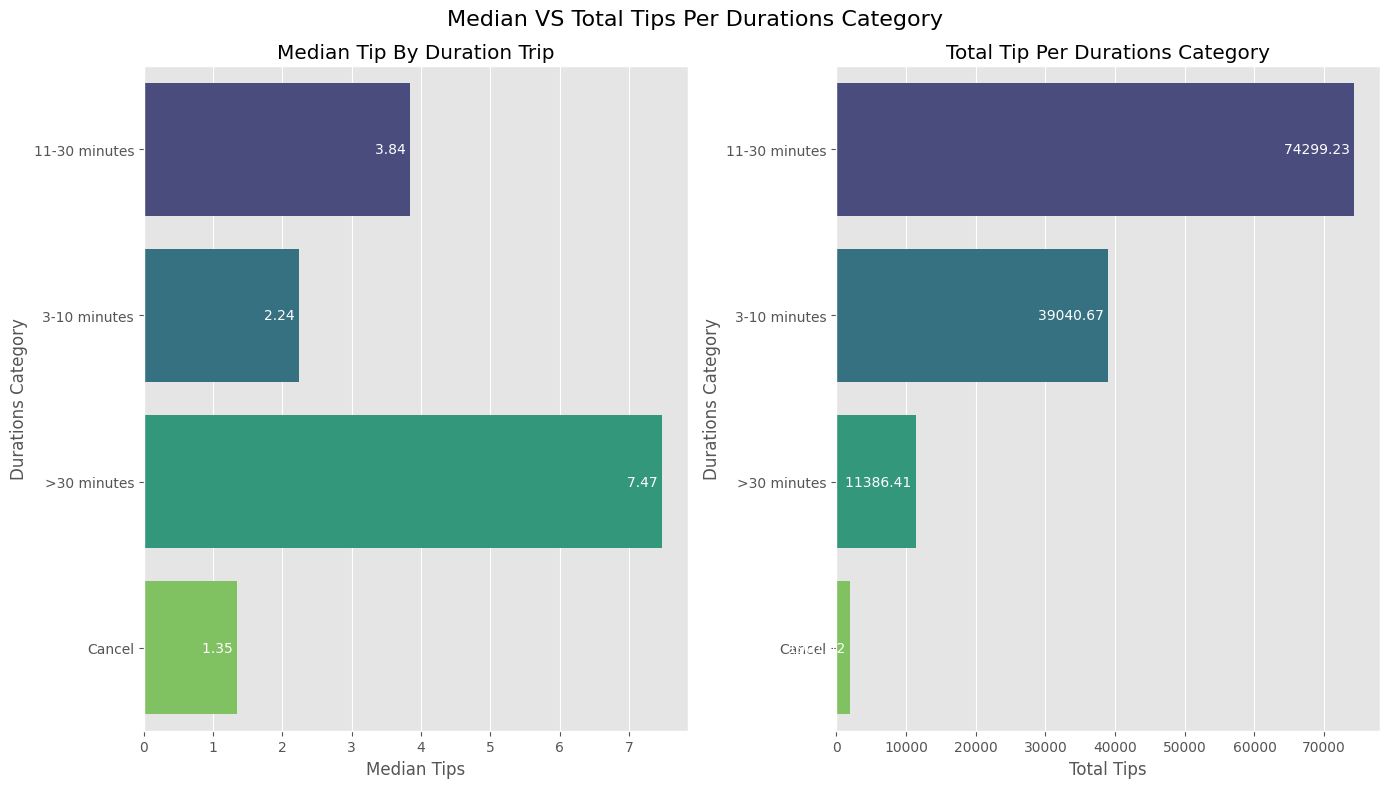

In [256]:
cc = df[df['payment_type'] == 'Credit Card']

#membuat groupby 
median_tip_duration = cc.groupby('duration_group')[['tip_amount']].median().reset_index()
sum_tip_duration = cc.groupby('duration_group')[['tip_amount']].sum().reset_index()

#visualisasi
plot_two_bar(
    data1=median_tip_duration,
    y1=median_tip_duration['duration_group'],
    x1=median_tip_duration['tip_amount'],
    title1='Median Tip By Duration Trip',
    xlabel1='Median Tips',
    ylabel='Durations Category',
    data2=sum_tip_duration,
    y2=sum_tip_duration['duration_group'],
    x2=sum_tip_duration['tip_amount'],
    title2='Total Tip Per Durations Category',
    xlabel2='Total Tips',
    suptitle='Median VS Total Tips Per Durations Category'
)

Berdasarkan Grafik Di atas :
- Urutan Total Tips Terbanyak ada pada kategori perjalanan dengan durasi  `11 - 30 menit`, `3 - 10 menit`, `>30 menit` 
- Tapi Rata Rata Tips Berdasarkan Median Tertinggi ada pada kategori `> 30 menit` dan terendah ada pada kaetgori `3 - 10 menit`
- Informasi yang di peroleh dari median tips berdasarkan durasi perjalanan adalah bahwa tips terbesar yang di berikan ada pada kategori `> 30 menit`. Hal ini menggambarkan bahwa semakin lama durasi perjalanan maka semakin besar tips yang di berikan oleh penumpang.   

#### **3. Tips By Congestion Trip**

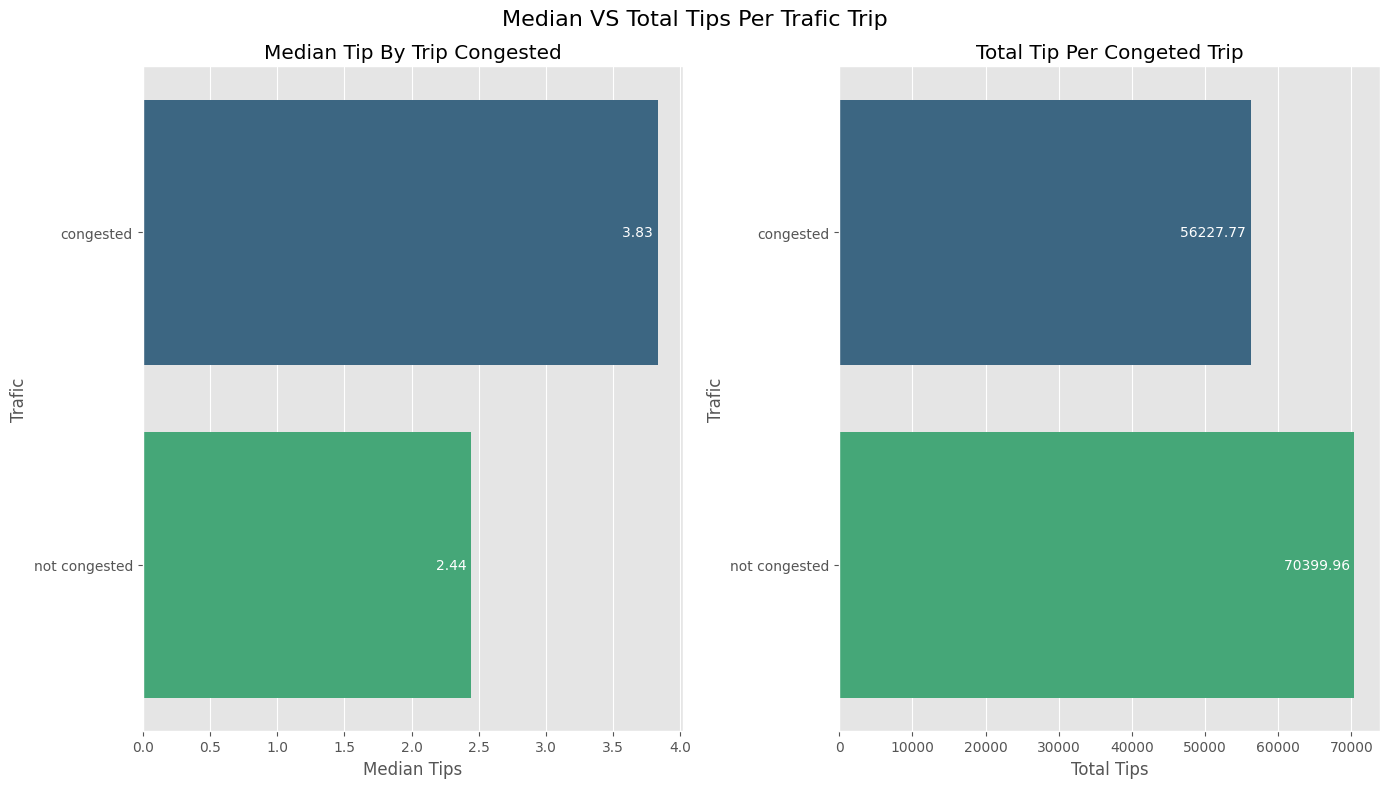

In [203]:
cc = df[df['payment_type'] == 'Credit Card']

median_tip_congested = cc.groupby('trafic_jam')[['tip_amount']].median().reset_index()
sum_tip_congested = cc.groupby('trafic_jam')[['tip_amount']].sum().reset_index()

#visualisasi
plot_two_bar(
    data1=median_tip_congested,
    y1=median_tip_congested['trafic_jam'],
    x1=median_tip_congested['tip_amount'],
    title1='Median Tip By Trip Congested',
    xlabel1='Median Tips',
    ylabel='Trafic',
    data2=sum_tip_congested,
    y2=sum_tip_congested['trafic_jam'],
    x2=sum_tip_congested['tip_amount'],
    title2='Total Tip Per Congeted Trip',
    xlabel2='Total Tips',
    suptitle='Median VS Total Tips Per Trafic Trip'
)

In [240]:
from scipy.stats import kruskal, mannwhitneyu

#mengambil masing2 transportation


stat,pvalue = mannwhitneyu(
    cc[cc['trafic_jam']=='congested']['tip_amount'],
    cc[cc['trafic_jam']=='not congested']['tip_amount'],
    alternative='greater'
)

alpha = 0.05
if pvalue > alpha:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > {alpha}. Gagal Menolak H0(Fail To Reject)
    Kita TIDAK Punya Cukup Bukti Median Tips Saat Macet LEBIH BESAR daripada tidak macet
''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= {alpha}. Menolak H0(Reject H0).
    Kita Punya Cukup Bukti Median Tips Saat Macet LEBIH BESAR daripada tidak macet
''')


    pvalue = 0.00000. pvalue <= 0.05. Menolak H0(Reject H0).
    Kita Punya Cukup Bukti Median Tips Saat Macet LEBIH BESAR daripada tidak macet



kita melakukan uji signifikasi untuk mendapatkan insight lebih dalam.
Grafik di atas menunjukan bahwa : 
- Rata rata pemberian tips berdasarkan median saat perjalanan terkena macet lebih besar daripada kondisi lalu lintas tidak macet.
- Rata Rata pemberia tips berdasarkan median pada saat macet adalah 3.9$ 
- perbedaan median tips berdsarkan kondisi lalu lintas adalah 1.5$ 

#### **4. Tips By Borough Dropoff Location**

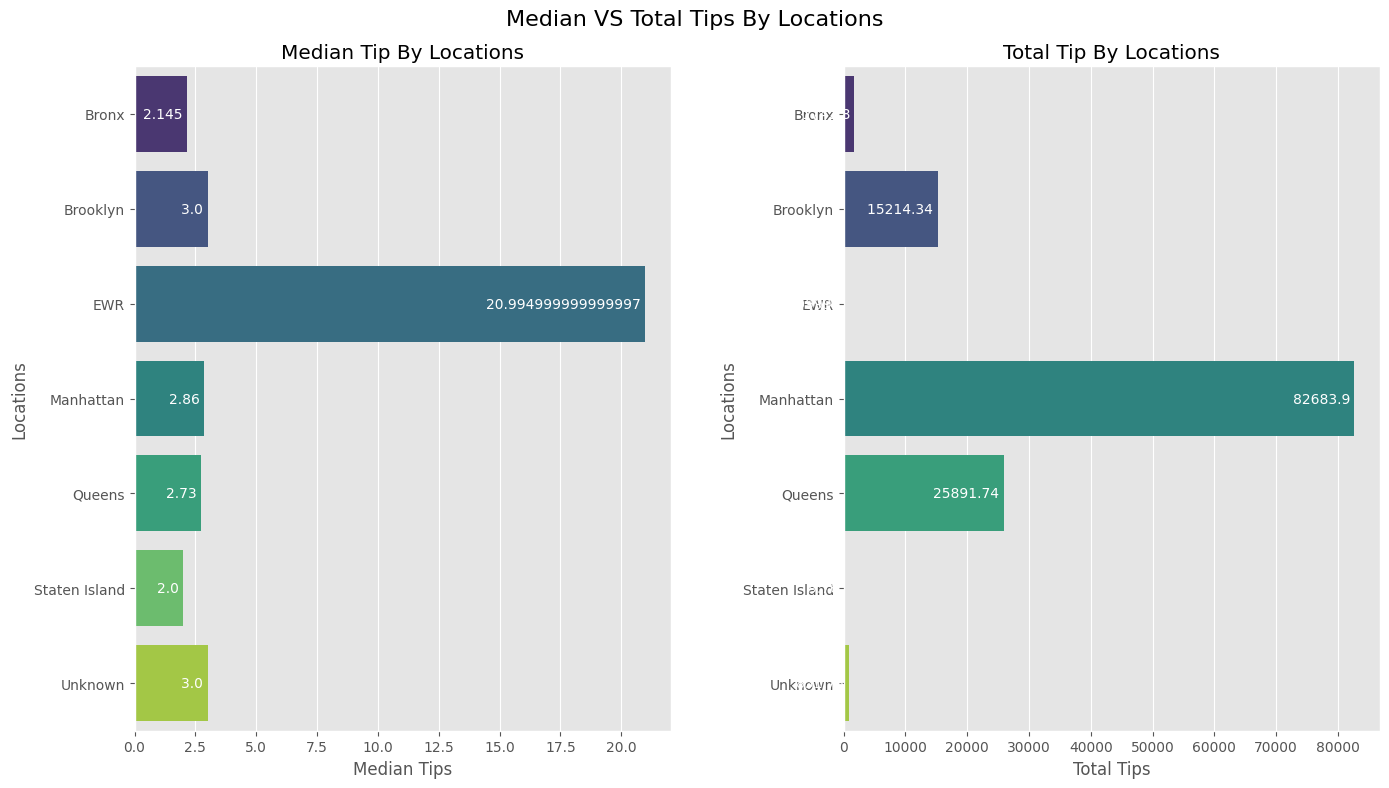

In [205]:
cc = df[df['payment_type'] == 'Credit Card']

median_tip_location = cc.groupby('DOBorough')[['tip_amount']].median().reset_index()
sum_tip_location = cc.groupby('DOBorough')[['tip_amount']].sum().reset_index()

#Visualisasi
plot_two_bar(
    data1=median_tip_location,
    y1=median_tip_location['DOBorough'],
    x1=median_tip_location['tip_amount'],
    title1='Median Tip By Locations',
    xlabel1='Median Tips',
    ylabel='Locations',
    data2=sum_tip_location,
    y2=sum_tip_location['DOBorough'],
    x2=sum_tip_location['tip_amount'],
    title2='Total Tip By Locations',
    xlabel2='Total Tips',
    suptitle='Median VS Total Tips By Locations'
)

Grafik di atas menunjukan bahwa : 
- Total Perolehan Tips tertinggi ada di Brorogh `Manhattan`. 
- Rata Rata Pemberian Tips Terbesar berdsarkan median ada pada Borough `EWR` / `Newark Airport` dengan jumlah 21$. walaupun total tips yang di peroleh cenderung rendah.  
- `Brooklyn` memiiki rata rata perolehan tips sebesar 3$. 
- `Manhattan` Dan `Quens` memiliki rerata perolehan tips di atas 2.5$. 
- `Bronx` Dan `Staten Island` memiliki rerata perolehan tips di bawah 2.5$ 

Sekararang kita akan melihat median pemberian Tips berdasarkan DOZone pada Borough `Manhattan`, `Queens`, `Brooklyn` dan `Bronx`

**Top 5 Highest Tips in Manhattan dropoff zone**

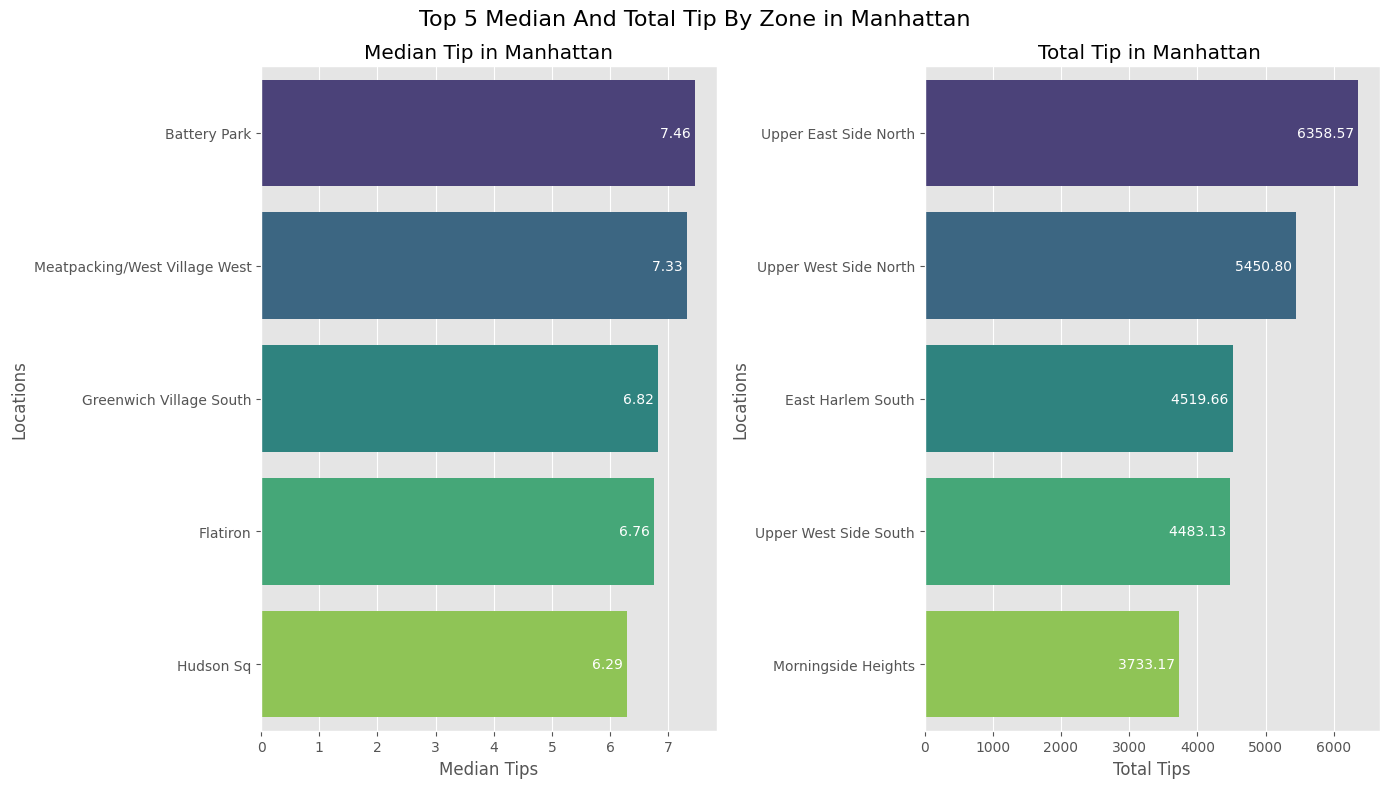

In [257]:
dozone_manhatan_tips_median = cc[cc['DOBorough'] == 'Manhattan'].groupby('DOZone')[['tip_amount']].median().reset_index().sort_values(
    by='tip_amount',ascending=False)[:5]

dozone_manhatan_tips_sum = cc[cc['DOBorough'] == 'Manhattan'].groupby('DOZone')[['tip_amount']].sum().reset_index().sort_values(
    by='tip_amount',ascending=False)[:5]

#visualisasi 

plot_two_bar(
    data1=dozone_manhatan_tips_median,
    y1=dozone_manhatan_tips_median['DOZone'],
    x1=dozone_manhatan_tips_median['tip_amount'],
    title1='Median Tip in Manhattan',
    xlabel1='Median Tips',
    ylabel='Locations',
    data2=dozone_manhatan_tips_sum,
    y2=dozone_manhatan_tips_sum['DOZone'],
    x2=dozone_manhatan_tips_sum['tip_amount'],
    title2='Total Tip in Manhattan ',
    xlabel2='Total Tips',
    suptitle='Top 5 Median And Total Tip By Zone in Manhattan'
)

5 Zone dengan Total perolehan tips tertinggi di Manhattan adalah : 

`Upper East Side North`, `Upper West Side North`, `East Harlem South`, `Upper West Side South` dan `Morningside Heights` . walaupun pada lokasi dropoff di East Harlem South menjadi Tujuan Favorit berdasarkan Total Trip akan tetapi untuk daerah dengan Total Tips Tertinggi adalah `Upper East Side North`. 

5 Zone dengan rerata berdasarkan median perolehan tips tertinggi di manhattan adalah : 

`Battery Park`, `Meatpacking`, `Greenwich Village South`, `Flatiron` dan `Hudson Sq`

**Top 5 Highest Tips in Queens dropoff zone**

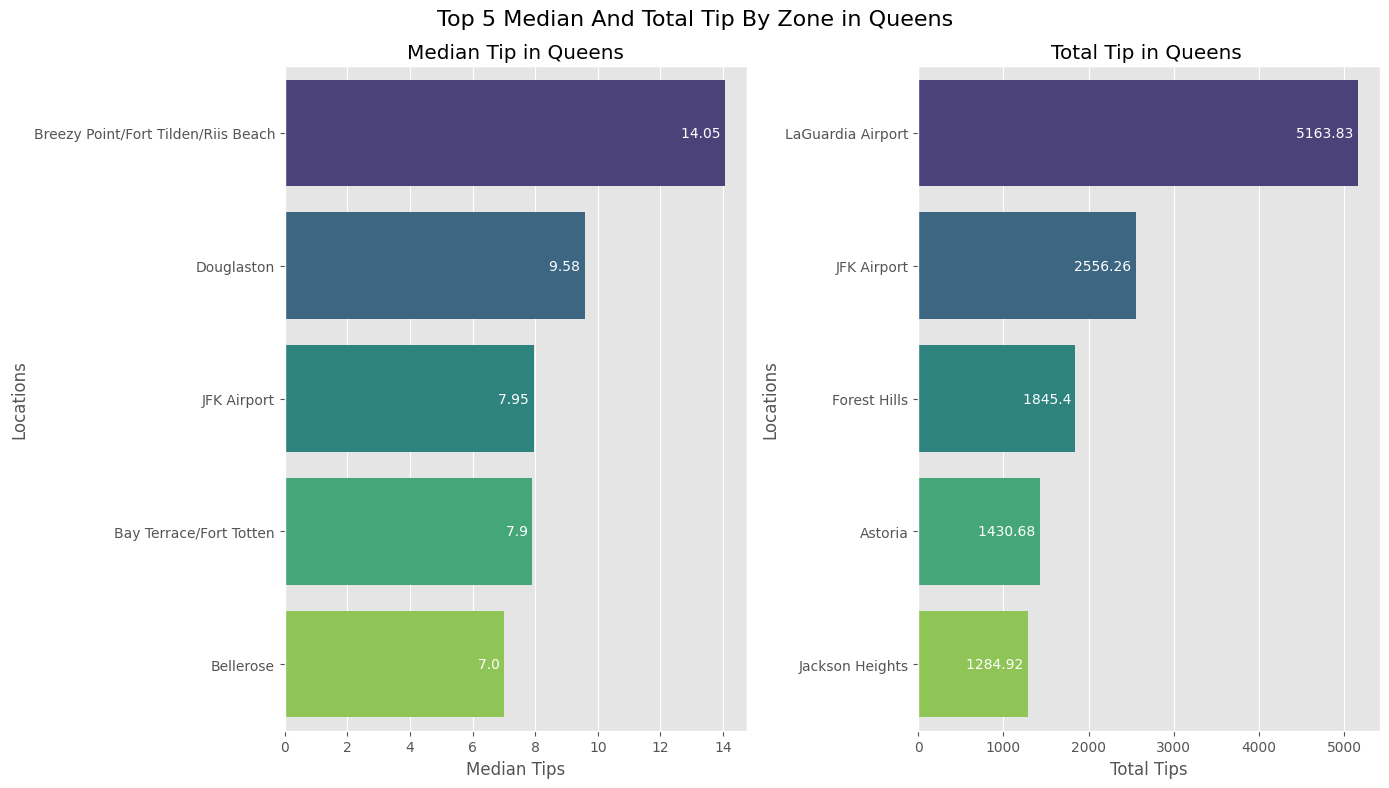

In [248]:
dozone_queens_tips_median = cc[cc['DOBorough'] == 'Queens'].groupby('DOZone')[['tip_amount']].median().reset_index().sort_values(
    by='tip_amount',ascending=False)[:5]

dozone_queens_tips_sum = cc[cc['DOBorough'] == 'Queens'].groupby('DOZone')[['tip_amount']].sum().reset_index().sort_values(
    by='tip_amount',ascending=False)[:5]

#visualisasi 

plot_two_bar(
    data1=dozone_queens_tips_median,
    y1=dozone_queens_tips_median['DOZone'],
    x1=dozone_queens_tips_median['tip_amount'],
    title1='Median Tip in Queens',
    xlabel1='Median Tips',
    ylabel='Locations',
    data2=dozone_queens_tips_sum,
    y2=dozone_queens_tips_sum['DOZone'],
    x2=dozone_queens_tips_sum['tip_amount'],
    title2='Total Tip in Queens ',
    xlabel2='Total Tips',
    suptitle='Top 5 Median And Total Tip By Zone in Queens'
)

5 Zone dengan Total perolehan tips tertinggi di Queens adalah : 

`LaGuardia Airport`, `JFK Airport`, `Forest Hills`, `Astoria` dan `Jakson Heights`. 

5 Zone dengan rerata berdasarkan median perolehan tips tertinggi di Queens adalah : 

`Brezy Point`, `Douglaston`, `JFK Airport`, `Fort Totten` dan `Bellrose`

Kta mendapatkan informasi bahwa Bandara menjadi tempat yang memiliki perolehan Tips Teringgi Di Queens. Akan tetapi untuk rerata perolehan tips tertinggi berdasarkan median bukan Airport, tapi `Brezy Point`. walaupun `Brezy Point` tidak termasuk daerah dengan total perolehan tertinggi tapi median prolehan tips tertinggi. hal ini terjadi mungkin `Brezy Point` merupakan kawasan elit dengan harga prpoperti relatif tinggi.  

**Top 5 Highest Tips in Brooklyn dropoff zone**

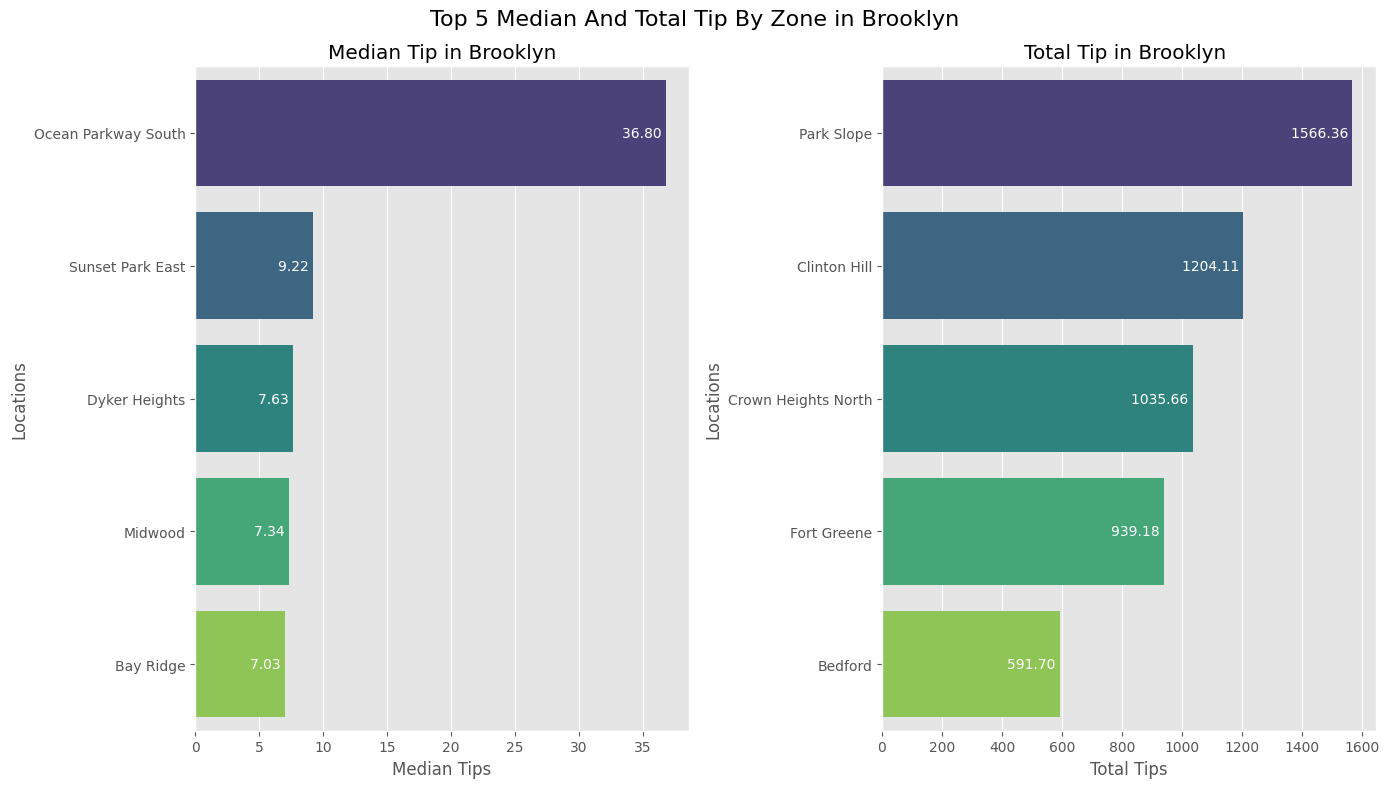

In [258]:
dozone_brooklyn_tips_median = cc[cc['DOBorough'] == 'Brooklyn'].groupby('DOZone')[['tip_amount']].median().reset_index().sort_values(
    by='tip_amount',ascending=False)[:5]

dozone_brooklyn_tips_sum = cc[cc['DOBorough'] == 'Brooklyn'].groupby('DOZone')[['tip_amount']].sum().reset_index().sort_values(
    by='tip_amount',ascending=False)[:5]

#visualisasi 

plot_two_bar(
    data1=dozone_brooklyn_tips_median,
    y1=dozone_brooklyn_tips_median['DOZone'],
    x1=dozone_brooklyn_tips_median['tip_amount'],
    title1='Median Tip in Brooklyn',
    xlabel1='Median Tips',
    ylabel='Locations',
    data2=dozone_brooklyn_tips_sum,
    y2=dozone_brooklyn_tips_sum['DOZone'],
    x2=dozone_brooklyn_tips_sum['tip_amount'],
    title2='Total Tip in Brooklyn ',
    xlabel2='Total Tips',
    suptitle='Top 5 Median And Total Tip By Zone in Brooklyn'
)

5 Zone dengan Total perolehan tips tertinggi di Brooklyn adalah : 

`Park Slope`, `Clinton Hill`, `Crown Heights North`, `Fort Greene` dan `Bedford`. 

5 Zone dengan rerata berdasarkan median perolehan tips tertinggi di Brooklyn adalah : 

`Ocean Parkway South`, `Sunset Park East`, `Dyker Heights`, `Midwood` dan `Bay Ridge`. untuk Zone `Ocean Parkway South` memang tidak termasuk zone dengan perolehan tips tertinggi akan tetapi rerata berdasarkan median pemberian tips sangat tinggi di angka 36.80$ kita akan melakukan pengecekan lebih dalam terkait perolehan tips tertinggi. 

In [268]:
df[(df['DOBorough'] == 'Brooklyn') & (df['DOZone']=='Ocean Parkway South') & (df['tip_amount'] > 30)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_pickup,trip_duration,dayname_pickup,dayname_dropoff,hour_pickup,hour_dropoff,trafic_jam,PUBorough,PUZone,DOBorough,DOZone,duration_group,distance_group
2613,2,2023-01-03 01:19:09,2023-01-03 01:20:46,N,1.0,178,178,1.0,0.27,4.4,1.0,0.5,36.8,0.0,0.3,43.0,Credit Card,Street-Hail,0.0,3,1.0,Tue,Tue,1,1,not congested,Brooklyn,Ocean Parkway South,Brooklyn,Ocean Parkway South,Cancel,Cancel


ternyata ada 1 penumpang yang memberikan tips tinggi yaitu 36.80 $ dengan kategori duration dan distance group Cancel. hal ini yang menyebabkan median pada tips berdasarkan duration_group dan distance group cukup besar. 

**Top 5 Highest Tips in Bronx dropoff zone**

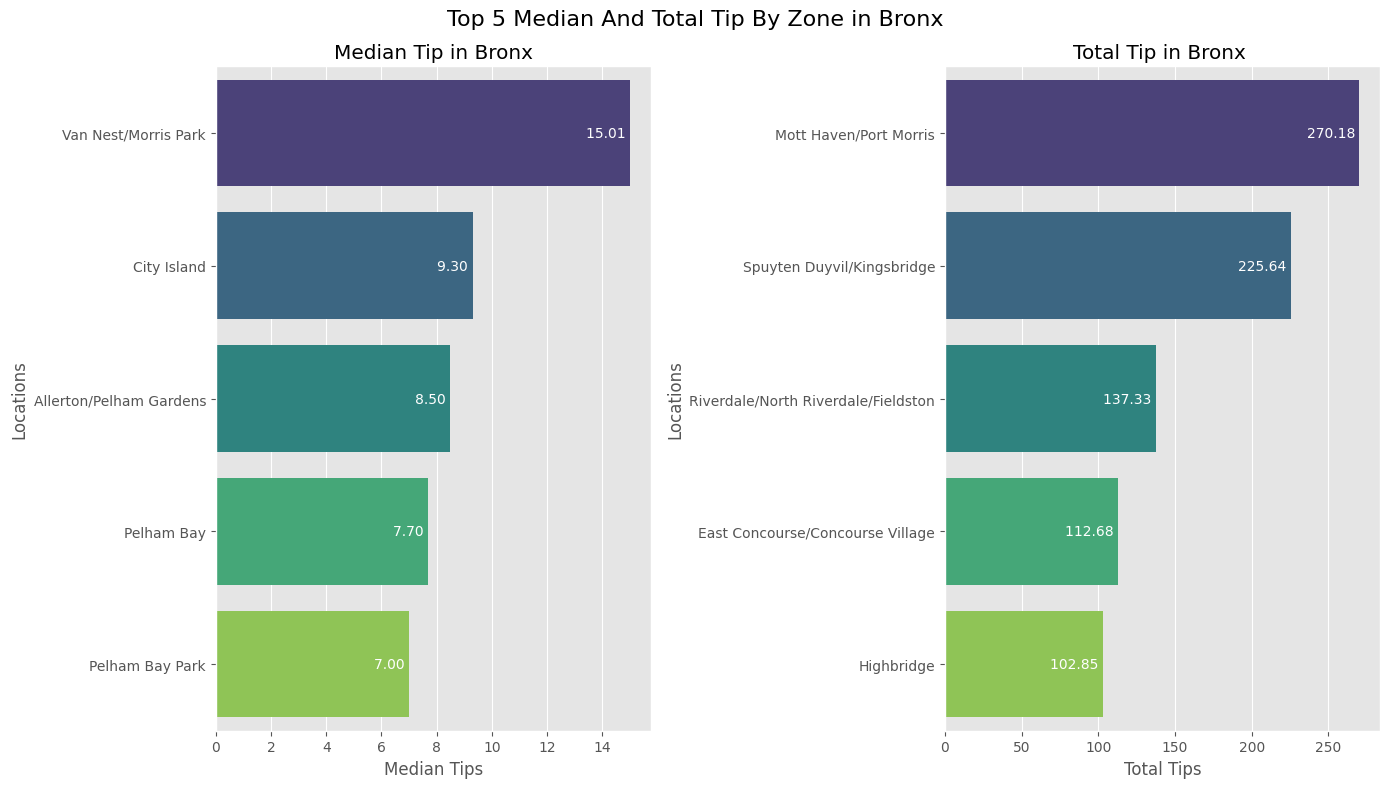

In [269]:
dozone_bronx_tips_median = cc[cc['DOBorough'] == 'Bronx'].groupby('DOZone')[['tip_amount']].median().reset_index().sort_values(
    by='tip_amount',ascending=False)[:5]

dozone_bronx_tips_sum = cc[cc['DOBorough'] == 'Bronx'].groupby('DOZone')[['tip_amount']].sum().reset_index().sort_values(
    by='tip_amount',ascending=False)[:5]

#visualisasi 

plot_two_bar(
    data1=dozone_bronx_tips_median,
    y1=dozone_bronx_tips_median['DOZone'],
    x1=dozone_bronx_tips_median['tip_amount'],
    title1='Median Tip in Bronx',
    xlabel1='Median Tips',
    ylabel='Locations',
    data2=dozone_bronx_tips_sum,
    y2=dozone_bronx_tips_sum['DOZone'],
    x2=dozone_bronx_tips_sum['tip_amount'],
    title2='Total Tip in Bronx ',
    xlabel2='Total Tips',
    suptitle='Top 5 Median And Total Tip By Zone in Bronx'
)

5 Zone dengan Total perolehan tips tertinggi di Bronx adalah : 

`Mott Haven`, `Kingsibridge`, `Fieldstone`, `East Concourse` dan `Highbridge`. 

5 Zone dengan rerata berdasarkan median perolehan tips tertinggi di Bronx adalah : 

`Morris Park`, `City ISland`, `Allerton`, `Pelham Bay`, `Pelham Bay Park`


#### **5. Tips By Day**

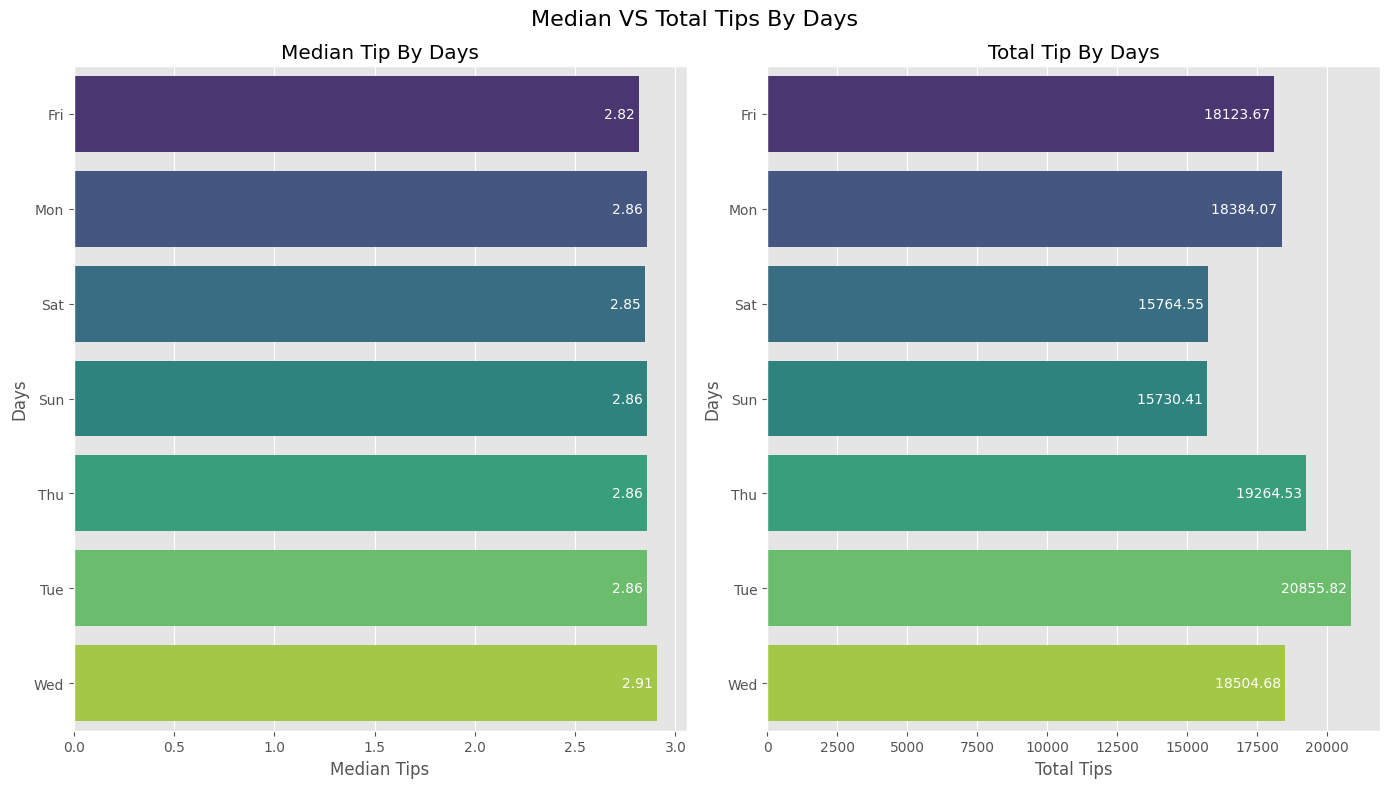

In [209]:
median_tip_day = cc.groupby('dayname_pickup')[['tip_amount']].median().reset_index()
sum_tip_day = cc.groupby('dayname_pickup')[['tip_amount']].sum().reset_index()

#visualisasi
plot_two_bar(
    data1=median_tip_day,
    y1=median_tip_day['dayname_pickup'],
    x1=median_tip_day['tip_amount'],
    title1='Median Tip By Days',
    xlabel1='Median Tips',
    ylabel='Days',
    data2=sum_tip_day,
    y2=sum_tip_day['dayname_pickup'],
    x2=sum_tip_day['tip_amount'],
    title2='Total Tip By Days',
    xlabel2='Total Tips',
    suptitle='Median VS Total Tips By Days'
)

Grafik Di atas menunjukan bahwa hanya terdapat sedikit perbedaan antara rata-rata pemberian tip berdasakan weekday dan weekend. tapi untuk meyakinkan kita akan melakukan uji statistik.

Kita akan melakukan **`Uji Signifikasi`** untuk Tips By Days. 

**H0** : Median tip_amount untuk setiap hari Adalah Sama 

**H1** : Terdapat minimal 1 hari yang berbeda tapi kita tidak tahu yang mana. 

In [210]:
from scipy.stats import kruskal

#mengambil masing2 transportation


stat,pvalue = kruskal(
    cc[cc['dayname_pickup']=='Sun']['tip_amount'],
    cc[cc['dayname_pickup']=='Mon']['tip_amount'],
    cc[cc['dayname_pickup']=='Tue']['tip_amount'],
    cc[cc['dayname_pickup']=='Wed']['tip_amount'],
    cc[cc['dayname_pickup']=='Thu']['tip_amount'],
    cc[cc['dayname_pickup']=='Fri']['tip_amount'],
    cc[cc['dayname_pickup']=='Sat']['tip_amount'],
)

alpha = 0.05
if pvalue > alpha:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > {alpha}. Gagal Menolak H0(Fail To Reject)
    Kita TIDAK Punya Cukup Bukti minimal ada 1 hari yang berbeda tapi kita tidak tahu yang mana
''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= {alpha}. Menolak H0(Reject H0).
    Kita Punya Cukup Bukti minimal ada 1 hari yang berbeda tapi kita tidak tahu yang mana
''')


    pvalue = 0.60110. pvalue > 0.05. Gagal Menolak H0(Fail To Reject)
    Kita TIDAK Punya Cukup Bukti minimal ada 1 hari yang berbeda tapi kita tidak tahu yang mana



karena nilai pvalue lebih dari `0.5` yaitu 0.60110 maka hasilnya adalah `Gagal Menolak H0` berarrti tidak ada perbedaan yang tertalu signifikan pada pemberian tips saat weekday ataupun saat weekend. perjalanan pada weekend tidak mempengaruhi median pemberian tips. 

### **Conclussion**

**Bagaimana Pola Perilaku Konsumen dalam menggunakan layanan NYC TAXI sehingga NYC Taxi dapat merancang strategi untuk meningkatkan pelayanan**


**1. Bagaimana Pola Perjalanan Konsumen Taxi Berdasarkan Waktu?**
- Penggunaan layanan Taxi Lebih Ramai Saat Weeekday di bandingkan Weekend. 
- Total Perjalanan Pada bulan Januari 2023 cukup fluktuatif. 
- Jam Padat penumpang terjadi saat jam 2 siang sampai 6 sore sementara Jam sepi terjadi saat jam 23 malam sampai 5 pagi.
- Pada Pagi Hari Jam berangkat Kerja terjadi Total penggunaan layanan taxi cukup banyak di mulai dari jam 7 pagi kemudian meningkat dari jam 3 sore sampai 7 malam. setelahnya kembali menurun sampai dini hari. 
- Penggunaan layanan taxi saat macet selama bulan Januari 2023 adalah 25% dari seluruh total perjalanan.
- Lebih Banyak Perjalanan Taxi saat malam hari dari jam 11 malam sampai 5 pagi pada weekend di bandingkan weekday.     

**2. Bagaimana Pola Perjalanan Konsumen Taxi Berdasarkan Lokasi penjemputan dan Lokasi Tujuan?**
- Lokasi pickup dan dropoff Favorit adalah Borough Manhattan dengan persentasi 60%. Hal ini menunjukan bahwa lebih dari 50% perjalanan Taxi pada bulan Januari ada di Borough Manhattan. 
- Perjalanan Taxi di Manhattan lebih ramai saat weekday di bandingkan weekend.
- Tidak ada perjalanan taxi dari dari Newark Airport selama Bulan Januari 2023. 
- Lebih Banyak perjalanan Menuju Bandara LaGuardia di bandingkan perjalanan dari Bandara Laguardia.


**3. Bagaimana Preferensi Dan Behavior Penumpang dalam menggunakan Layanan Taxi?**
- Credit Card Menjadi Tipe Pembayaran Favorit dengan persentasi 60% di bulan januari 2023. 
- Tipe Pembayaran Favorit Per Borough : 
    - Manhattan : Credit Card 67%
    - Queens : Cash 49%
    - Brooklyn : Credit Card 60%
    - Bronx : Cash 53%

- Total Perjalanan tertinggi berdasarkan jarak perjalanan ada di kategori `0.5 - 3 miles` dengan persentasi `68%`
- Total Perjalanan tertinggi berdasarkan durasi perjalanan ada di kategori `11 - 30 menit` dengan persentasi `47%`
- Cancelation Trip Rate berdasarkan duration dan distance ada pada rentang `3.2% - 3.5%`
- Berdasarkan Jarak Kebanyakan konsumen menggunakan taxi dengan rentang jarak `0.5 - 3 miles`
- Berdasarkan Durasi Kebanyakan konsumen menggunakan taxi dengan rentang durasi `11- 30 menit`


**4. Apakah Benar Konsumen yang melakukan Perjalanan dengan jarak dan durasi yang lama memberikan tips yang lebih besar?**
- Berdasarkan Rerata Median Tips semakin lama Durasi perjalanan dan semakin jauh jarak perjalanan maka rerata median tips semakin tinggi
- Rerata Median Tips yang di peroleh saat Macet Lebih besar di bandingkan saat kondisi lalu lintas normal.    

### **Recomendation**

Untuk Meningkatkan Pelayanan NYX Taxi. Ada beberapa hal yang perlu di rekomendasikan yaitiu : 

1. Mengalokasikan Armada Taxi / Driver Lebih Banyak Pada Jam Sibuk. Sehingga dapat mengurangi waktu tunggu konsumen
2. Mengalokasikan Armada Taxi di area-area penjemputan favorit dan mengatur lebih banyak taxi di area-area yang sering di kunjungi. sehingga bisa meningkatkan ketersedian taxi. 
3. Meningkatkan Diversifikasi Layanan Taxi dengan dengan menempatkan armada pada area-area yang kurang diminati. hal ini dapat membantu NYC untuk menjangkau Pasar yang lebih luas. 
4. Memberikan Promo atau Insentif berdasarkan cara pembayaran Pada masing-masing Borough. seperti memberikan poin kepada pelanggan yang menggunakan Credit Card. kemudian Poin tersebut bisa di gunakan sebagai pengurangan biaya atau di tukar dengan hadiah. Memberikan diskon untuk konsumen yang membayar dengan uang tunai khusus pada periode dan tempat yang lebih banyak pembayaran secara tunai, yaitu Queens dan Bronx. Hal ini dapat membangun loyalitas konsumen dalam menggunakan Layanan Taxi. 
5. NYC Taxi dapat menerapkan promosi dan insentif khusus yang mendorong pelanggan untuk memberikan tips lebih besar saat mereka mengalami perjalanan dengan jarak dan durasi yang lebih lama, terutama saat kondisi lalu lintas sedang macet. Ini bisa berupa diskon khusus untuk pelanggan yang memberikan tips besar dalam situasi-situasi tersebut. 





In [211]:
# df.to_csv('clean_data.csv')

Link Tablue:
[Dashboard](https://public.tableau.com/app/profile/tengku.reza/viz/Capstone2_17138829538570/Dashboard5?publish=yes)